In [1]:
import pandas as pd
import numpy as np
from age_predictor.feature_extractor import *
from age_predictor.supervised import *
from age_predictor import ML_plot

# model training

In [2]:
data = Data()

In [3]:
training_data = 'train_data.xlsx'
label_col = 'age'
drop_col = ['cultivation region', 'data set']
data.load_data(training_data, label_col, drop_col)

Number of data set: 64
Number of features: 9


In [4]:
model = RegressionModel(data=data)

No test set detected in data! Whole data set will be used as a test set.


In [5]:
candidates = {
#     'LinearRegression':{},
    'ElasticNet':
        {
            'l1_ratio': np.arange(0, 1.05, 0.05),
            'alpha': np.logspace(-7, 3, 400),
        },
    'KNeighborsRegressor':
        {
            'n_neighbors': np.arange(2, 30, 2),
            'weights': ['uniform', 'distance'],
        },
    'SVR_rbf':
        {
            'kernel': ['rbf', 'sigmoid'],
            'C': np.logspace(-7, 3, 30),
            'gamma': np.logspace(-7, 3, 30),
            'epsilon': np.logspace(-7, 3, 30)
        },
    'MLPRegressor':
        {
            'hidden_layer_sizes': [(2, 2), (2, 4), (2, 6), (2, 8),
                                   (4, 2), (4, 4), (4, 6), (4, 8),
                                   (6, 2), (6, 4), (6, 6), (6, 8), ],
            'activation': ['tanh'],
            'learning_rate_init': [0.001, 0.01, 0.1],
            'alpha': np.logspace(-7, 2, 10),
            'early_stopping': [True],
            'max_iter': [1000],
        }
}

In [6]:
model.set_candidates(candidates)

In [7]:
tune_df = model.model_tuning(scoring=['neg_mean_squared_error', 'r2'])

Tuning:  ElasticNet
Using time: 25.80

Tuning:  KNeighborsRegressor
Using time: 0.34

Tuning:  SVR_rbf
Using time: 137.72

Tuning:  MLPRegressor
Using time: 135.89

================ model_tuning | Time: 0.0h 4.0min 60s ================



In [8]:
best_df = model.best_model_select(rank='neg_mean_squared_error')

rank_test_neg_mean_squared_error  rank_test_r2  \
4330                                  1             2   
8401                                  1             1   
50874                                 1             1   
62561                                 1             1   

       mean_test_neg_mean_squared_error  mean_test_r2  \
4330                          -0.041717      0.911943   
8401                          -0.022231      0.954084   
50874                         -0.018583      0.962741   
62561                         -0.017133      0.965435   

       std_test_neg_mean_squared_error  std_test_r2            algorithm  \
4330                          0.019439     0.042231           ElasticNet   
8401                          0.028465     0.058532  KNeighborsRegressor   
50874                         0.005925     0.012023              SVR_rbf   
62561                         0.005846     0.013119         MLPRegressor   

                                                  params  
4330    {'alpha': 0.014551483398731937, 'l1_ratio': 0.2}  
8401           {'n_neighbors': 2, 'weights': 'distance'}  
50874  {'C': 8.531678524172815, 'epsilon': 0.07278953...  
62561  {'activation': 'tanh', 'alpha': 0.0001, 'early...

============== best_model_select | Time: 0.0h 0.0min 0s ==============



In [9]:
evaluate = model.best_model_evaluate()

rank_test_neg_mean_squared_error  rank_test_r2  \
4330                                  1             2   
8401                                  1             1   
50874                                 1             1   
62561                                 1             1   

       mean_test_neg_mean_squared_error  mean_test_r2  \
4330                          -0.041717      0.911943   
8401                          -0.022231      0.954084   
50874                         -0.018583      0.962741   
62561                         -0.017133      0.965435   

       std_test_neg_mean_squared_error  std_test_r2            algorithm  \
4330                          0.019439     0.042231           ElasticNet   
8401                          0.028465     0.058532  KNeighborsRegressor   
50874                         0.005925     0.012023              SVR_rbf   
62561                         0.005846     0.013119         MLPRegressor   

                                                  params  \
4330    {'alpha': 0.014551483398731937, 'l1_ratio': 0.2}   
8401           {'n_neighbors': 2, 'weights': 'distance'}   
50874  {'C': 8.531678524172815, 'epsilon': 0.07278953...   
62561  {'activation': 'tanh', 'alpha': 0.0001, 'early...   

       all_mean_squared_error  
4330                 0.034986  
8401                 0.000000  
50874                0.012388  
62561                0.007492

============= best_model_evaluate | Time: 0.0h 0.0min 0s =============



In [10]:
model.save_model('panax_predictor', False)

In [11]:
model = load_object('./data/panax_predictor.pkl')

# predict for the samples in test set 1

In [12]:
test_1 = 'test set 1.xlsx'
data.load_data(test_1, label_col, drop_col, mode='predict')

Number of predicted data set: 25
Number of predicted features: 9


In [13]:
model.load_predict_data(data=data)

In [14]:
predict_df_res = model.best_model_predict(tag='test set 1')

rank_test_neg_mean_squared_error  rank_test_r2  \
4330                                  1             2   
8401                                  1             1   
50874                                 1             1   
62561                                 1             1   

       mean_test_neg_mean_squared_error  mean_test_r2  \
4330                          -0.041717      0.911943   
8401                          -0.022231      0.954084   
50874                         -0.018583      0.962741   
62561                         -0.017133      0.965435   

       std_test_neg_mean_squared_error  std_test_r2            algorithm  \
4330                          0.019439     0.042231           ElasticNet   
8401                          0.028465     0.058532  KNeighborsRegressor   
50874                         0.005925     0.012023              SVR_rbf   
62561                         0.005846     0.013119         MLPRegressor   

                                                  params  \
4330    {'alpha': 0.014551483398731937, 'l1_ratio': 0.2}   
8401           {'n_neighbors': 2, 'weights': 'distance'}   
50874  {'C': 8.531678524172815, 'epsilon': 0.07278953...   
62561  {'activation': 'tanh', 'alpha': 0.0001, 'early...   

       all_mean_squared_error  predict_mean_squared_error  
4330                 0.034986                    0.242903  
8401                 0.000000                    0.069637  
50874                0.012388                    0.069722  
62561                0.007492                    0.015783

============= best_model_predict | Time: 0.0h 0.0min 0s ==============



# predict for the samples in test set 2

In [15]:
test_2 = 'test set 2.xlsx'
data.load_data(test_2, label_col, drop_col, mode='predict')

Number of predicted data set: 17
Number of predicted features: 9


In [16]:
model.load_predict_data(data=data)

In [17]:
predict_df_res = model.best_model_predict(tag='test set 2')

rank_test_neg_mean_squared_error  rank_test_r2  \
4330                                  1             2   
8401                                  1             1   
50874                                 1             1   
62561                                 1             1   

       mean_test_neg_mean_squared_error  mean_test_r2  \
4330                          -0.041717      0.911943   
8401                          -0.022231      0.954084   
50874                         -0.018583      0.962741   
62561                         -0.017133      0.965435   

       std_test_neg_mean_squared_error  std_test_r2            algorithm  \
4330                          0.019439     0.042231           ElasticNet   
8401                          0.028465     0.058532  KNeighborsRegressor   
50874                         0.005925     0.012023              SVR_rbf   
62561                         0.005846     0.013119         MLPRegressor   

                                                  params  \
4330    {'alpha': 0.014551483398731937, 'l1_ratio': 0.2}   
8401           {'n_neighbors': 2, 'weights': 'distance'}   
50874  {'C': 8.531678524172815, 'epsilon': 0.07278953...   
62561  {'activation': 'tanh', 'alpha': 0.0001, 'early...   

       all_mean_squared_error  predict_mean_squared_error  \
4330                 0.034986                    0.242903   
8401                 0.000000                    0.069637   
50874                0.012388                    0.069722   
62561                0.007492                    0.015783   

       predict_mean_squared_error_1  
4330                       1.370666  
8401                       0.955654  
50874                      1.180219  
62561                      1.259706

============= best_model_predict | Time: 0.0h 0.0min 0s ==============



# plot the cv results

In [18]:
plot = ML_plot.MLPlot()
out = plot.cv_regression_from_model(model, force=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.9s finished


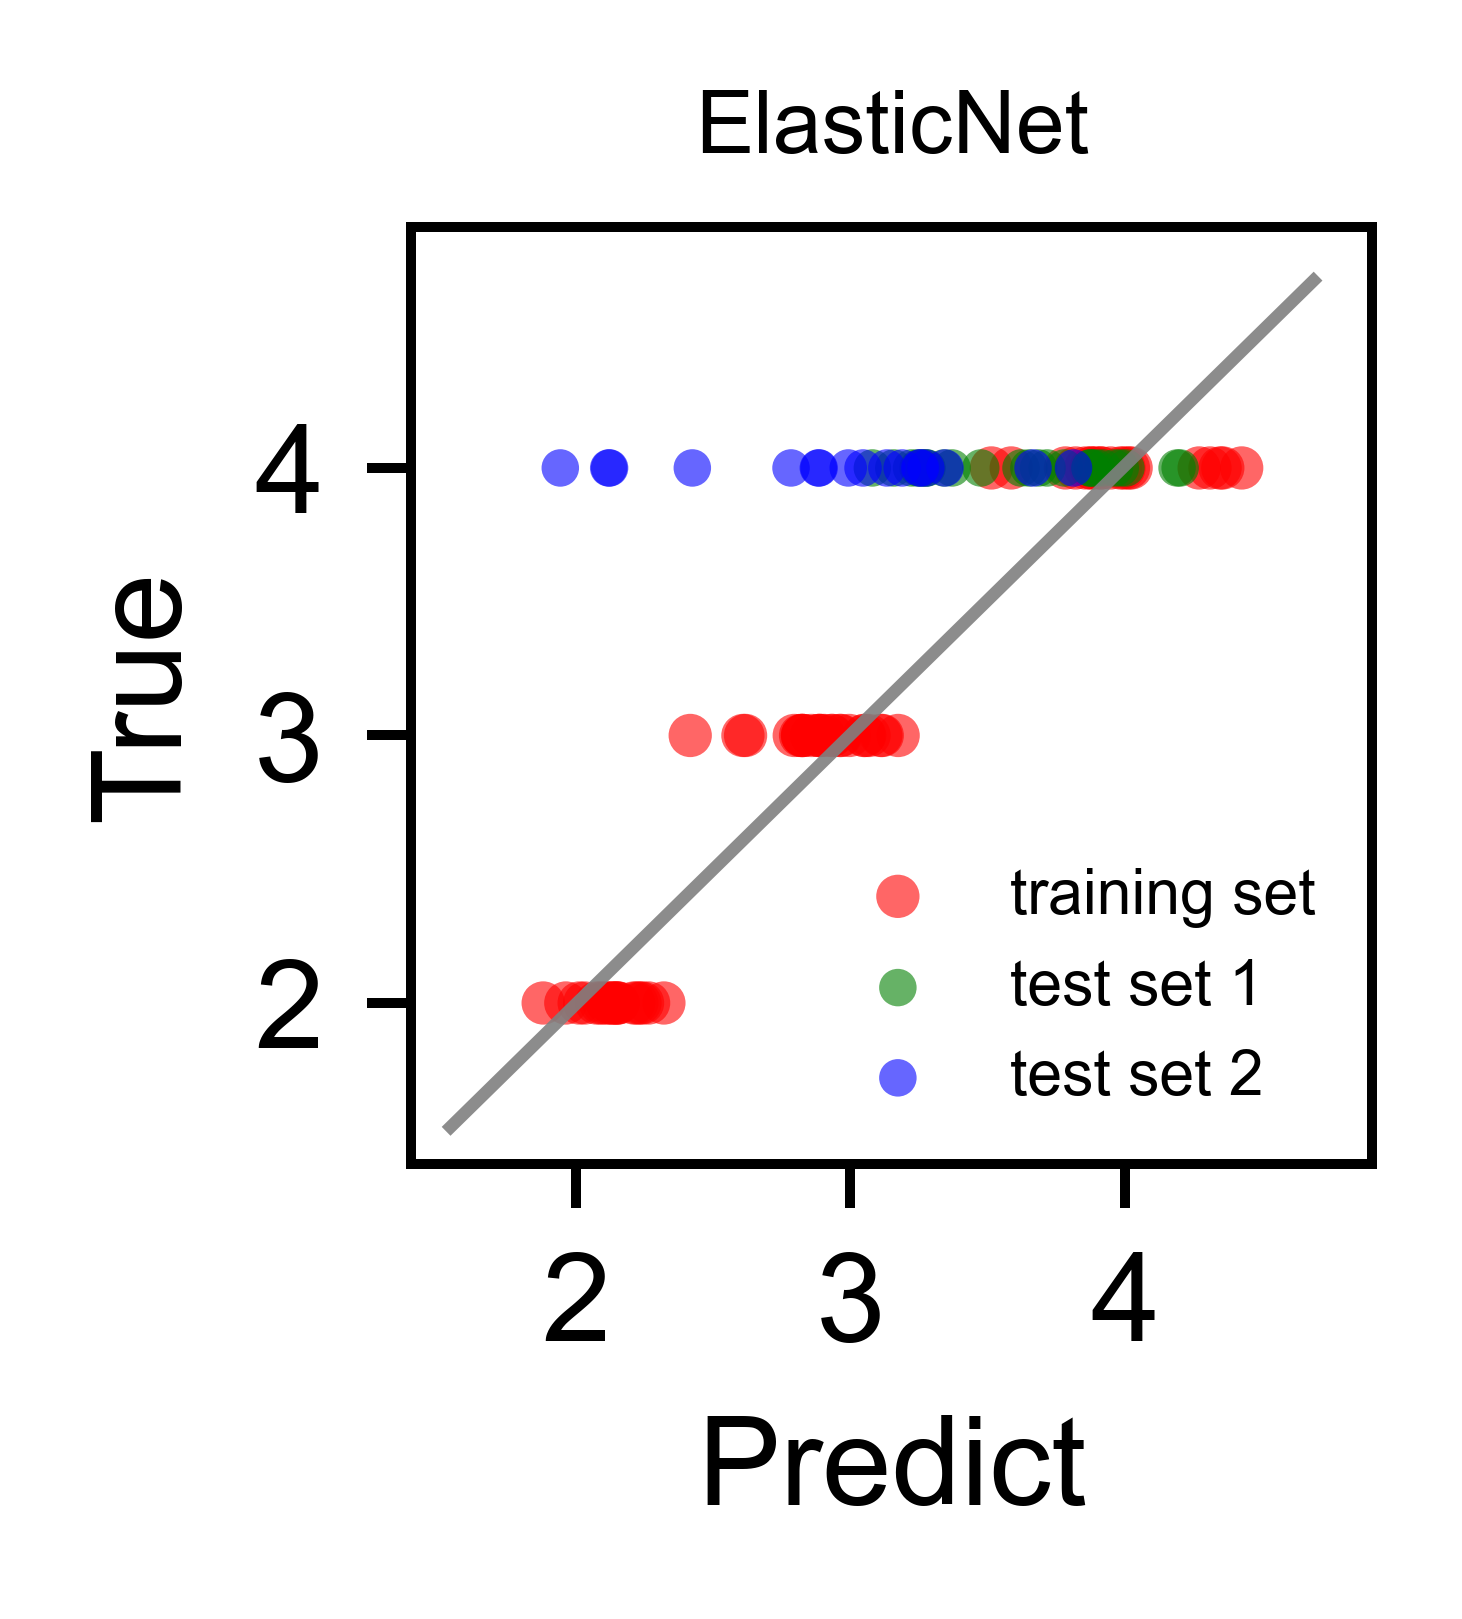

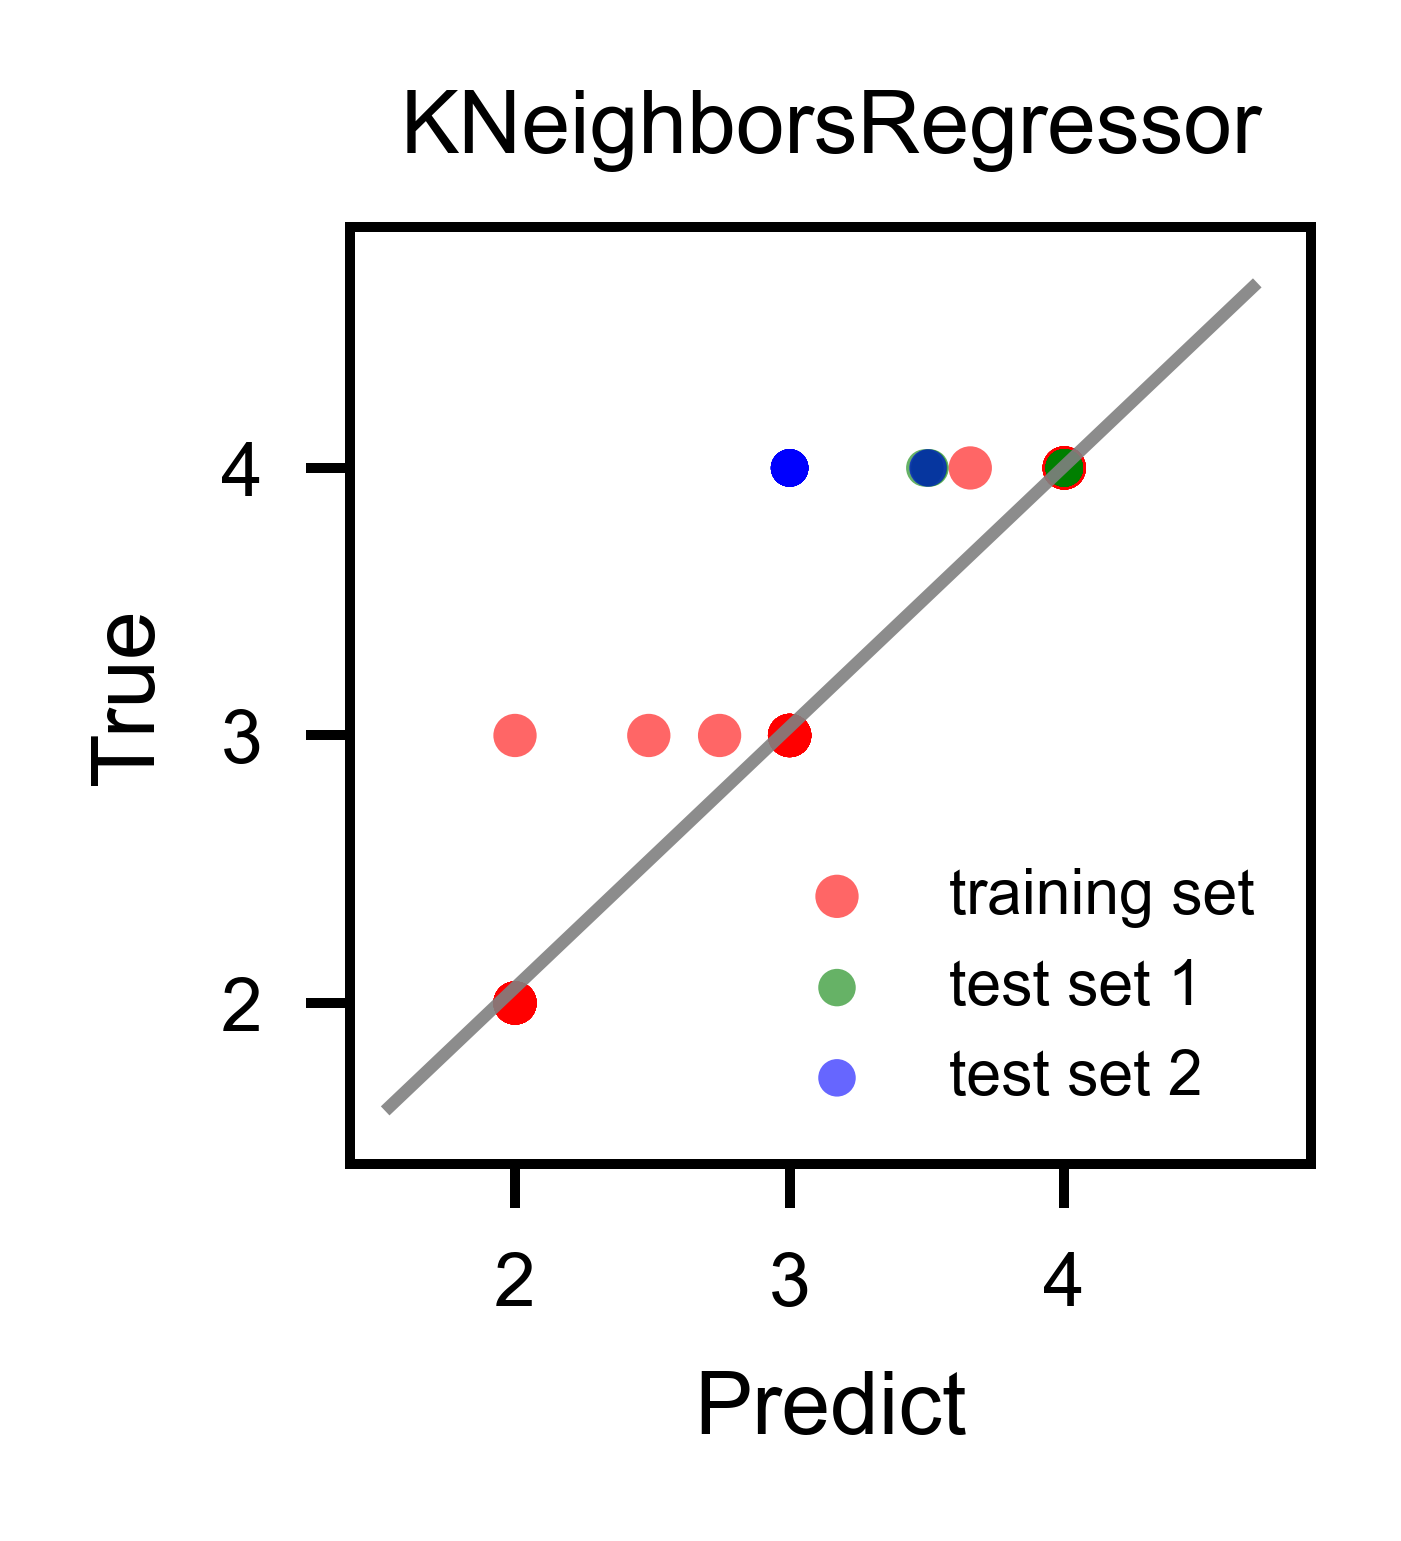

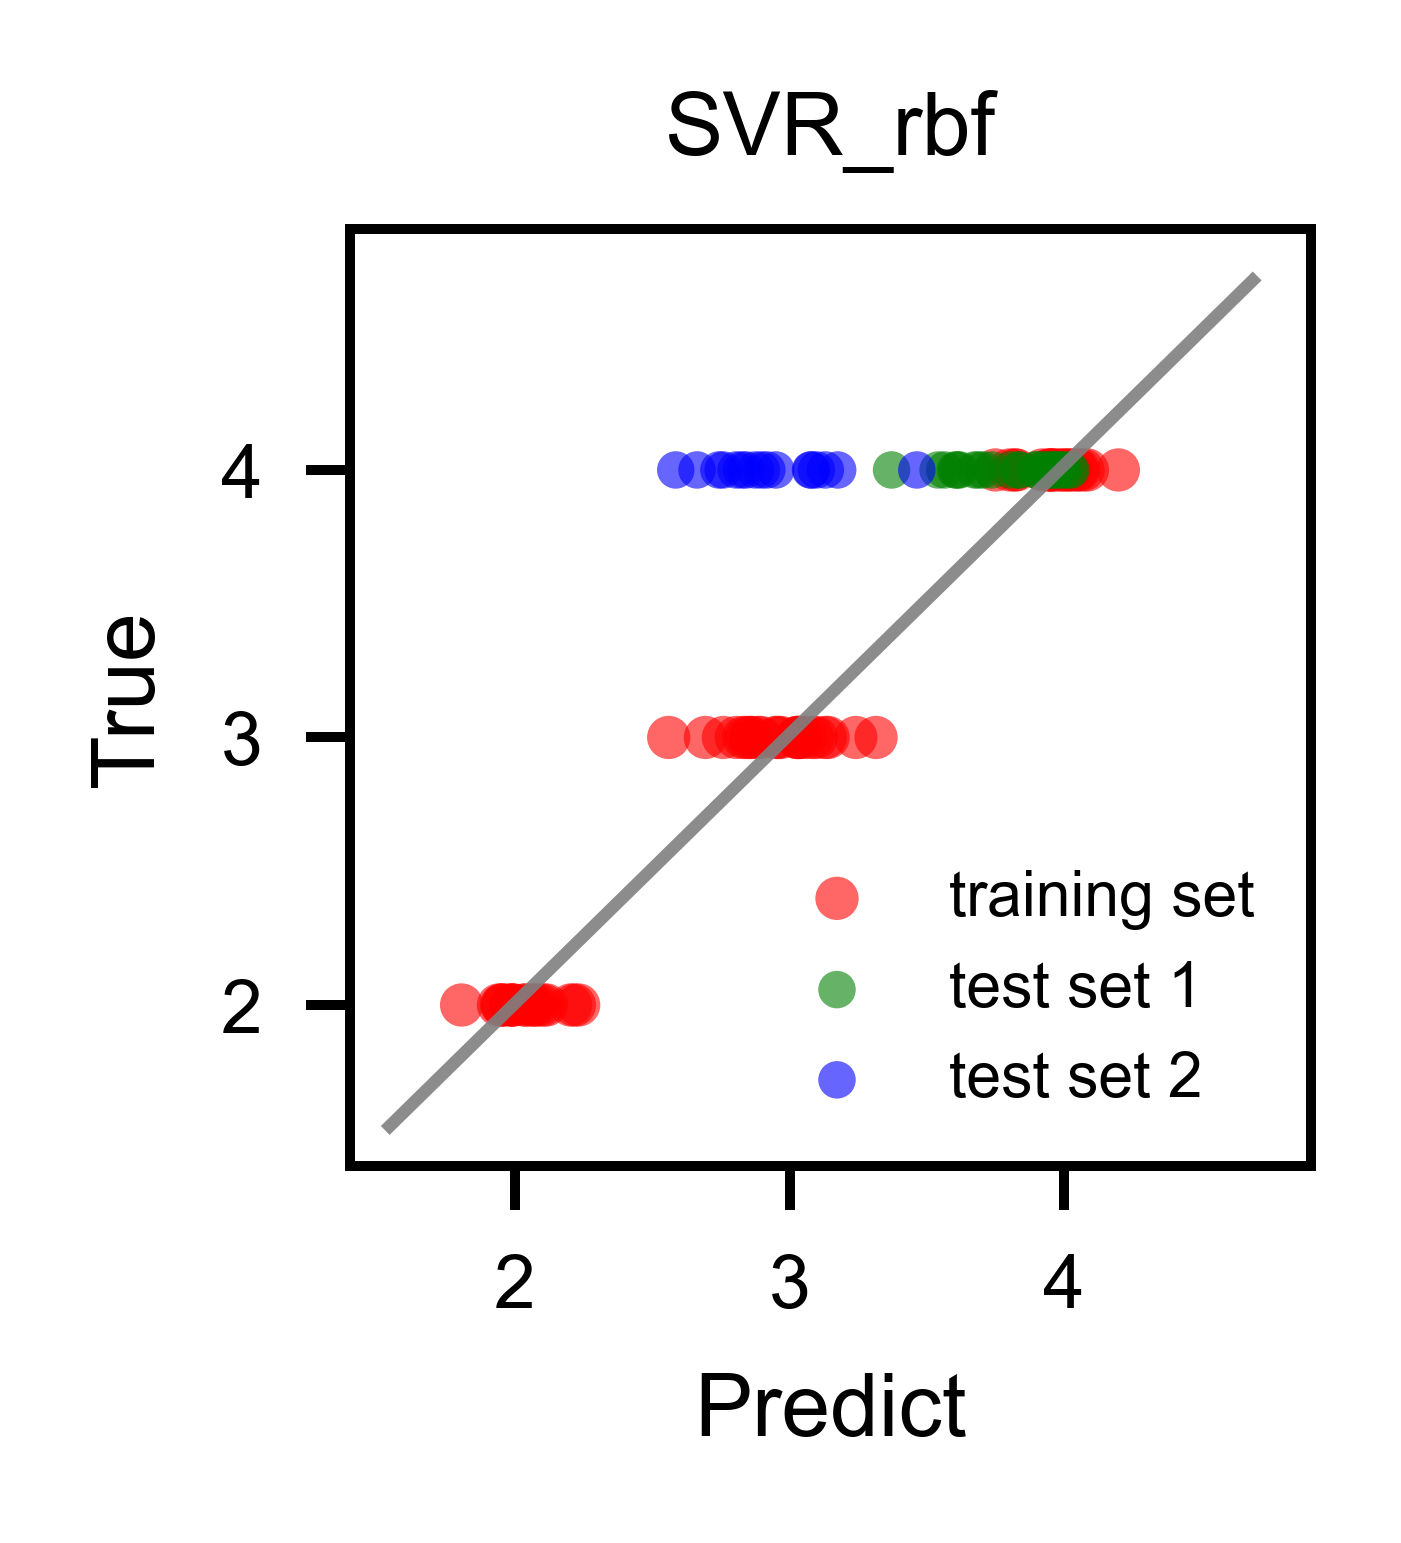

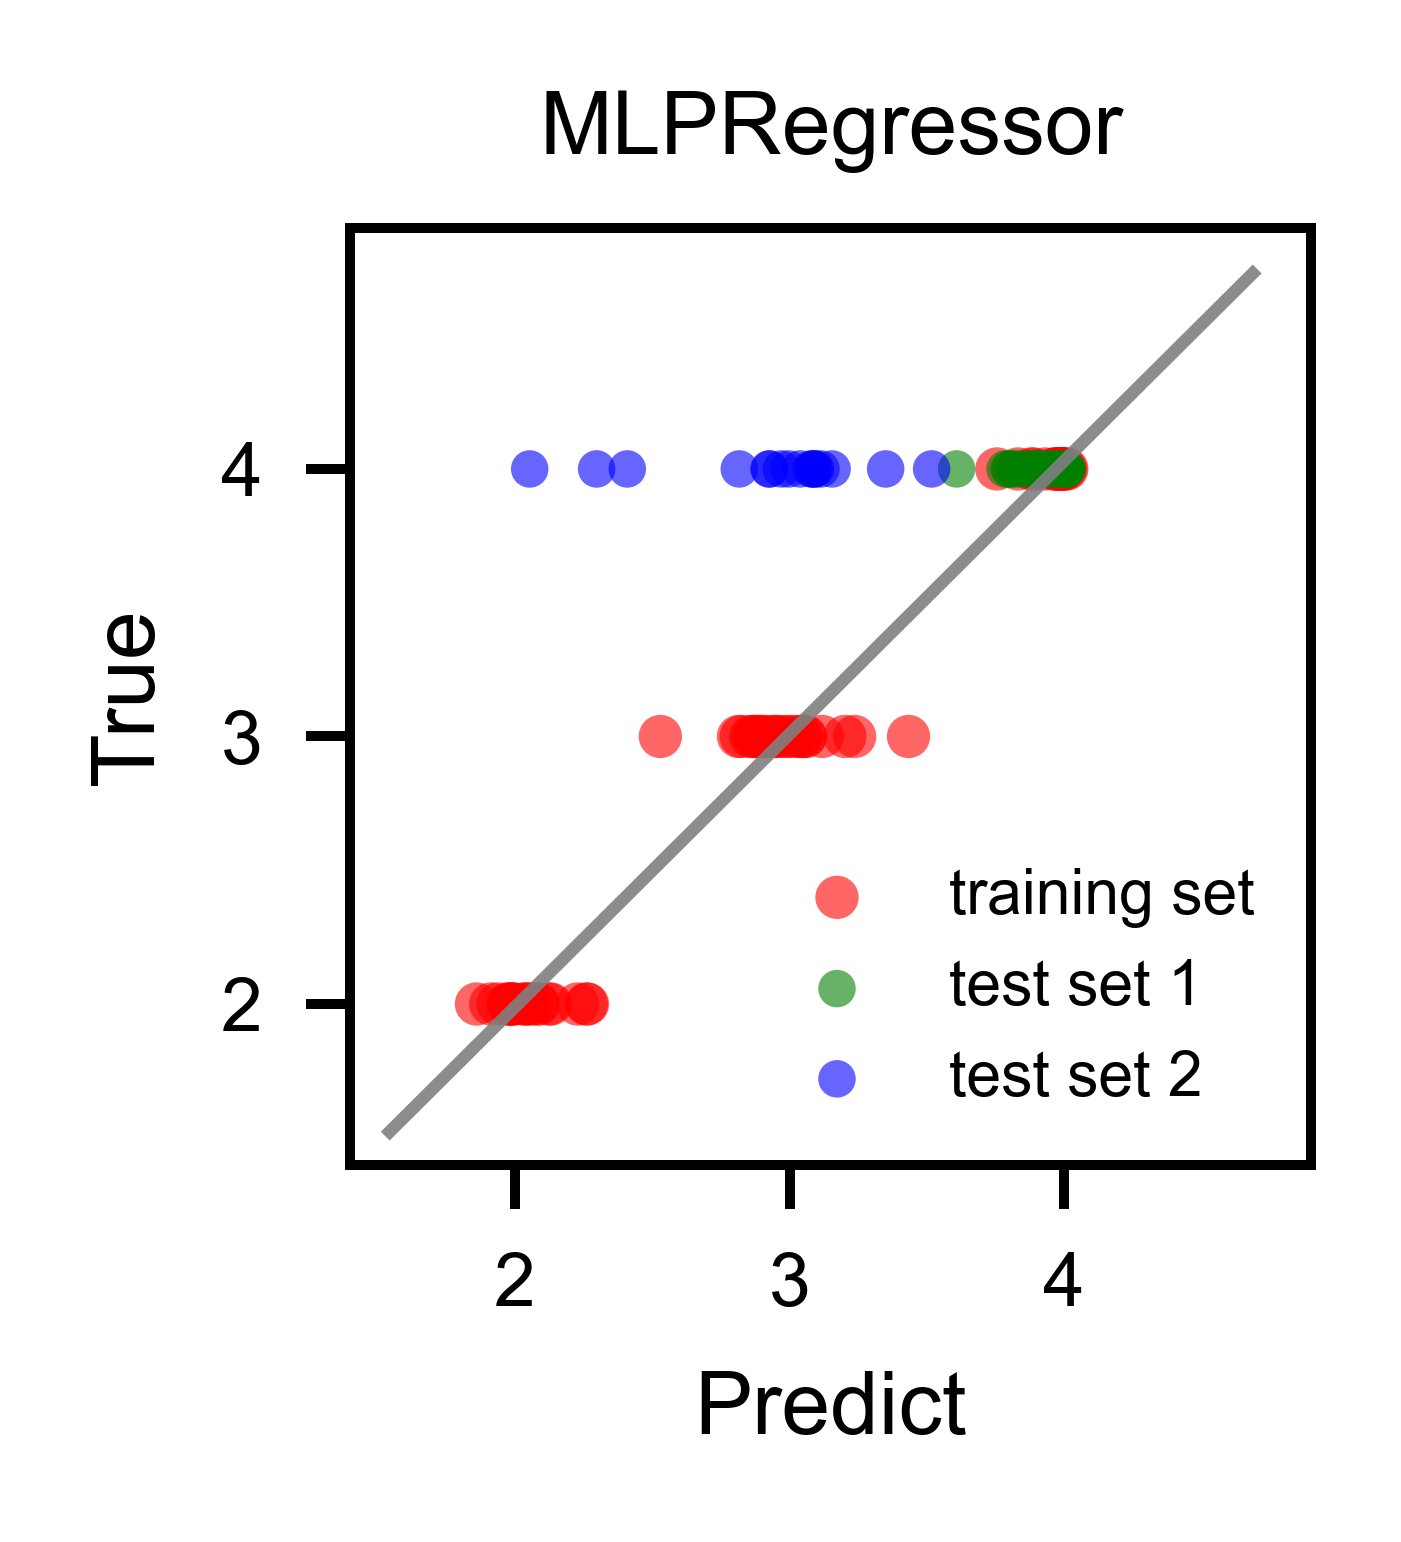

In [19]:
xlim = ylim = (1.4, 4.9)
xticks = yticks = [2, 3, 4]
plot.plot_setting(figsize=(3.5/2.54, 3.5/2.54), x_label='Predict',y_label='True', legend=5)
plot.plot_cv_regression_from_model(save=True, scatter_params={'s':12, 'edgecolors':'none', 'alpha':0.6, 'label':'training set'}, predict_scatter_params={'s':9, 'edgecolors':'none', 'alpha':0.6}, line_params={'color':'gray', 'alpha':0.9, 'linewidth':1}, xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)

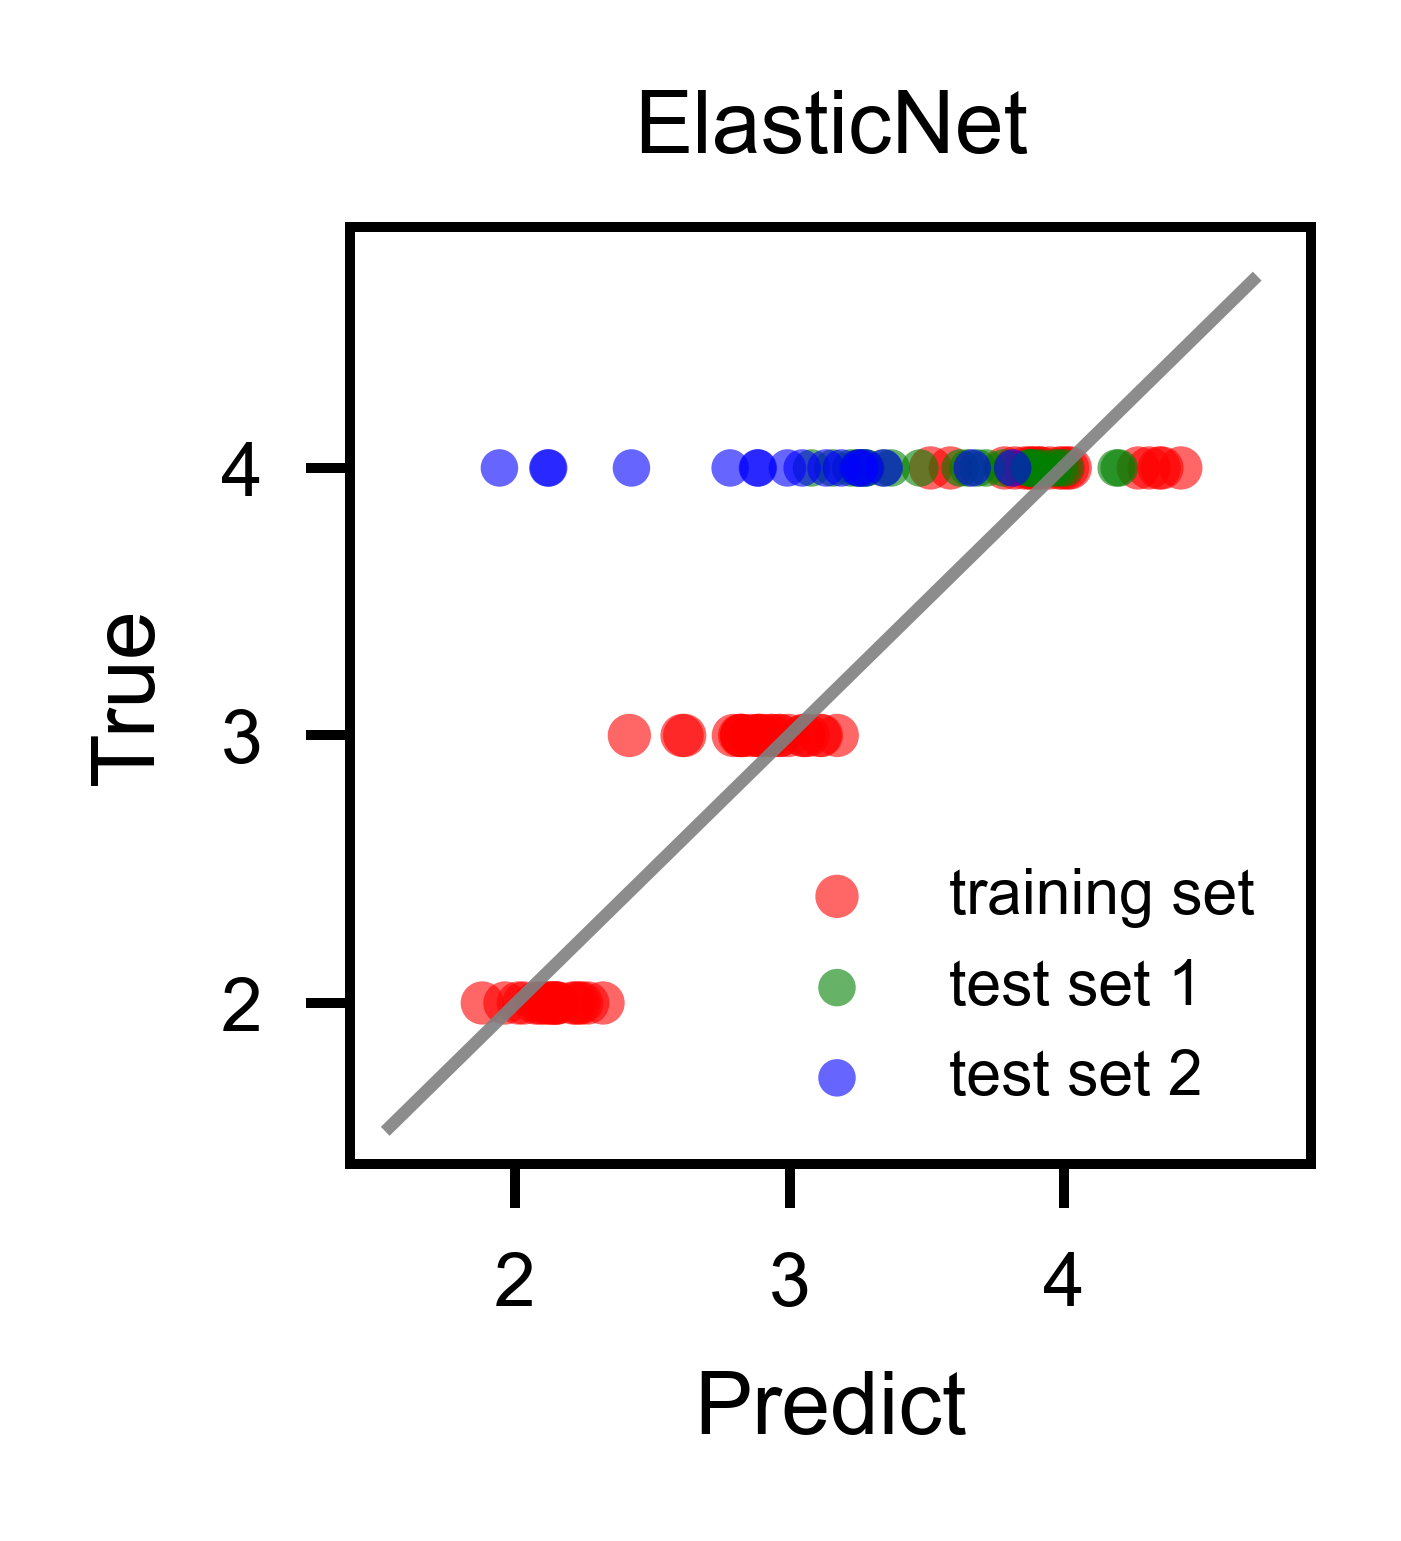

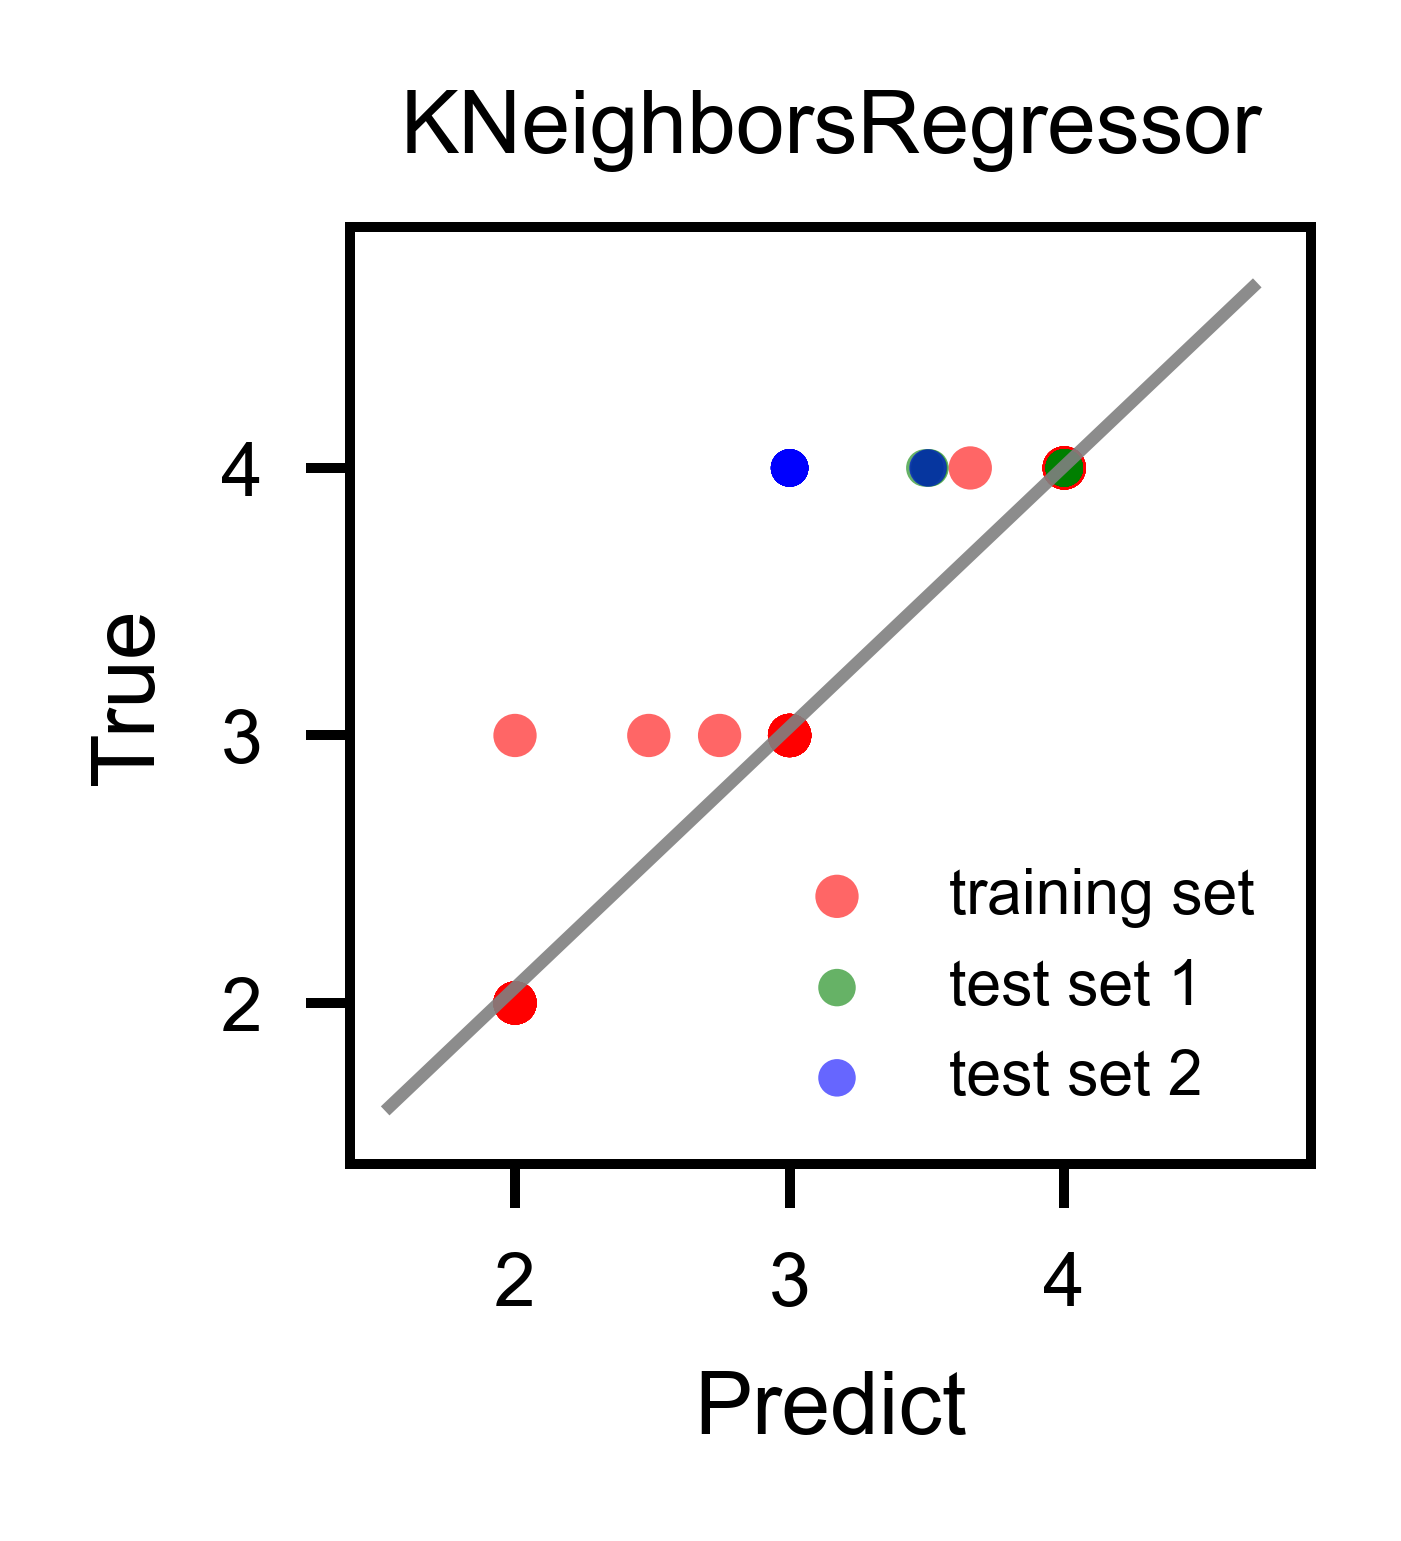

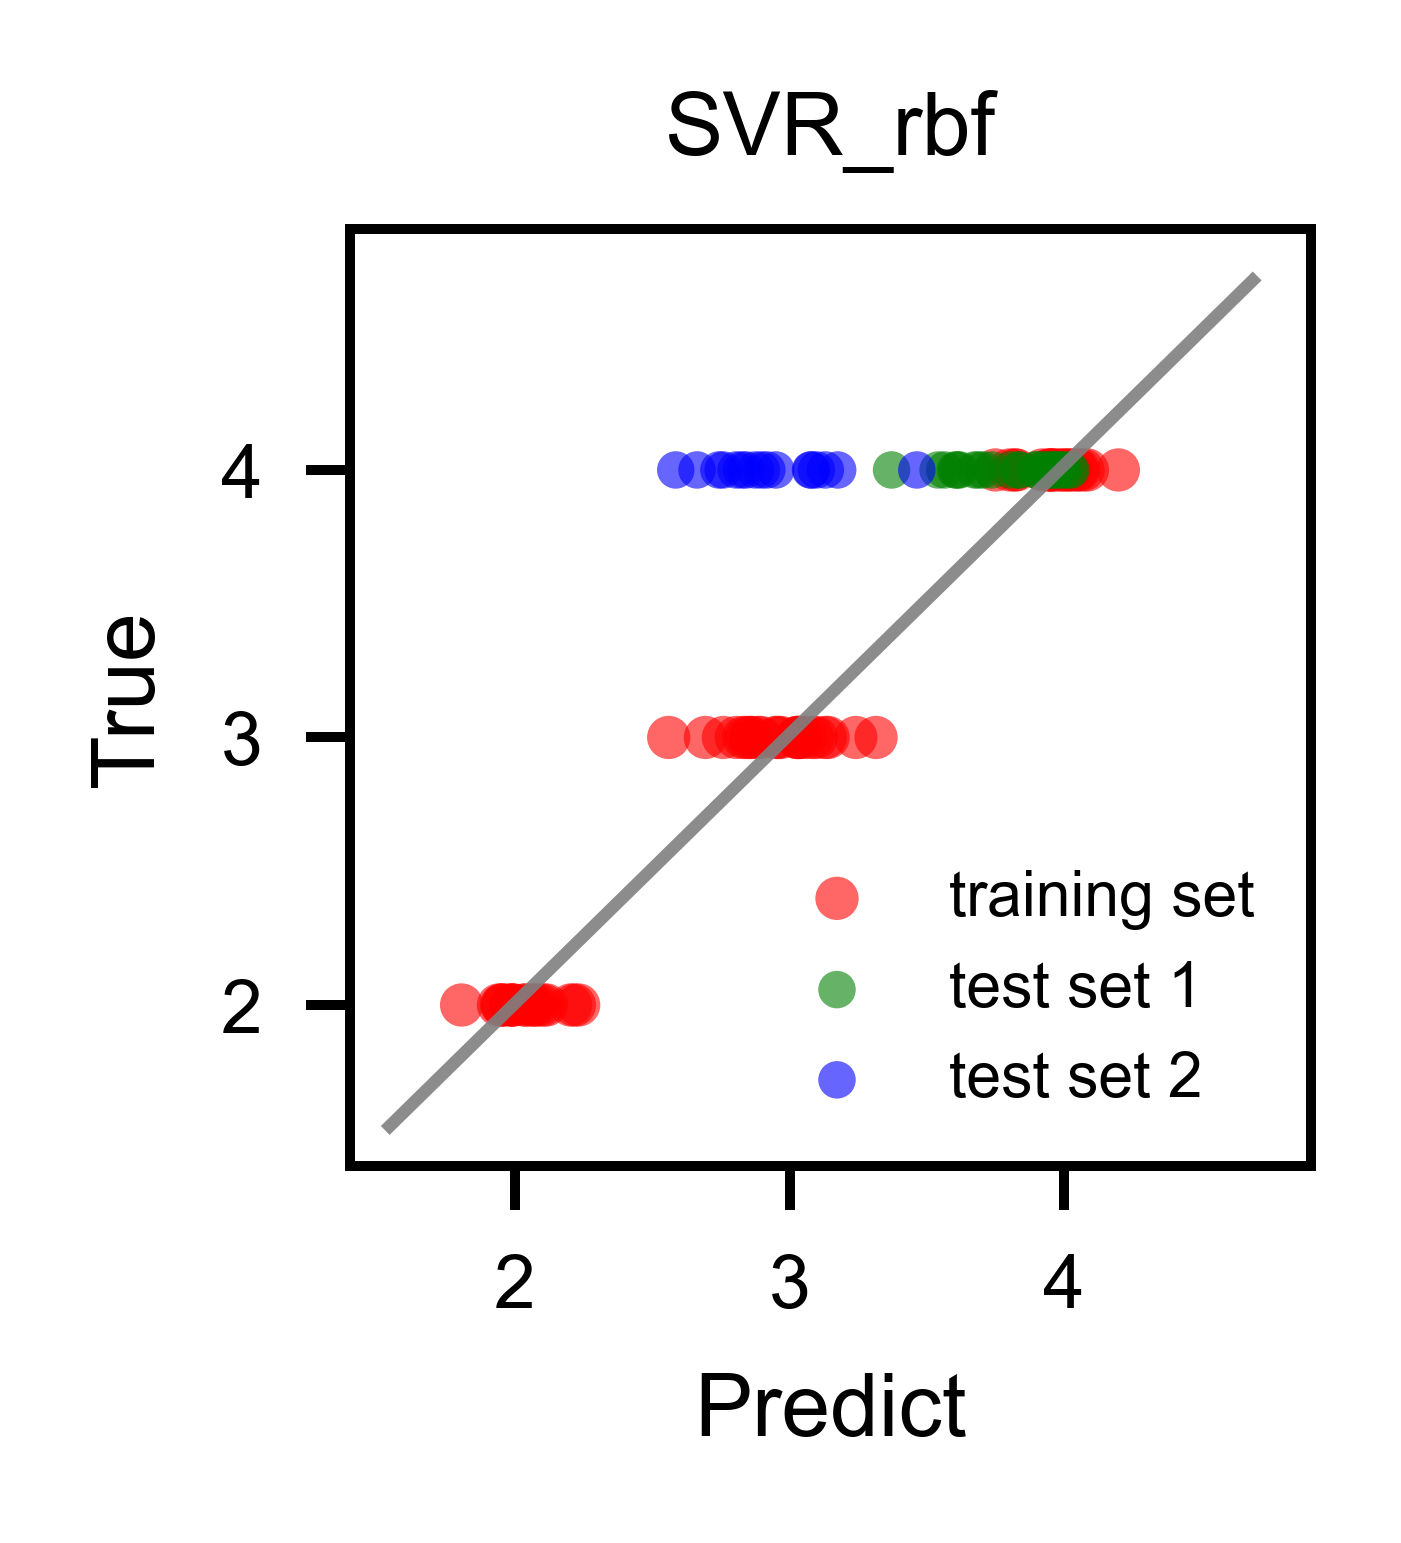

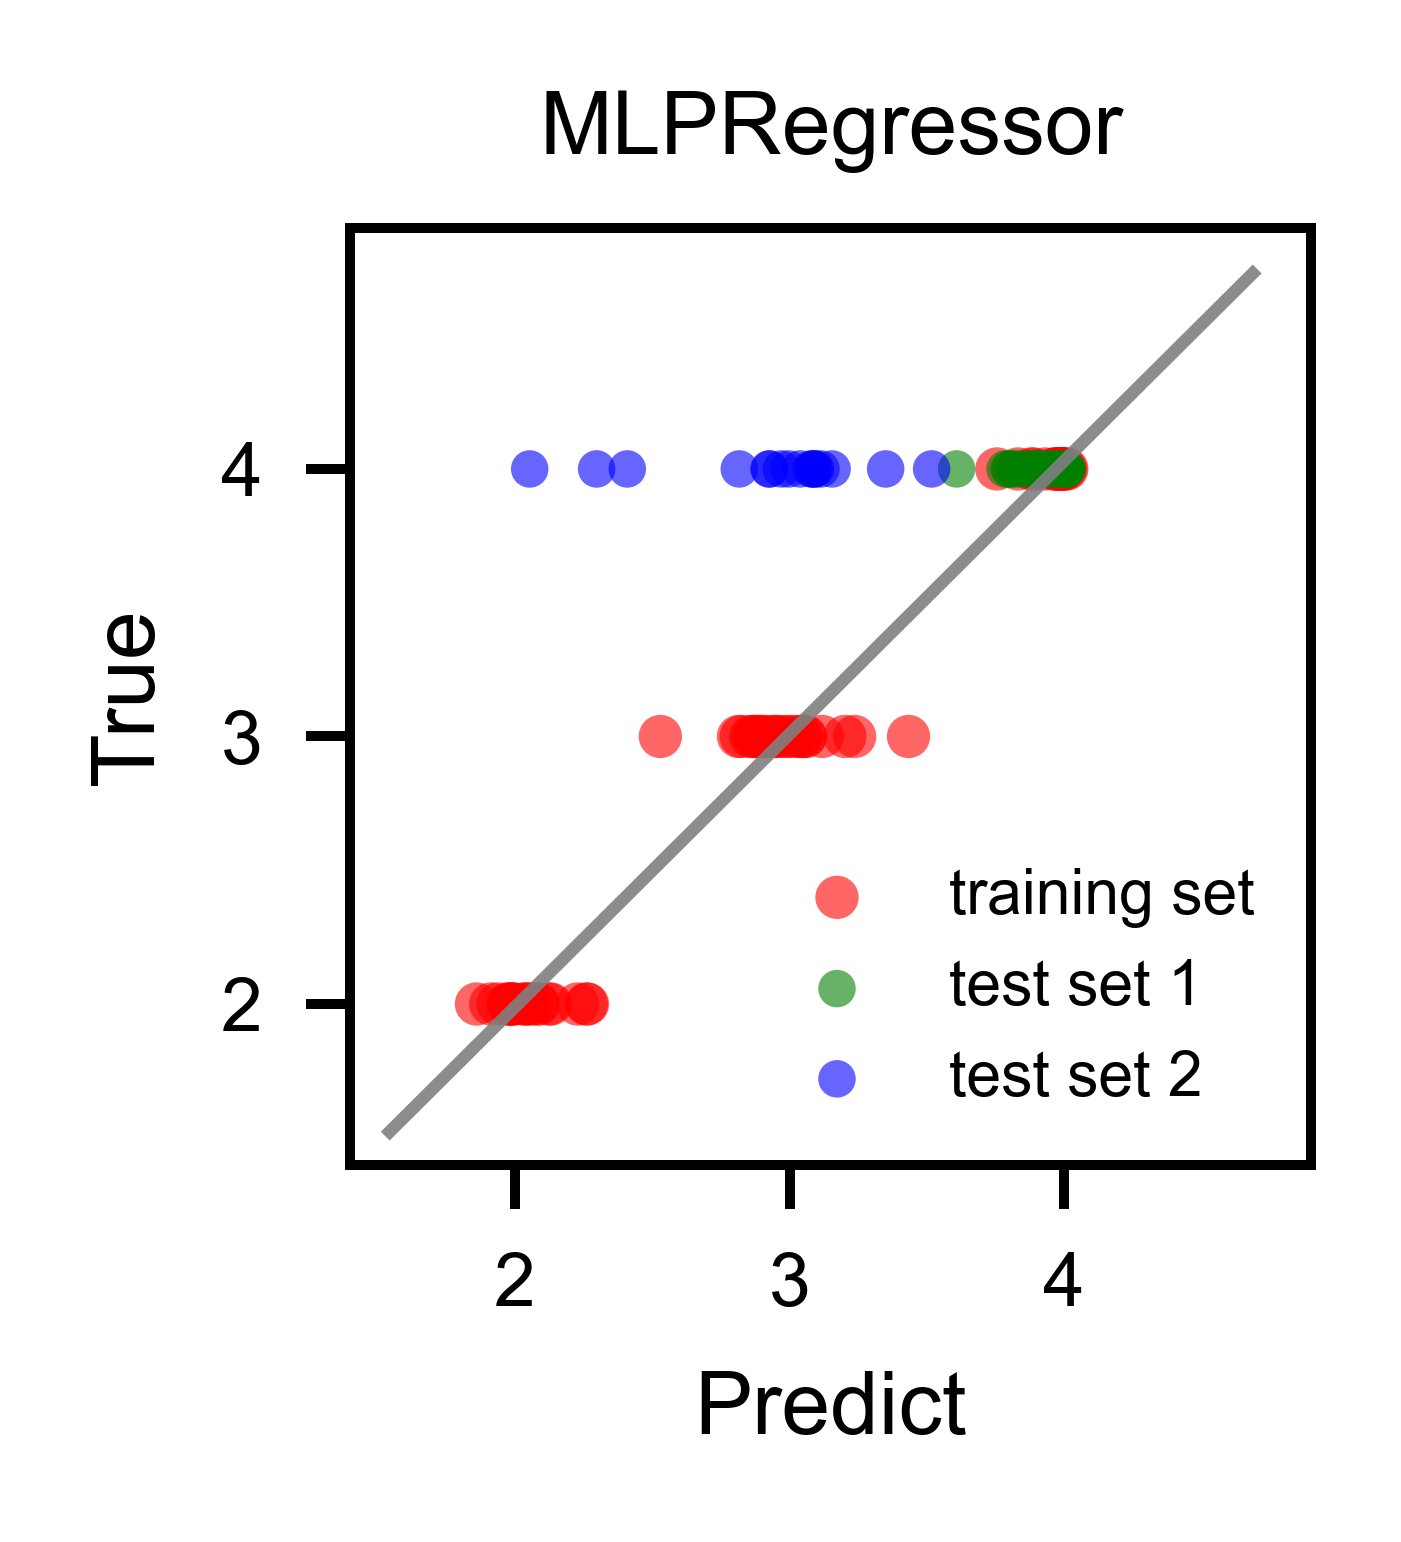

In [20]:
xlim = ylim = (1.4, 4.9)
xticks = yticks = [2, 3, 4]
plot.plot_setting(figsize=(3.5/2.54, 3.5/2.54), x_label='Predict',y_label='True', legend=5)
plot.plot_cv_regression_from_model(save=True, scatter_params={'s':12, 'edgecolors':'none', 'alpha':0.6, 'label':'training set'}, predict_scatter_params={'s':9, 'edgecolors':'none', 'alpha':0.6}, line_params={'color':'gray', 'alpha':0.9, 'linewidth':1}, xlim=xlim, ylim=ylim, xticks=xticks, yticks=yticks)

In [21]:
plot.regression_line

{'ElasticNet': 'y=1.0067x-0.0174\nR²=0.9274',
 'KNeighborsRegressor': 'y=0.9746x+0.1083\nR²=0.9645',
 'SVR_rbf': 'y=1.0059x-0.0054\nR²=0.9687',
 'MLPRegressor': 'y=1.0209x-0.0531\nR²=0.9704'}

# PCA results

In [22]:
d1 = Data()
d1.load_data('test set 1.xlsx', label_col, drop_col)
d2 = Data()
d2.load_data('test set 2.xlsx', label_col, drop_col)
d3 = Data()
d3.load_data('train_data.xlsx', label_col, drop_col)
test_1 = d1.df_x
test_2 = d2.df_x
training = d3.df_x

Number of data set: 25
Number of features: 9
Number of data set: 17
Number of features: 9
Number of data set: 64
Number of features: 9


explained variance: [3.39581244 2.07482223 1.19020261]
explained variance ratio: [0.37375294 0.22836094 0.13099714]
explained variance ratio (sum): 0.7331110206249232


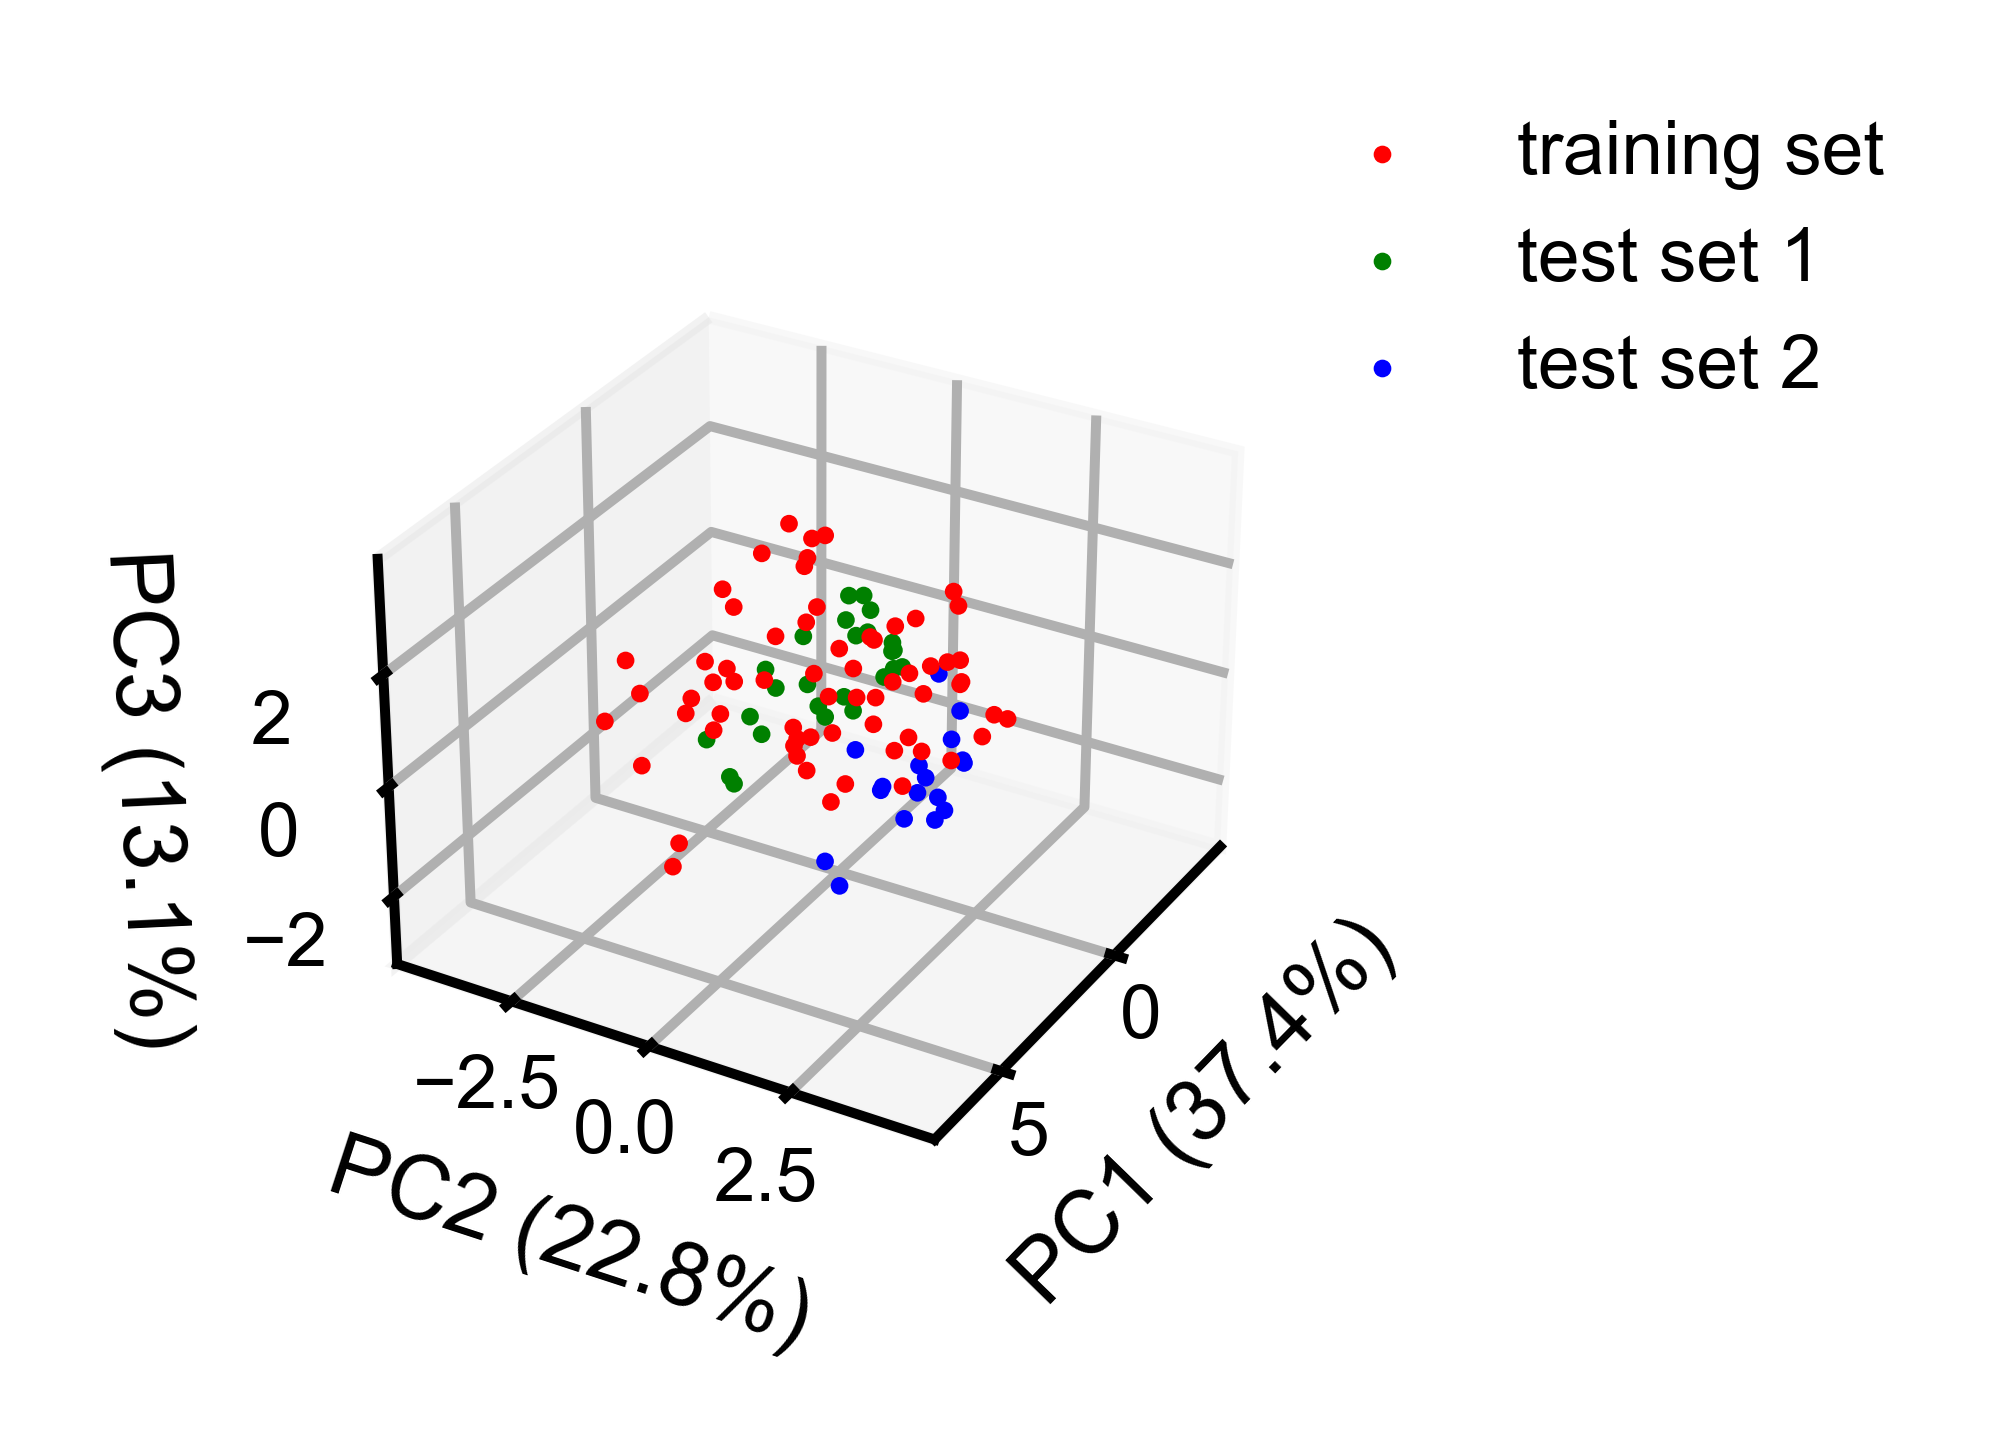

In [23]:
plot.plot_pca(training, test_1, test_2, elev=30, azim=30, scale='StandardScaler', project=False)

explained variance: [3.39581244 2.07482223 1.19020261]
explained variance ratio: [0.37375294 0.22836094 0.13099714]
explained variance ratio (sum): 0.7331110206249232


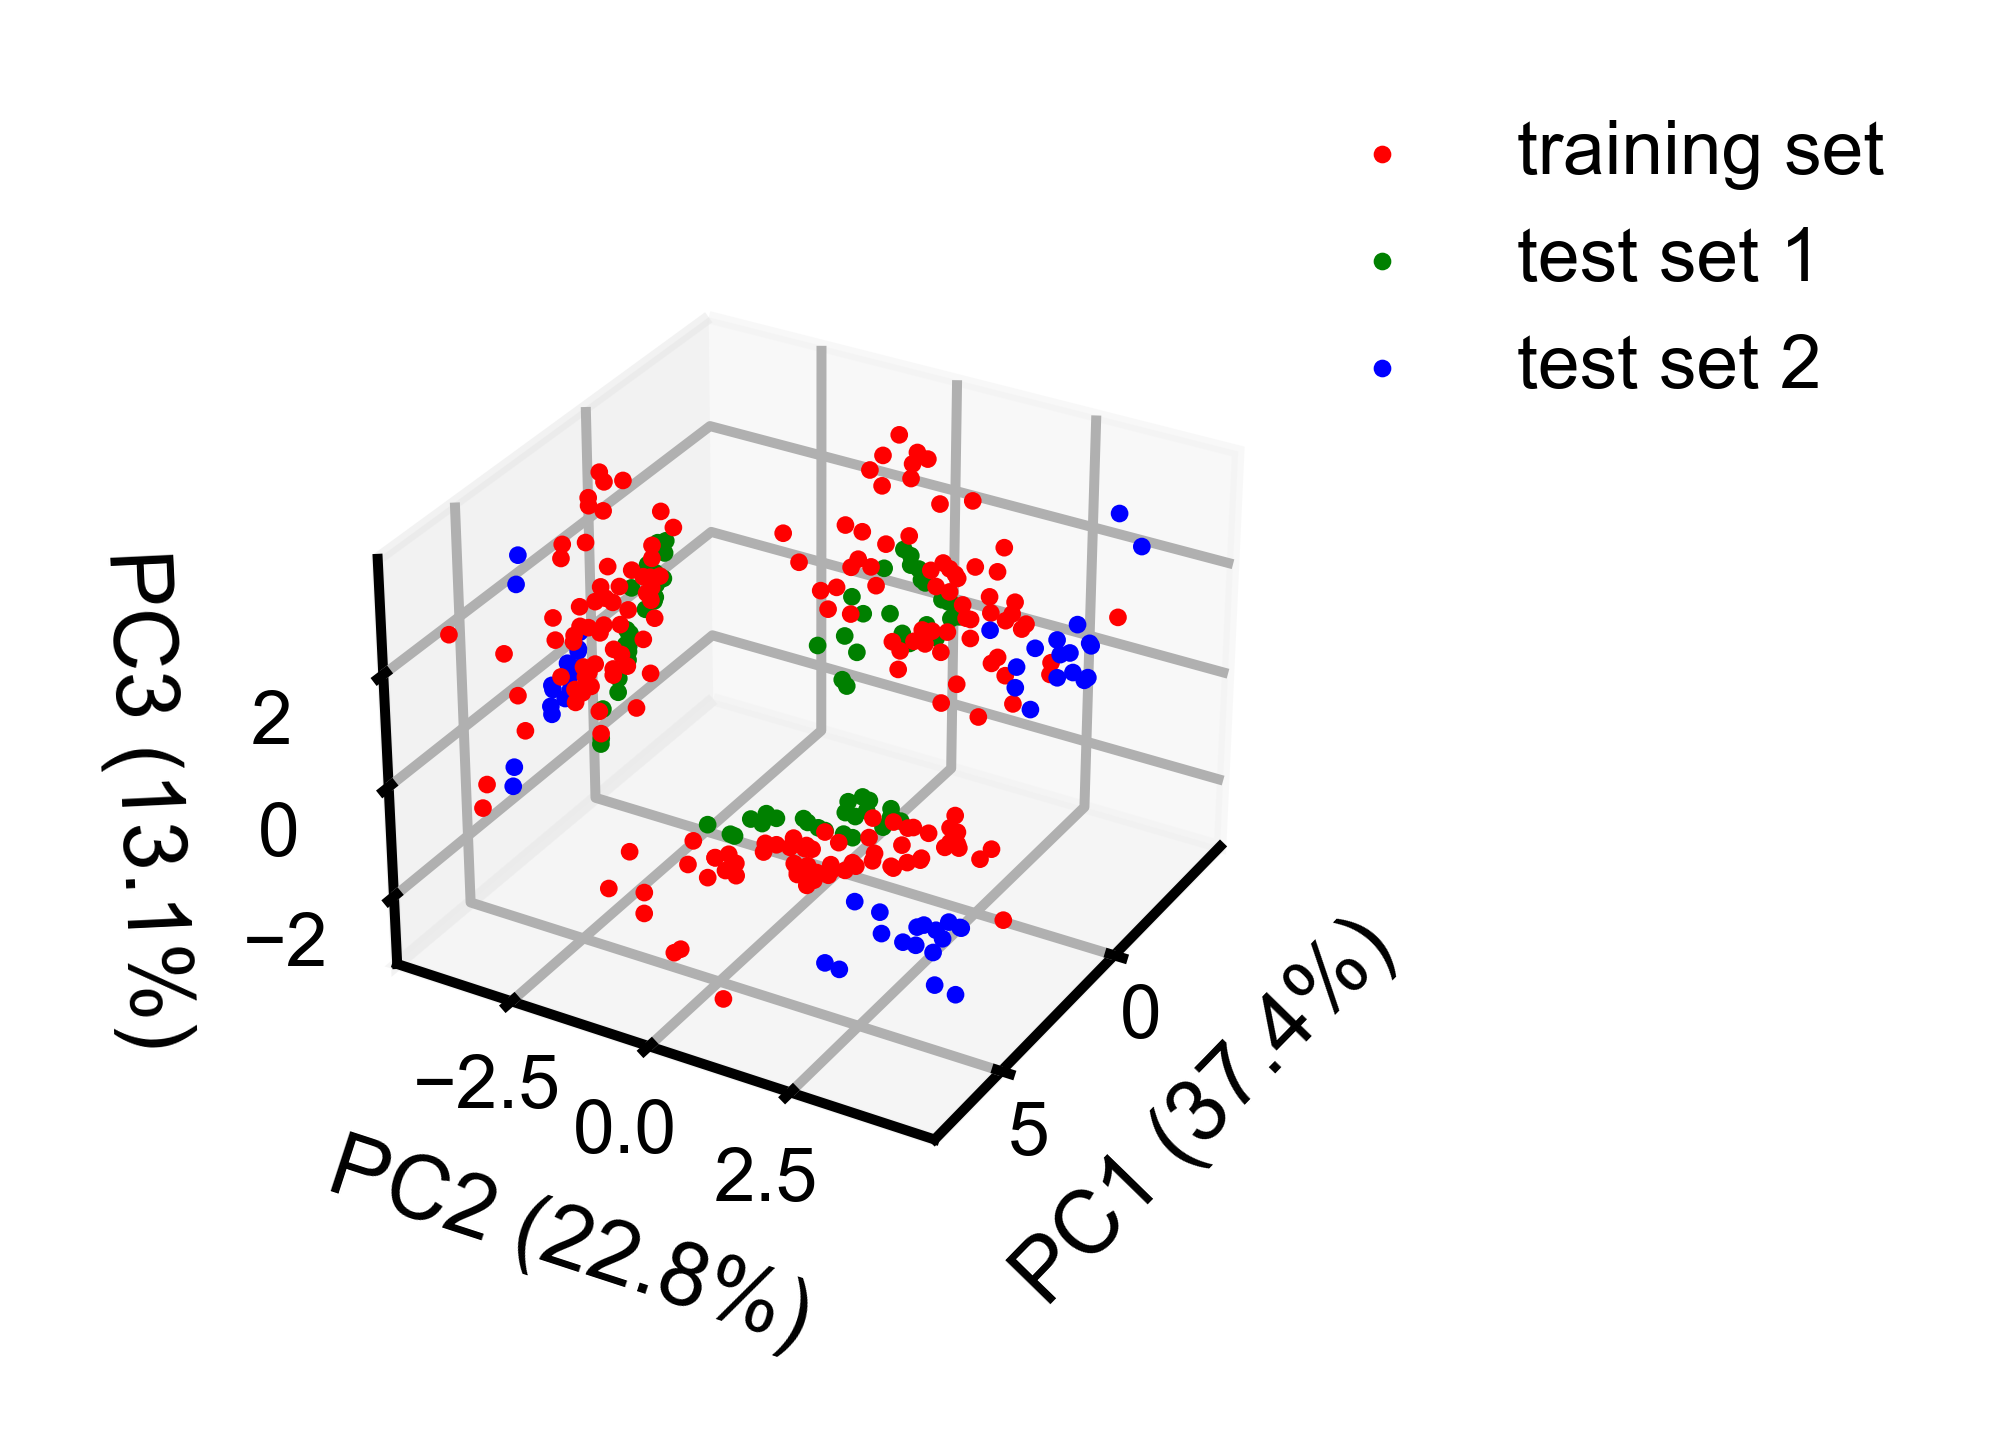

In [24]:
plot.plot_pca(training, test_1, test_2, elev=30, azim=30, scale='StandardScaler', project=True)

# applicability domain analysis

In [25]:
test_data = 'test_data(merged).xlsx'
data.load_data(test_data, label_col, drop_col, mode='predict')

Number of predicted data set: 42
Number of predicted features: 9


In [26]:
model.load_predict_data(data=data)

rank_test_neg_mean_squared_error  rank_test_r2  \
4330                                  1             2   
8401                                  1             1   
50874                                 1             1   
62561                                 1             1   

       mean_test_neg_mean_squared_error  mean_test_r2  \
4330                          -0.041717      0.911943   
8401                          -0.022231      0.954084   
50874                         -0.018583      0.962741   
62561                         -0.017133      0.965435   

       std_test_neg_mean_squared_error  std_test_r2            algorithm  \
4330                          0.019439     0.042231           ElasticNet   
8401                          0.028465     0.058532  KNeighborsRegressor   
50874                         0.005925     0.012023              SVR_rbf   
62561                         0.005846     0.013119         MLPRegressor   

                                                  params  \
4330    {'alpha': 0.014551483398731937, 'l1_ratio': 0.2}   
8401           {'n_neighbors': 2, 'weights': 'distance'}   
50874  {'C': 8.531678524172815, 'epsilon': 0.07278953...   
62561  {'activation': 'tanh', 'alpha': 0.0001, 'early...   

       all_mean_squared_error  predict_mean_squared_error  \
4330                 0.034986                    0.242903   
8401                 0.000000                    0.069637   
50874                0.012388                    0.069722   
62561                0.007492                    0.015783   

       predict_mean_squared_error_1  predict_mean_squared_error_2  
4330                       1.370666                      0.699378  
8401                       0.955654                      0.428263  
50874                      1.180219                      0.519209  
62561                      1.259706                      0.519276

============= best_model_predict | Time: 0.0h 0.0min 0s ==============



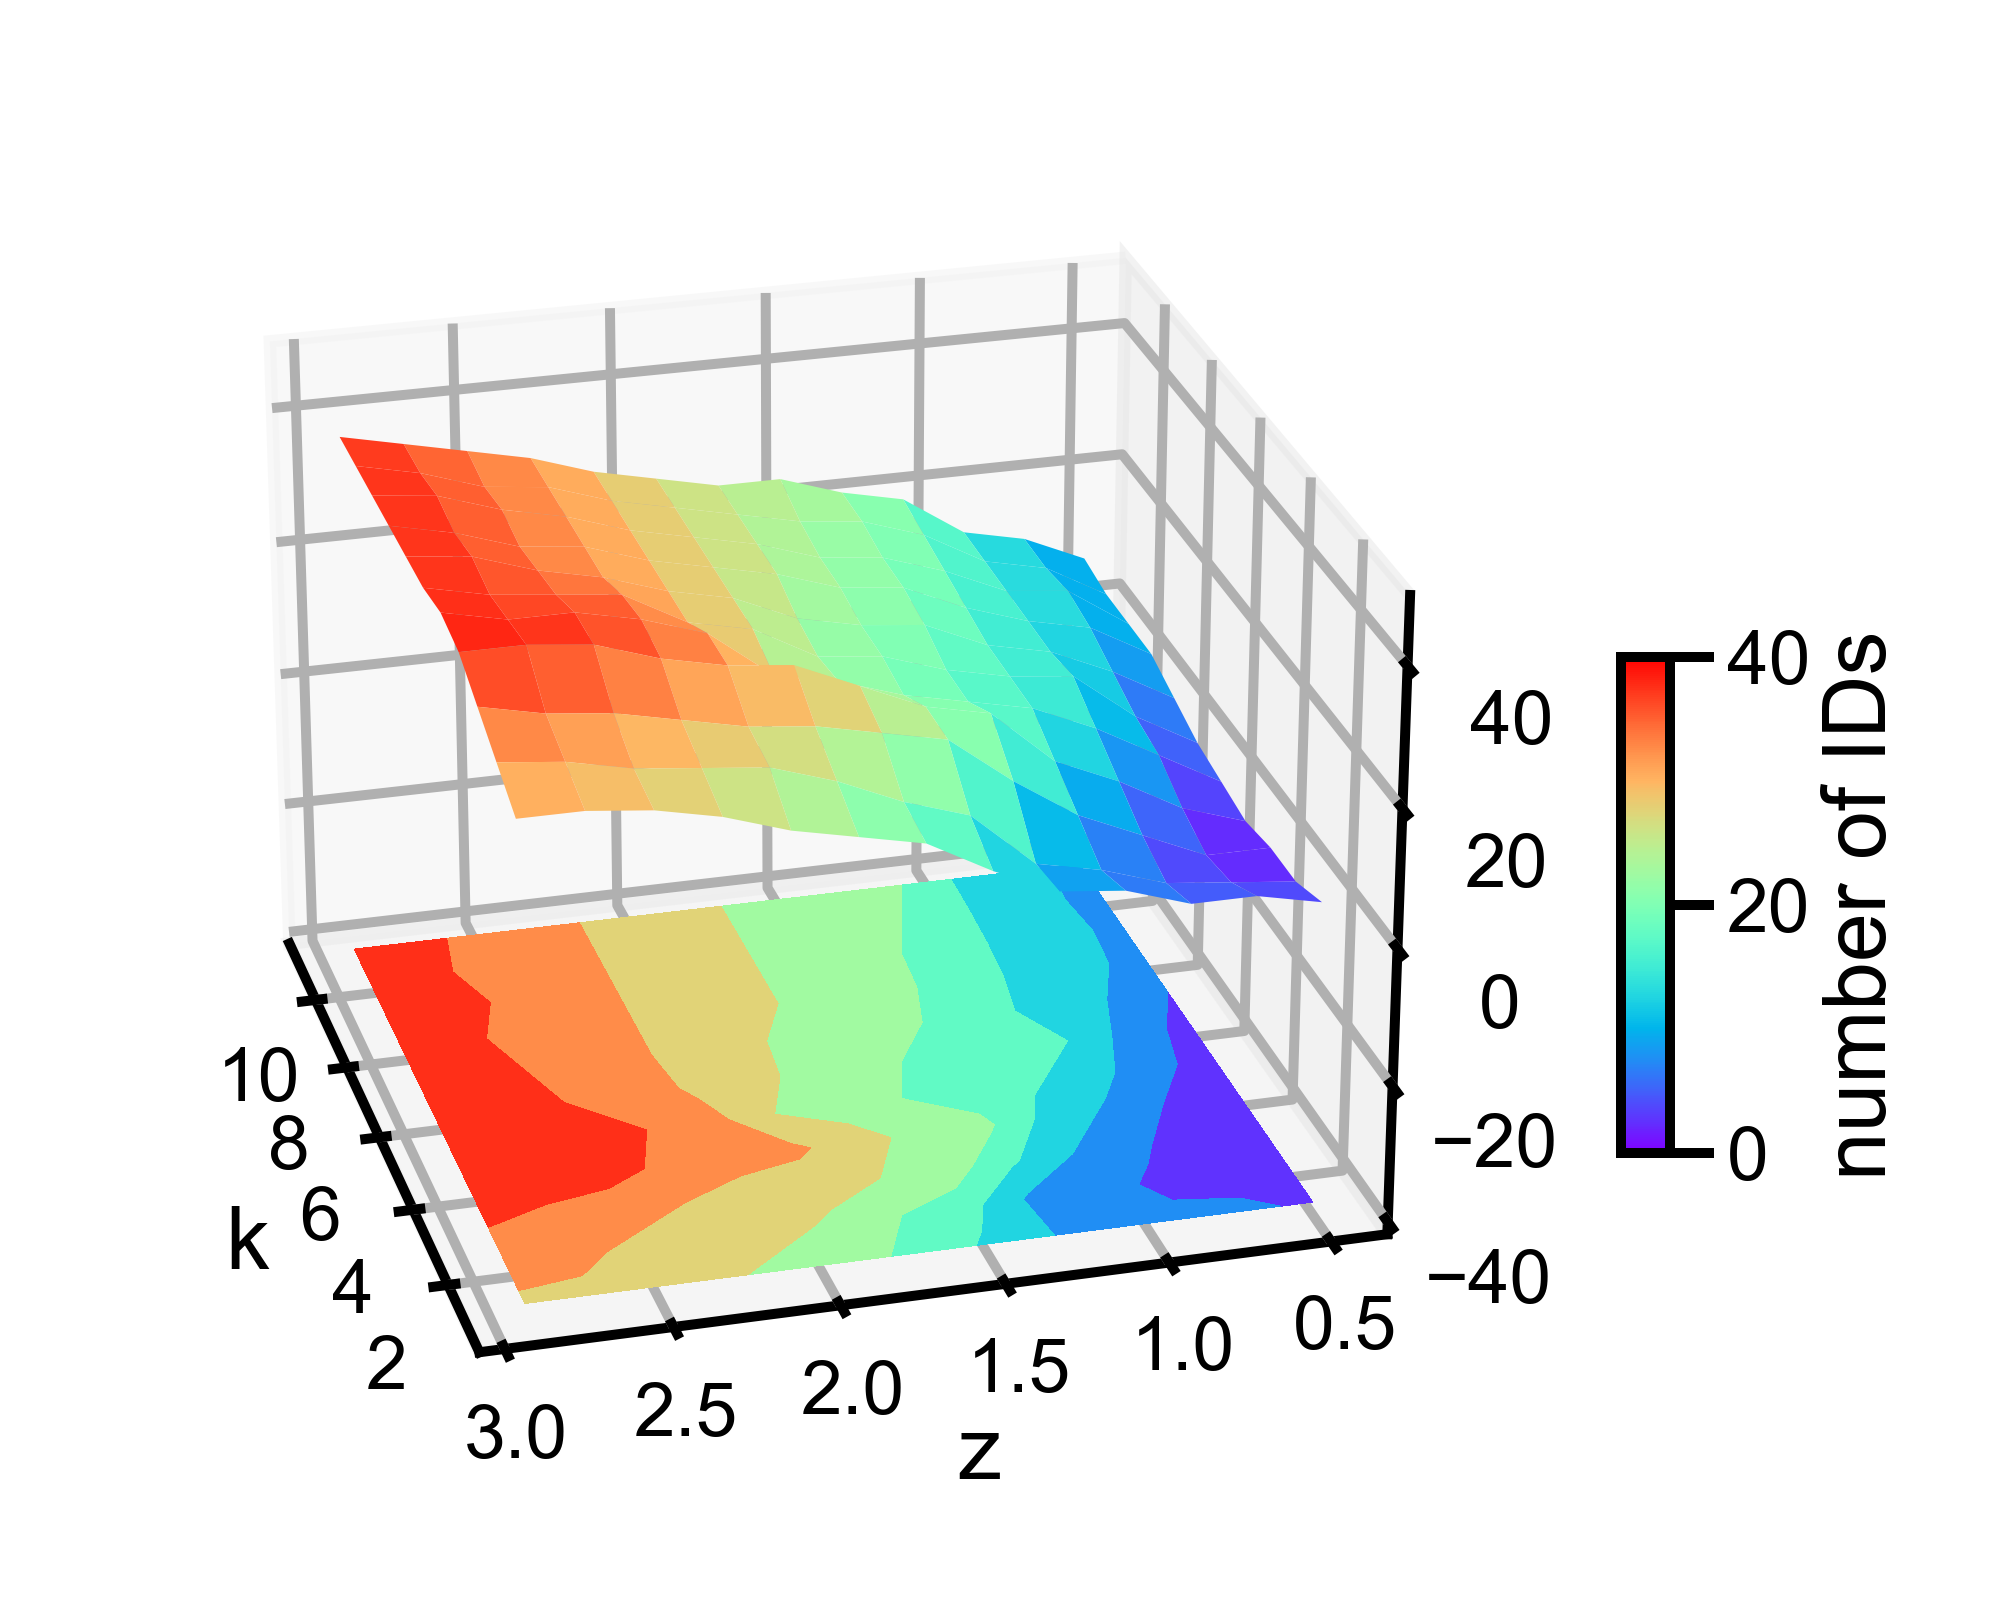

In [27]:
plot.applicability_domain_num(model, k_value=np.arange(1, 12, 1), z_value=np.arange(0.5, 3, 0.2))

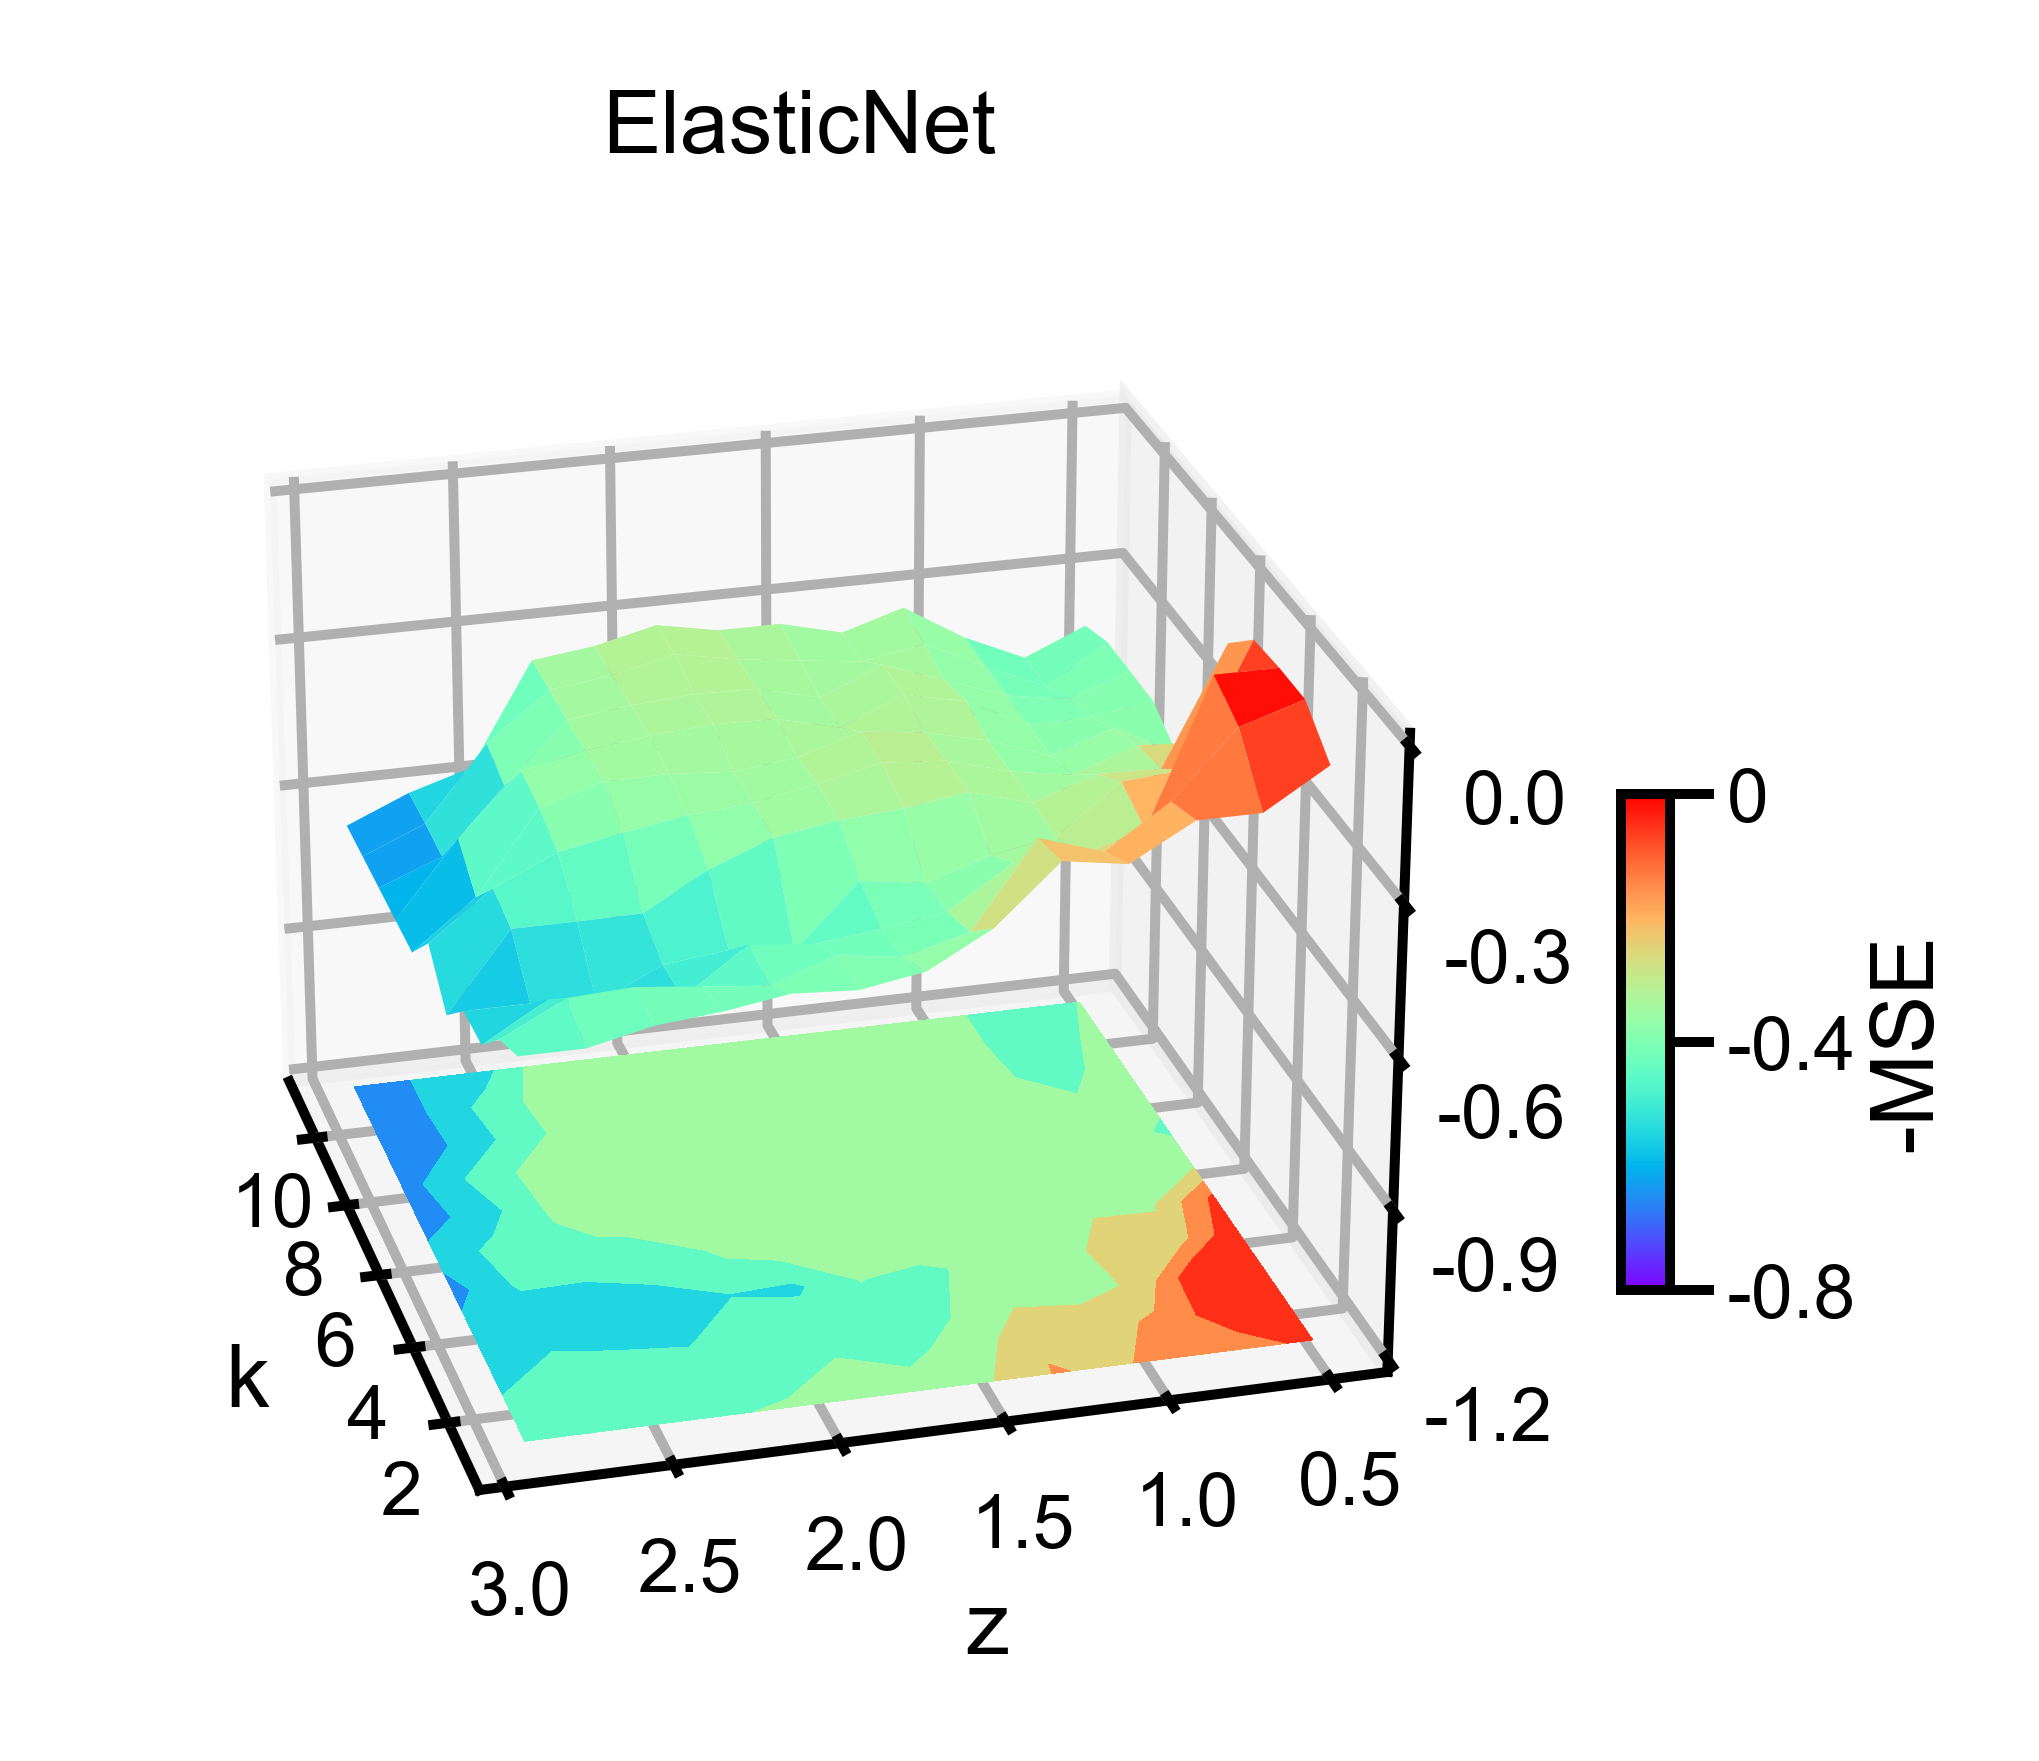

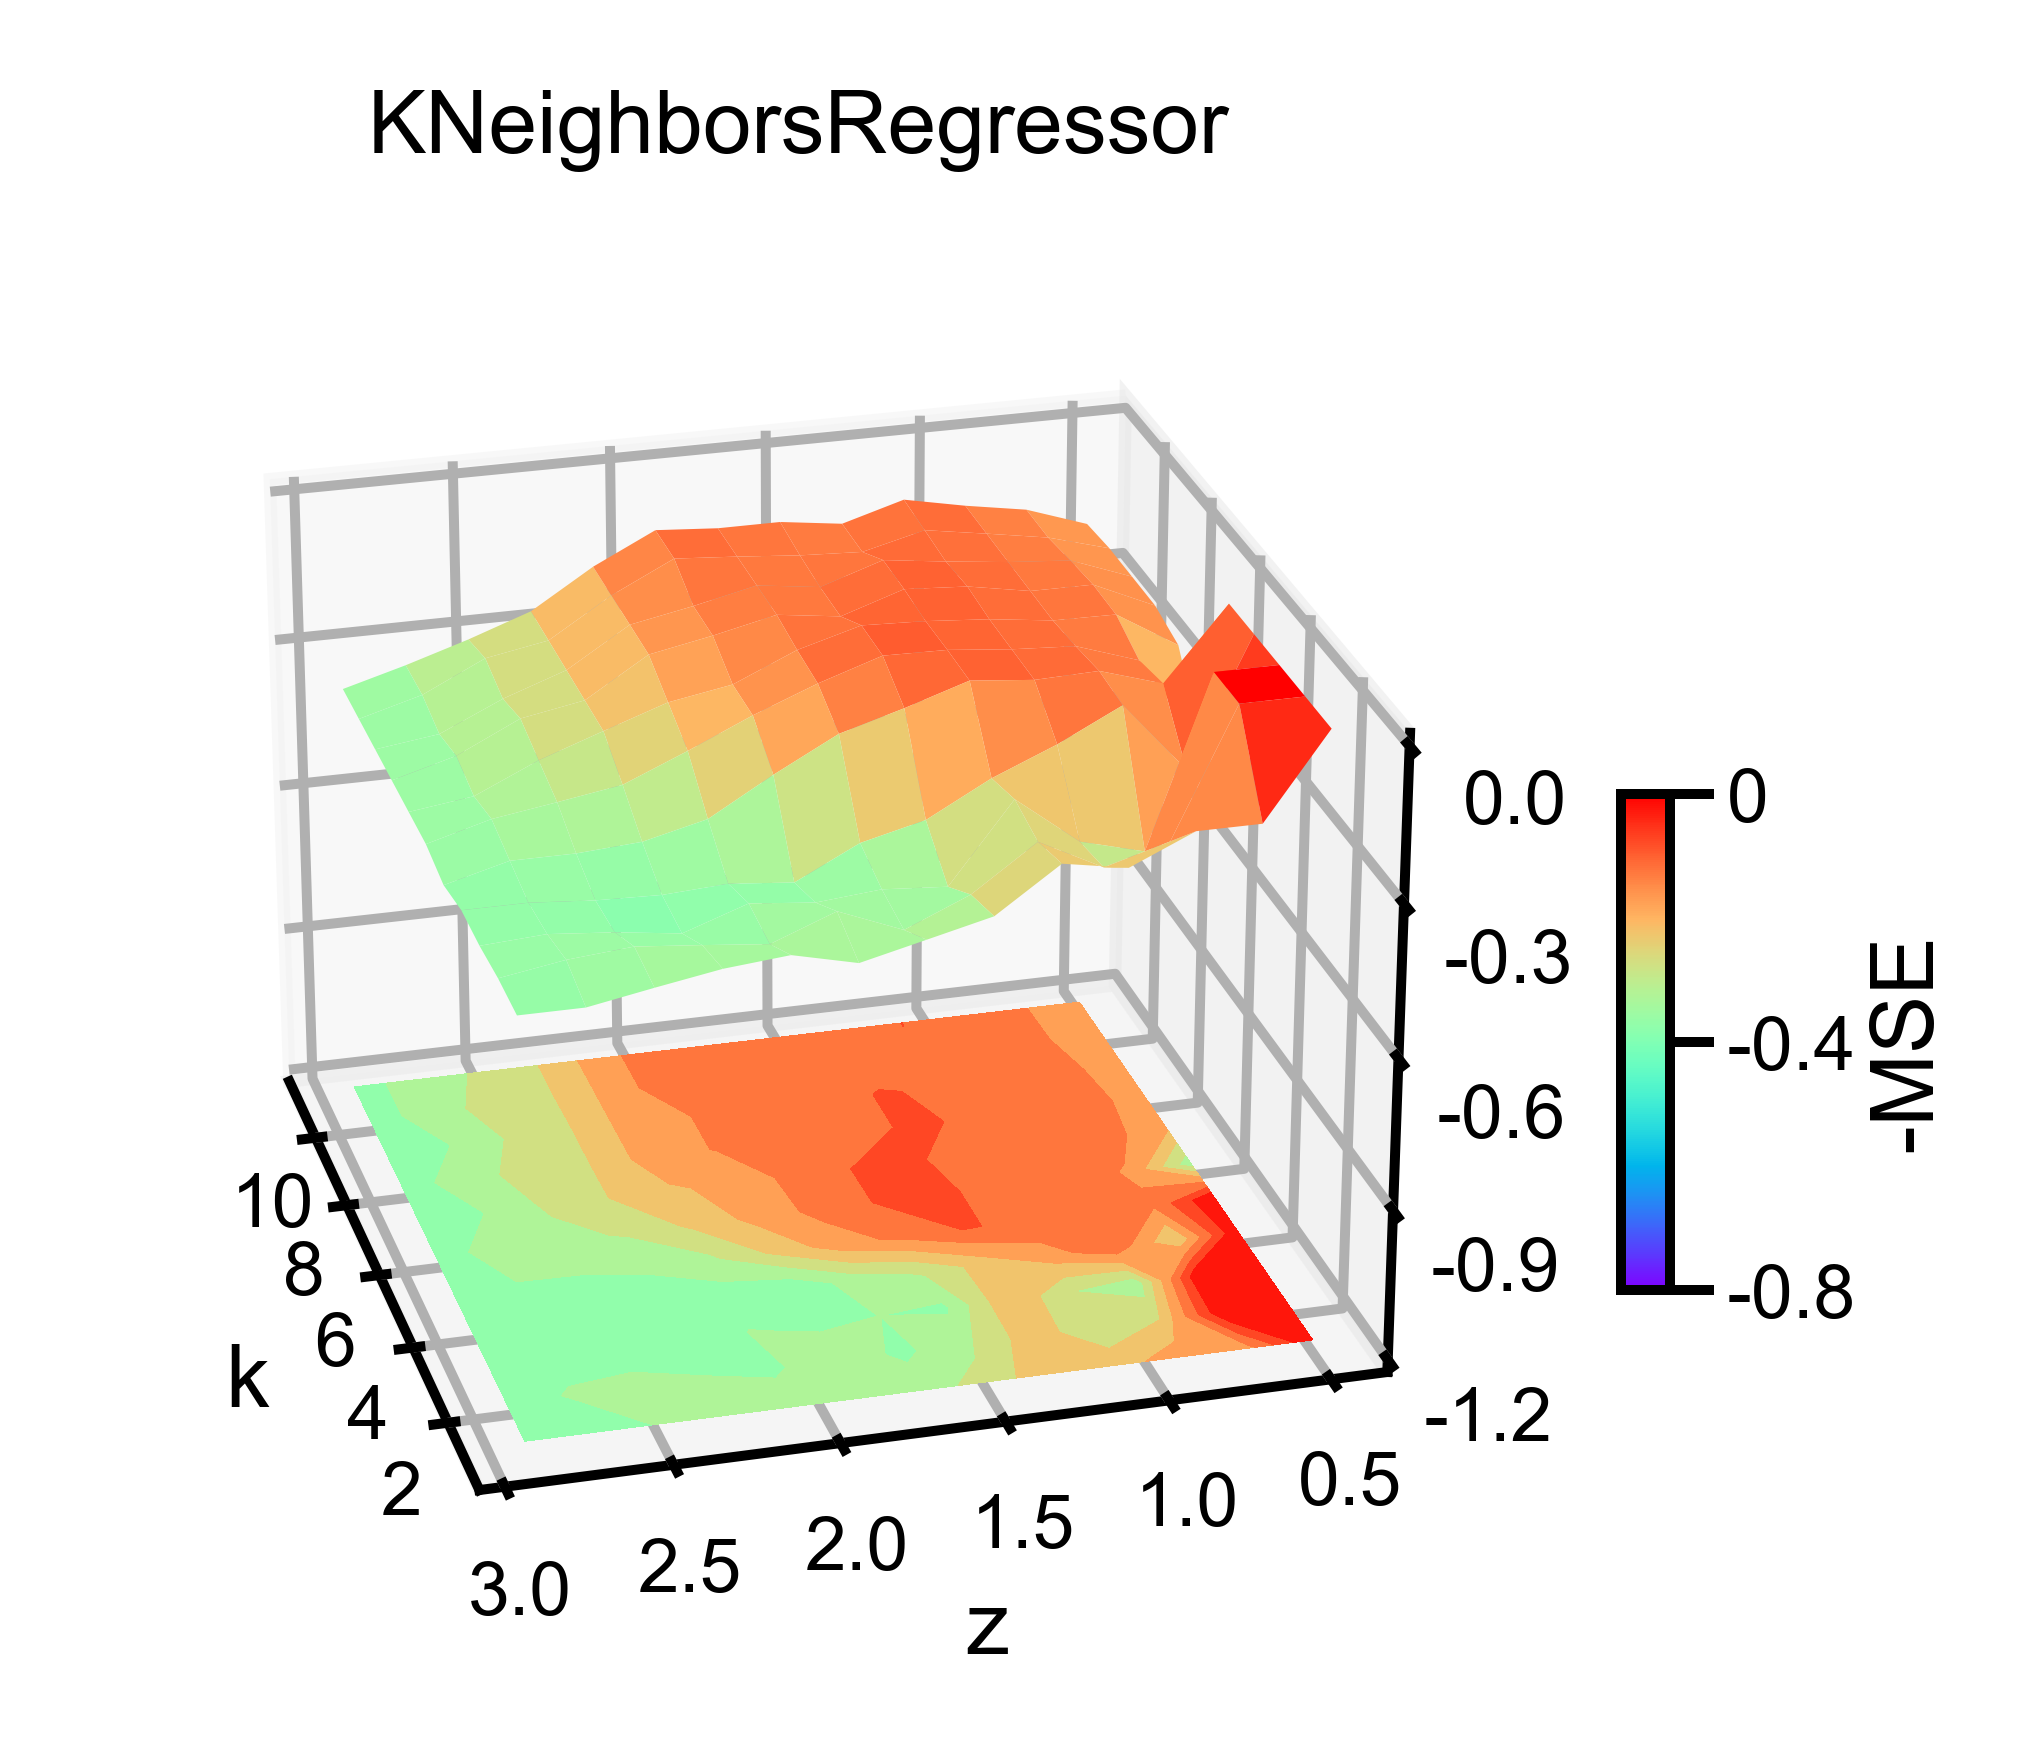

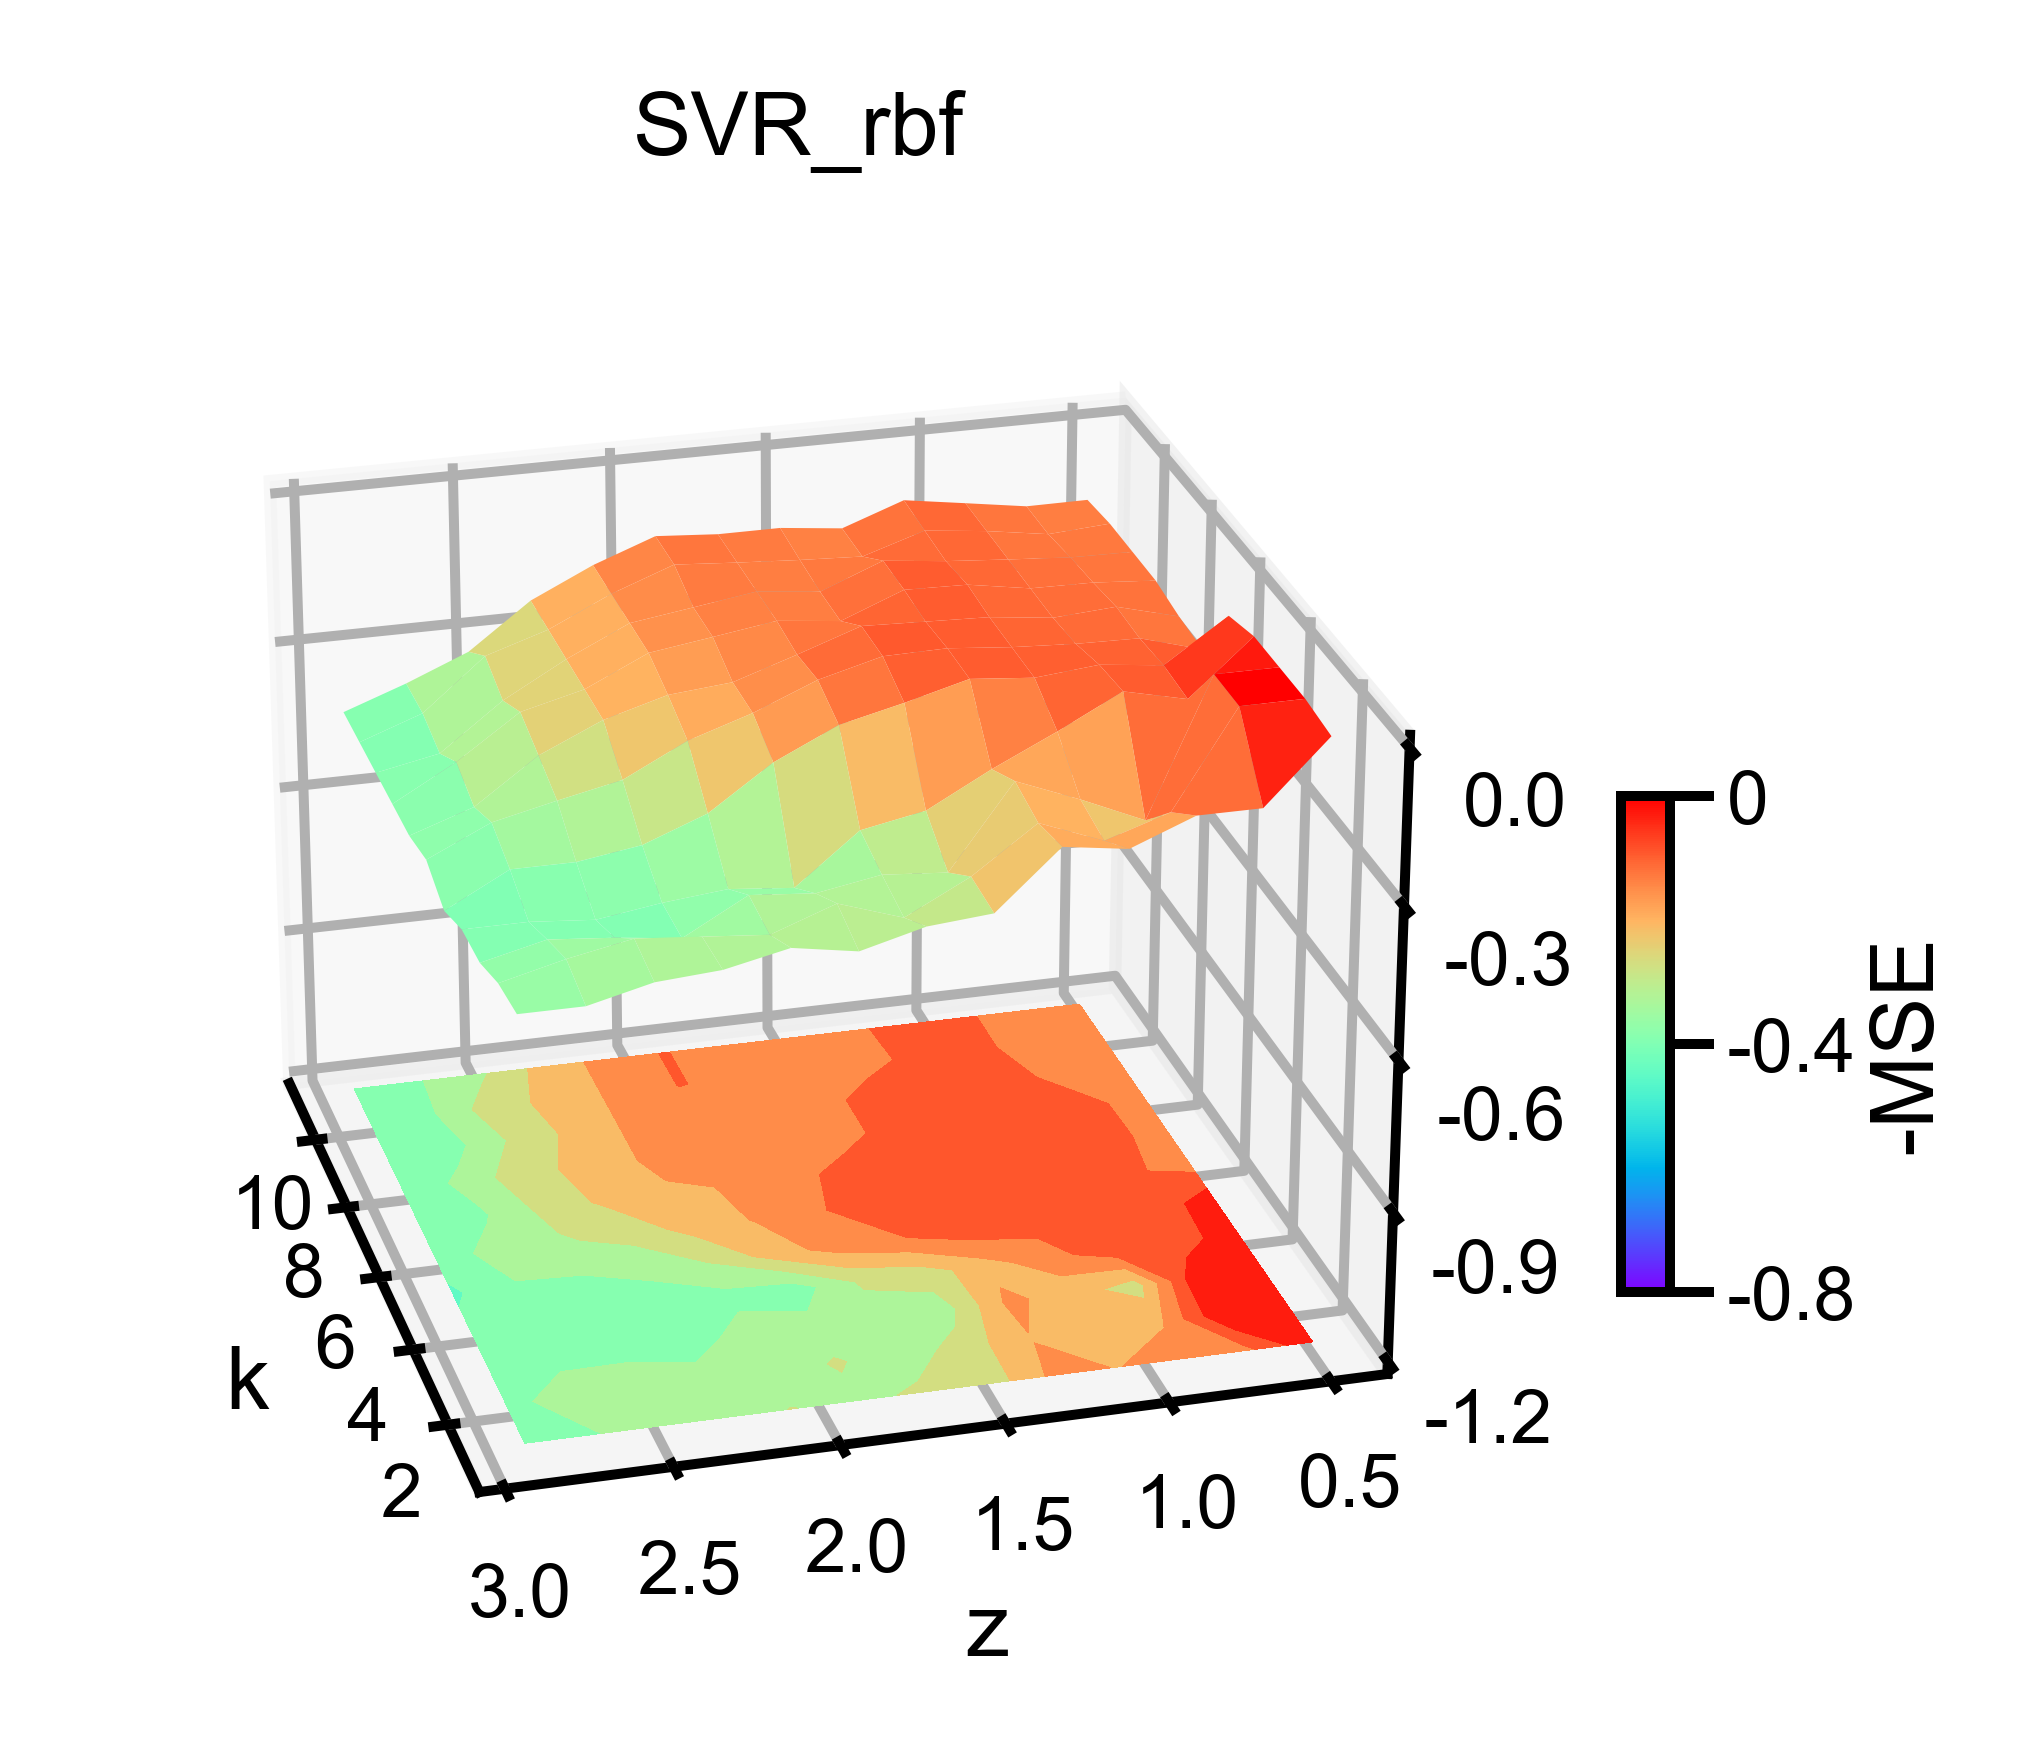

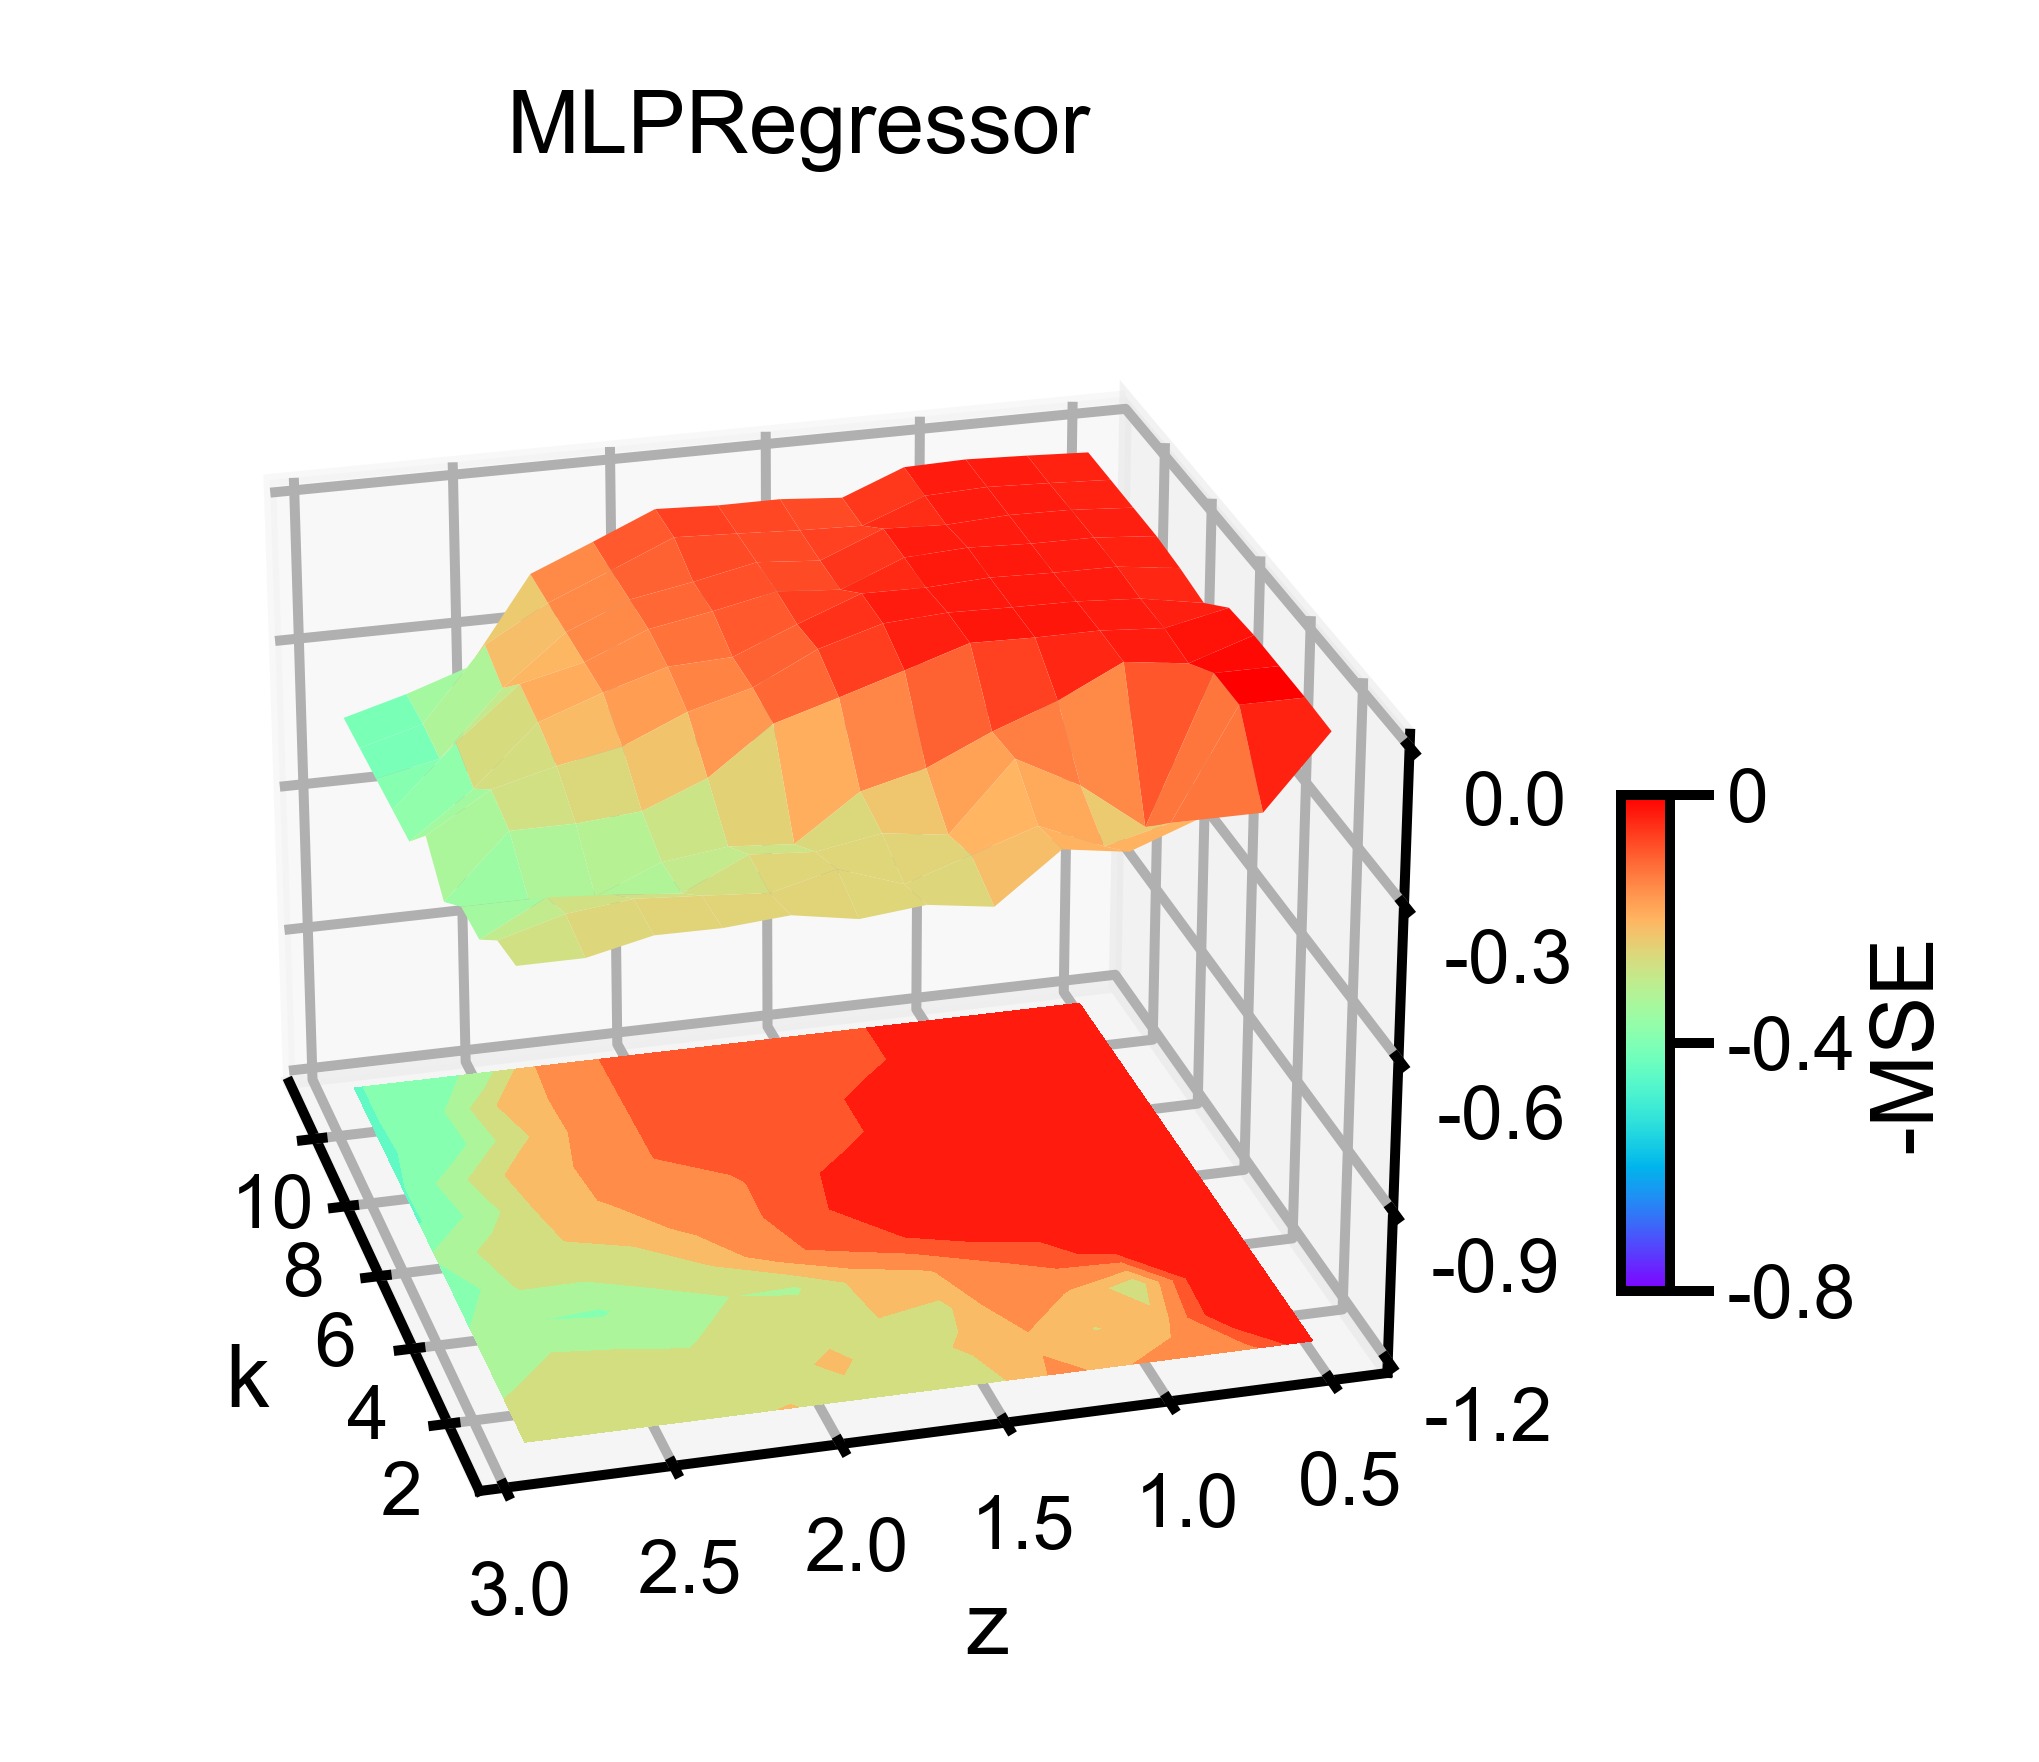

In [28]:
plot.applicability_domain_MSE(model, k_value=np.arange(1, 12, 1), z_value=np.arange(0.5, 3, 0.2))

# AD-equipped models

In [29]:
plot.model_MSE_for_data(model, knn=6, weight=1.6)

Total test data : 42
Unreliable data : 21
Reliable data : 21


Reliable(21)  Unreliable(21)
ElasticNet               0.305626        1.093131
KNeighborsRegressor      0.094621        0.761905
SVR_rbf                  0.091920        0.946498
MLPRegressor             0.029776        1.008775

# AD-equipped models for two test sets

In [30]:
test_data = 'test set 1.xlsx'
data.load_data(test_data, label_col, drop_col, mode='predict')
model.load_predict_data(data=data)
plot.model_MSE_for_data(model, knn=6, weight=1.6)

Number of predicted data set: 25
Number of predicted features: 9


rank_test_neg_mean_squared_error  rank_test_r2  \
4330                                  1             2   
8401                                  1             1   
50874                                 1             1   
62561                                 1             1   

       mean_test_neg_mean_squared_error  mean_test_r2  \
4330                          -0.041717      0.911943   
8401                          -0.022231      0.954084   
50874                         -0.018583      0.962741   
62561                         -0.017133      0.965435   

       std_test_neg_mean_squared_error  std_test_r2            algorithm  \
4330                          0.019439     0.042231           ElasticNet   
8401                          0.028465     0.058532  KNeighborsRegressor   
50874                         0.005925     0.012023              SVR_rbf   
62561                         0.005846     0.013119         MLPRegressor   

                                                  params  \
4330    {'alpha': 0.014551483398731937, 'l1_ratio': 0.2}   
8401           {'n_neighbors': 2, 'weights': 'distance'}   
50874  {'C': 8.531678524172815, 'epsilon': 0.07278953...   
62561  {'activation': 'tanh', 'alpha': 0.0001, 'early...   

       all_mean_squared_error  predict_mean_squared_error  \
4330                 0.034986                    0.242903   
8401                 0.000000                    0.069637   
50874                0.012388                    0.069722   
62561                0.007492                    0.015783   

       predict_mean_squared_error_1  predict_mean_squared_error_2  \
4330                       1.370666                      0.699378   
8401                       0.955654                      0.428263   
50874                      1.180219                      0.519209   
62561                      1.259706                      0.519276   

       predict_mean_squared_error_3  
4330                       0.242903  
8401                       0.069637  
50874                      0.069722  
62561                      0.015783

============= best_model_predict | Time: 0.0h 0.0min 0s ==============

Total test data : 25
Unreliable data : 5
Reliable data : 20


Reliable(20)  Unreliable(5)
ElasticNet               0.287953       0.062704
KNeighborsRegressor      0.087046       0.000000
SVR_rbf                  0.082103       0.020196
MLPRegressor             0.019607       0.000487

In [31]:
test_data = 'test set 2.xlsx'
data.load_data(test_data, label_col, drop_col, mode='predict')
model.load_predict_data(data=data)
plot.model_MSE_for_data(model, knn=6, weight=1.6)

Number of predicted data set: 17
Number of predicted features: 9


rank_test_neg_mean_squared_error  rank_test_r2  \
4330                                  1             2   
8401                                  1             1   
50874                                 1             1   
62561                                 1             1   

       mean_test_neg_mean_squared_error  mean_test_r2  \
4330                          -0.041717      0.911943   
8401                          -0.022231      0.954084   
50874                         -0.018583      0.962741   
62561                         -0.017133      0.965435   

       std_test_neg_mean_squared_error  std_test_r2            algorithm  \
4330                          0.019439     0.042231           ElasticNet   
8401                          0.028465     0.058532  KNeighborsRegressor   
50874                         0.005925     0.012023              SVR_rbf   
62561                         0.005846     0.013119         MLPRegressor   

                                                  params  \
4330    {'alpha': 0.014551483398731937, 'l1_ratio': 0.2}   
8401           {'n_neighbors': 2, 'weights': 'distance'}   
50874  {'C': 8.531678524172815, 'epsilon': 0.07278953...   
62561  {'activation': 'tanh', 'alpha': 0.0001, 'early...   

       all_mean_squared_error  predict_mean_squared_error  \
4330                 0.034986                    0.242903   
8401                 0.000000                    0.069637   
50874                0.012388                    0.069722   
62561                0.007492                    0.015783   

       predict_mean_squared_error_1  predict_mean_squared_error_2  \
4330                       1.370666                      0.699378   
8401                       0.955654                      0.428263   
50874                      1.180219                      0.519209   
62561                      1.259706                      0.519276   

       predict_mean_squared_error_3  predict_mean_squared_error_4  
4330                       0.242903                      1.370666  
8401                       0.069637                      0.955654  
50874                      0.069722                      1.180219  
62561                      0.015783                      1.259706

============= best_model_predict | Time: 0.0h 0.0min 0s ==============

Total test data : 17
Unreliable data : 16
Reliable data : 1


Reliable(1)  Unreliable(16)
ElasticNet              0.659103        1.415139
KNeighborsRegressor     0.246124        1.000000
SVR_rbf                 0.288252        1.235967
MLPRegressor            0.233169        1.323865

# coefficient analysis

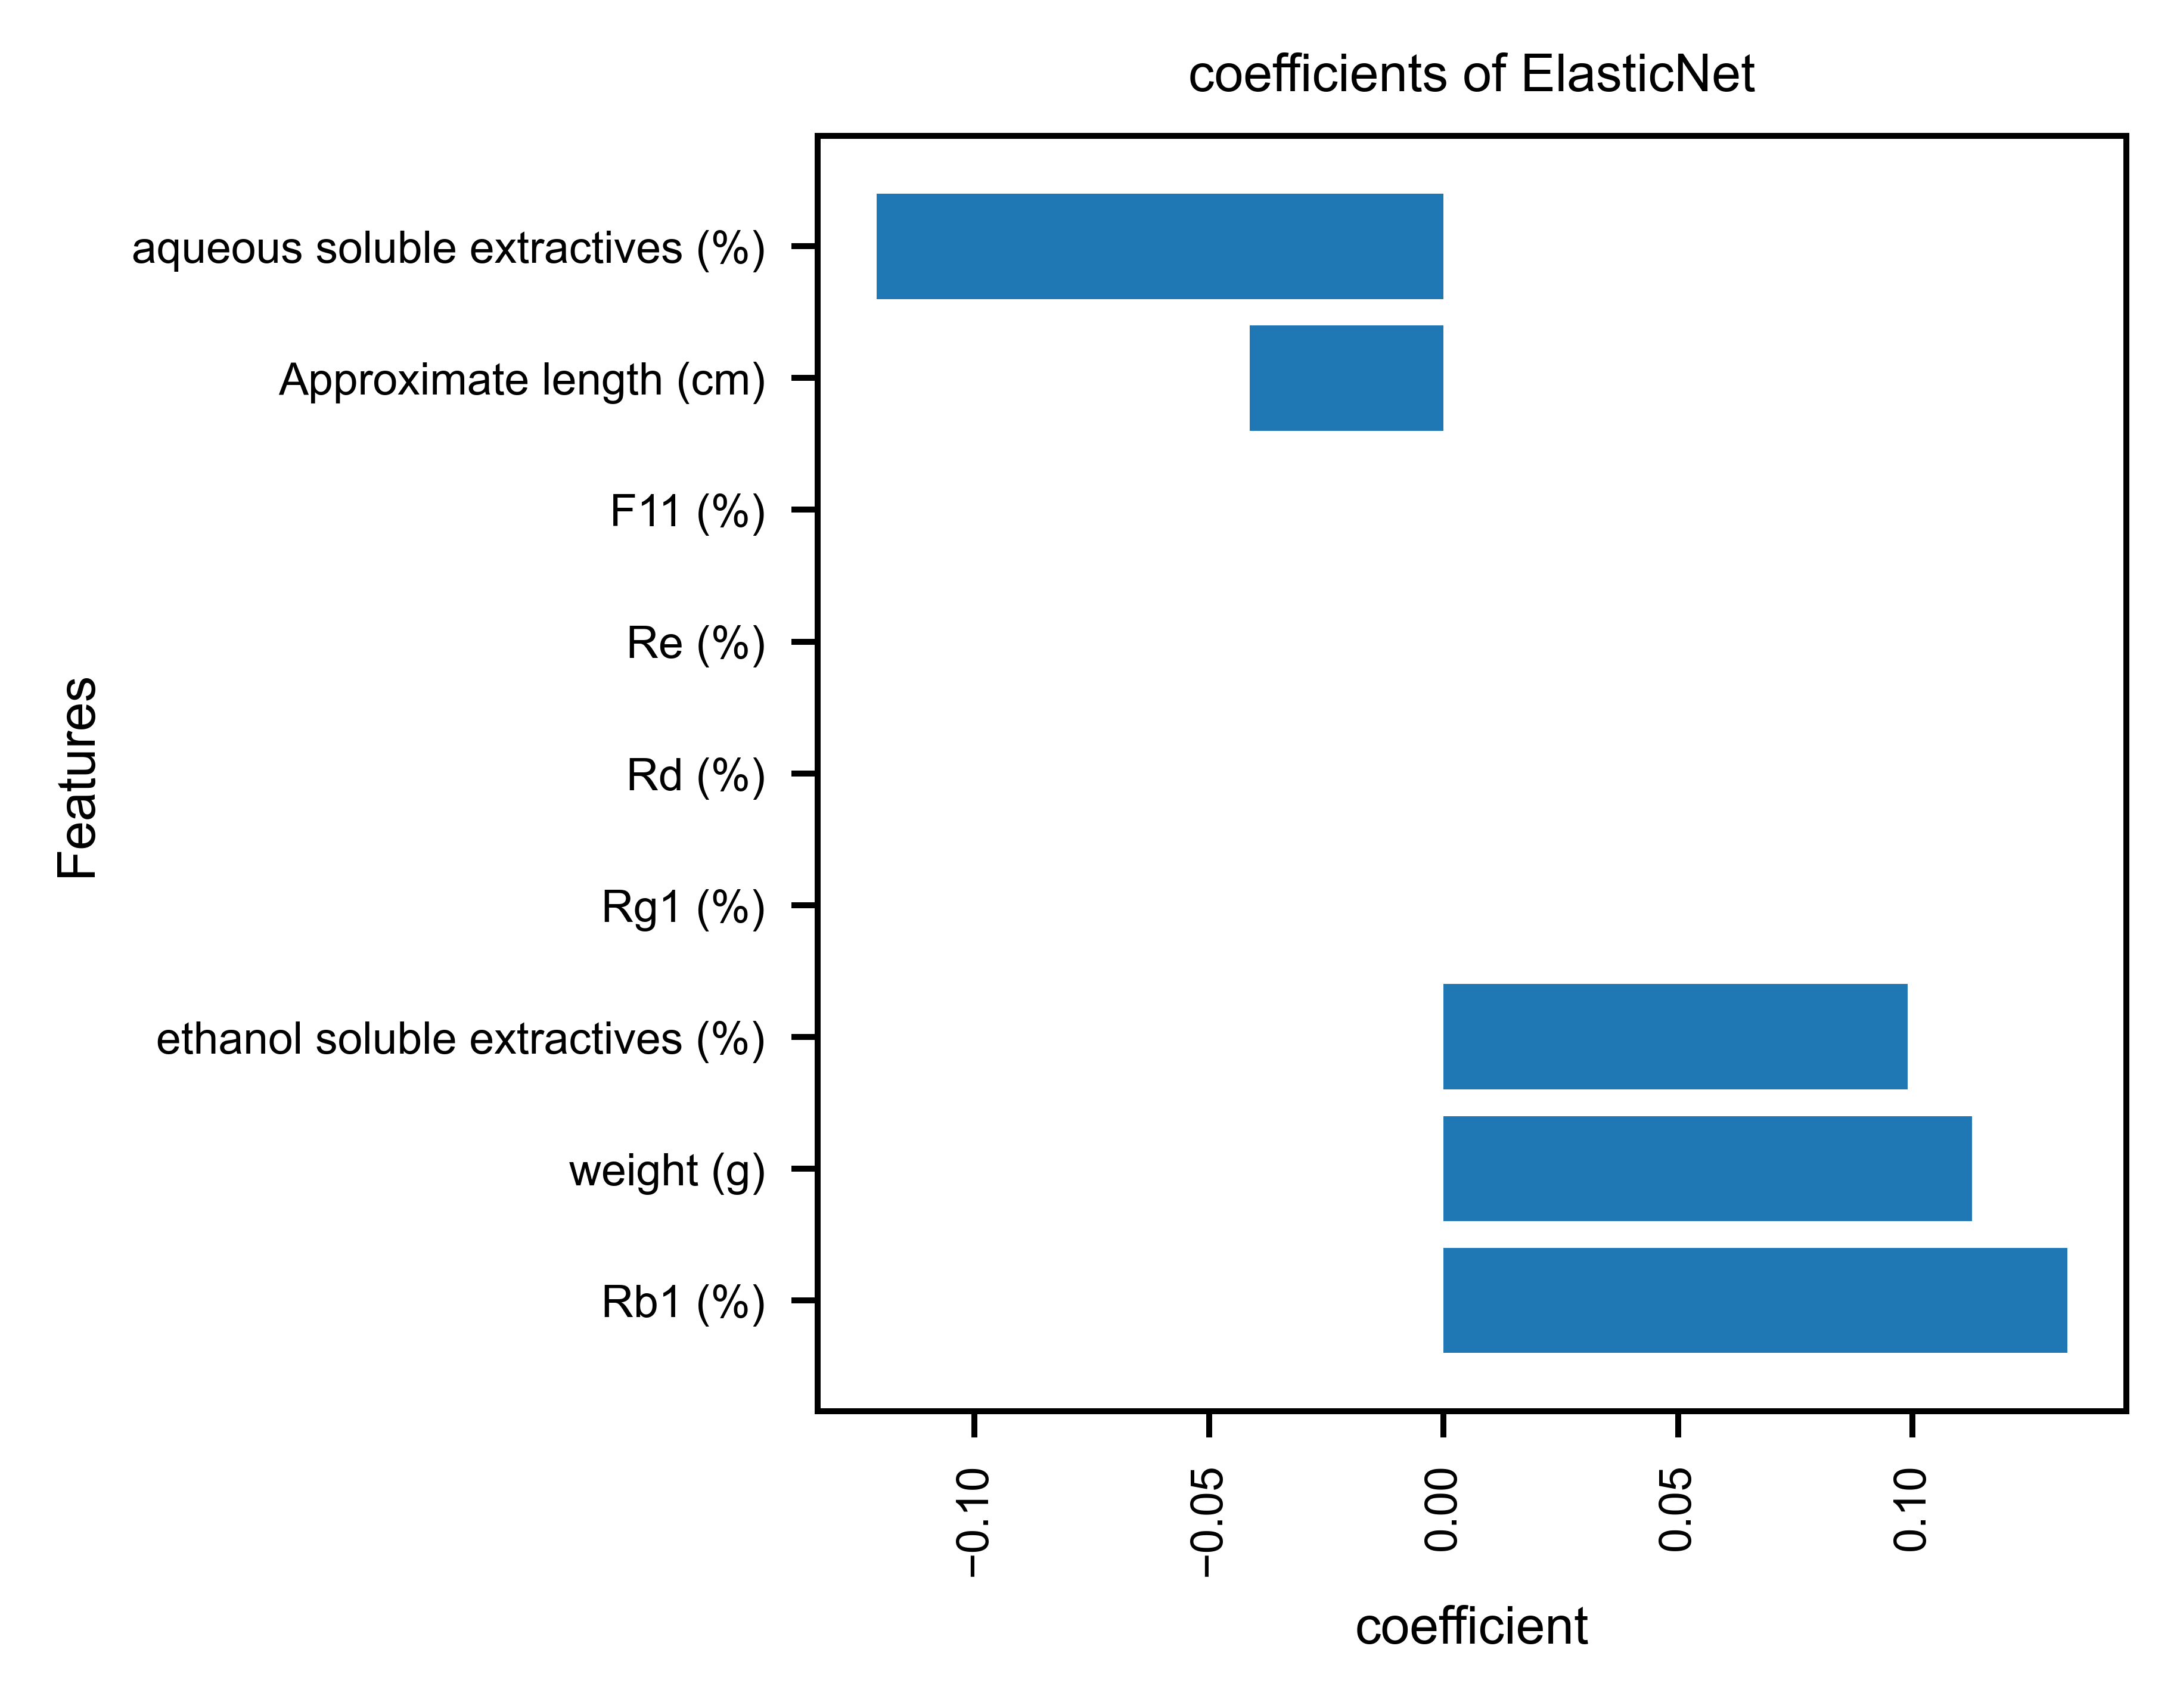

In [32]:
plot.plot_setting(figsize=None, x_label='',y_label='Features')
plot.plot_feature_importance_from_model(model,)

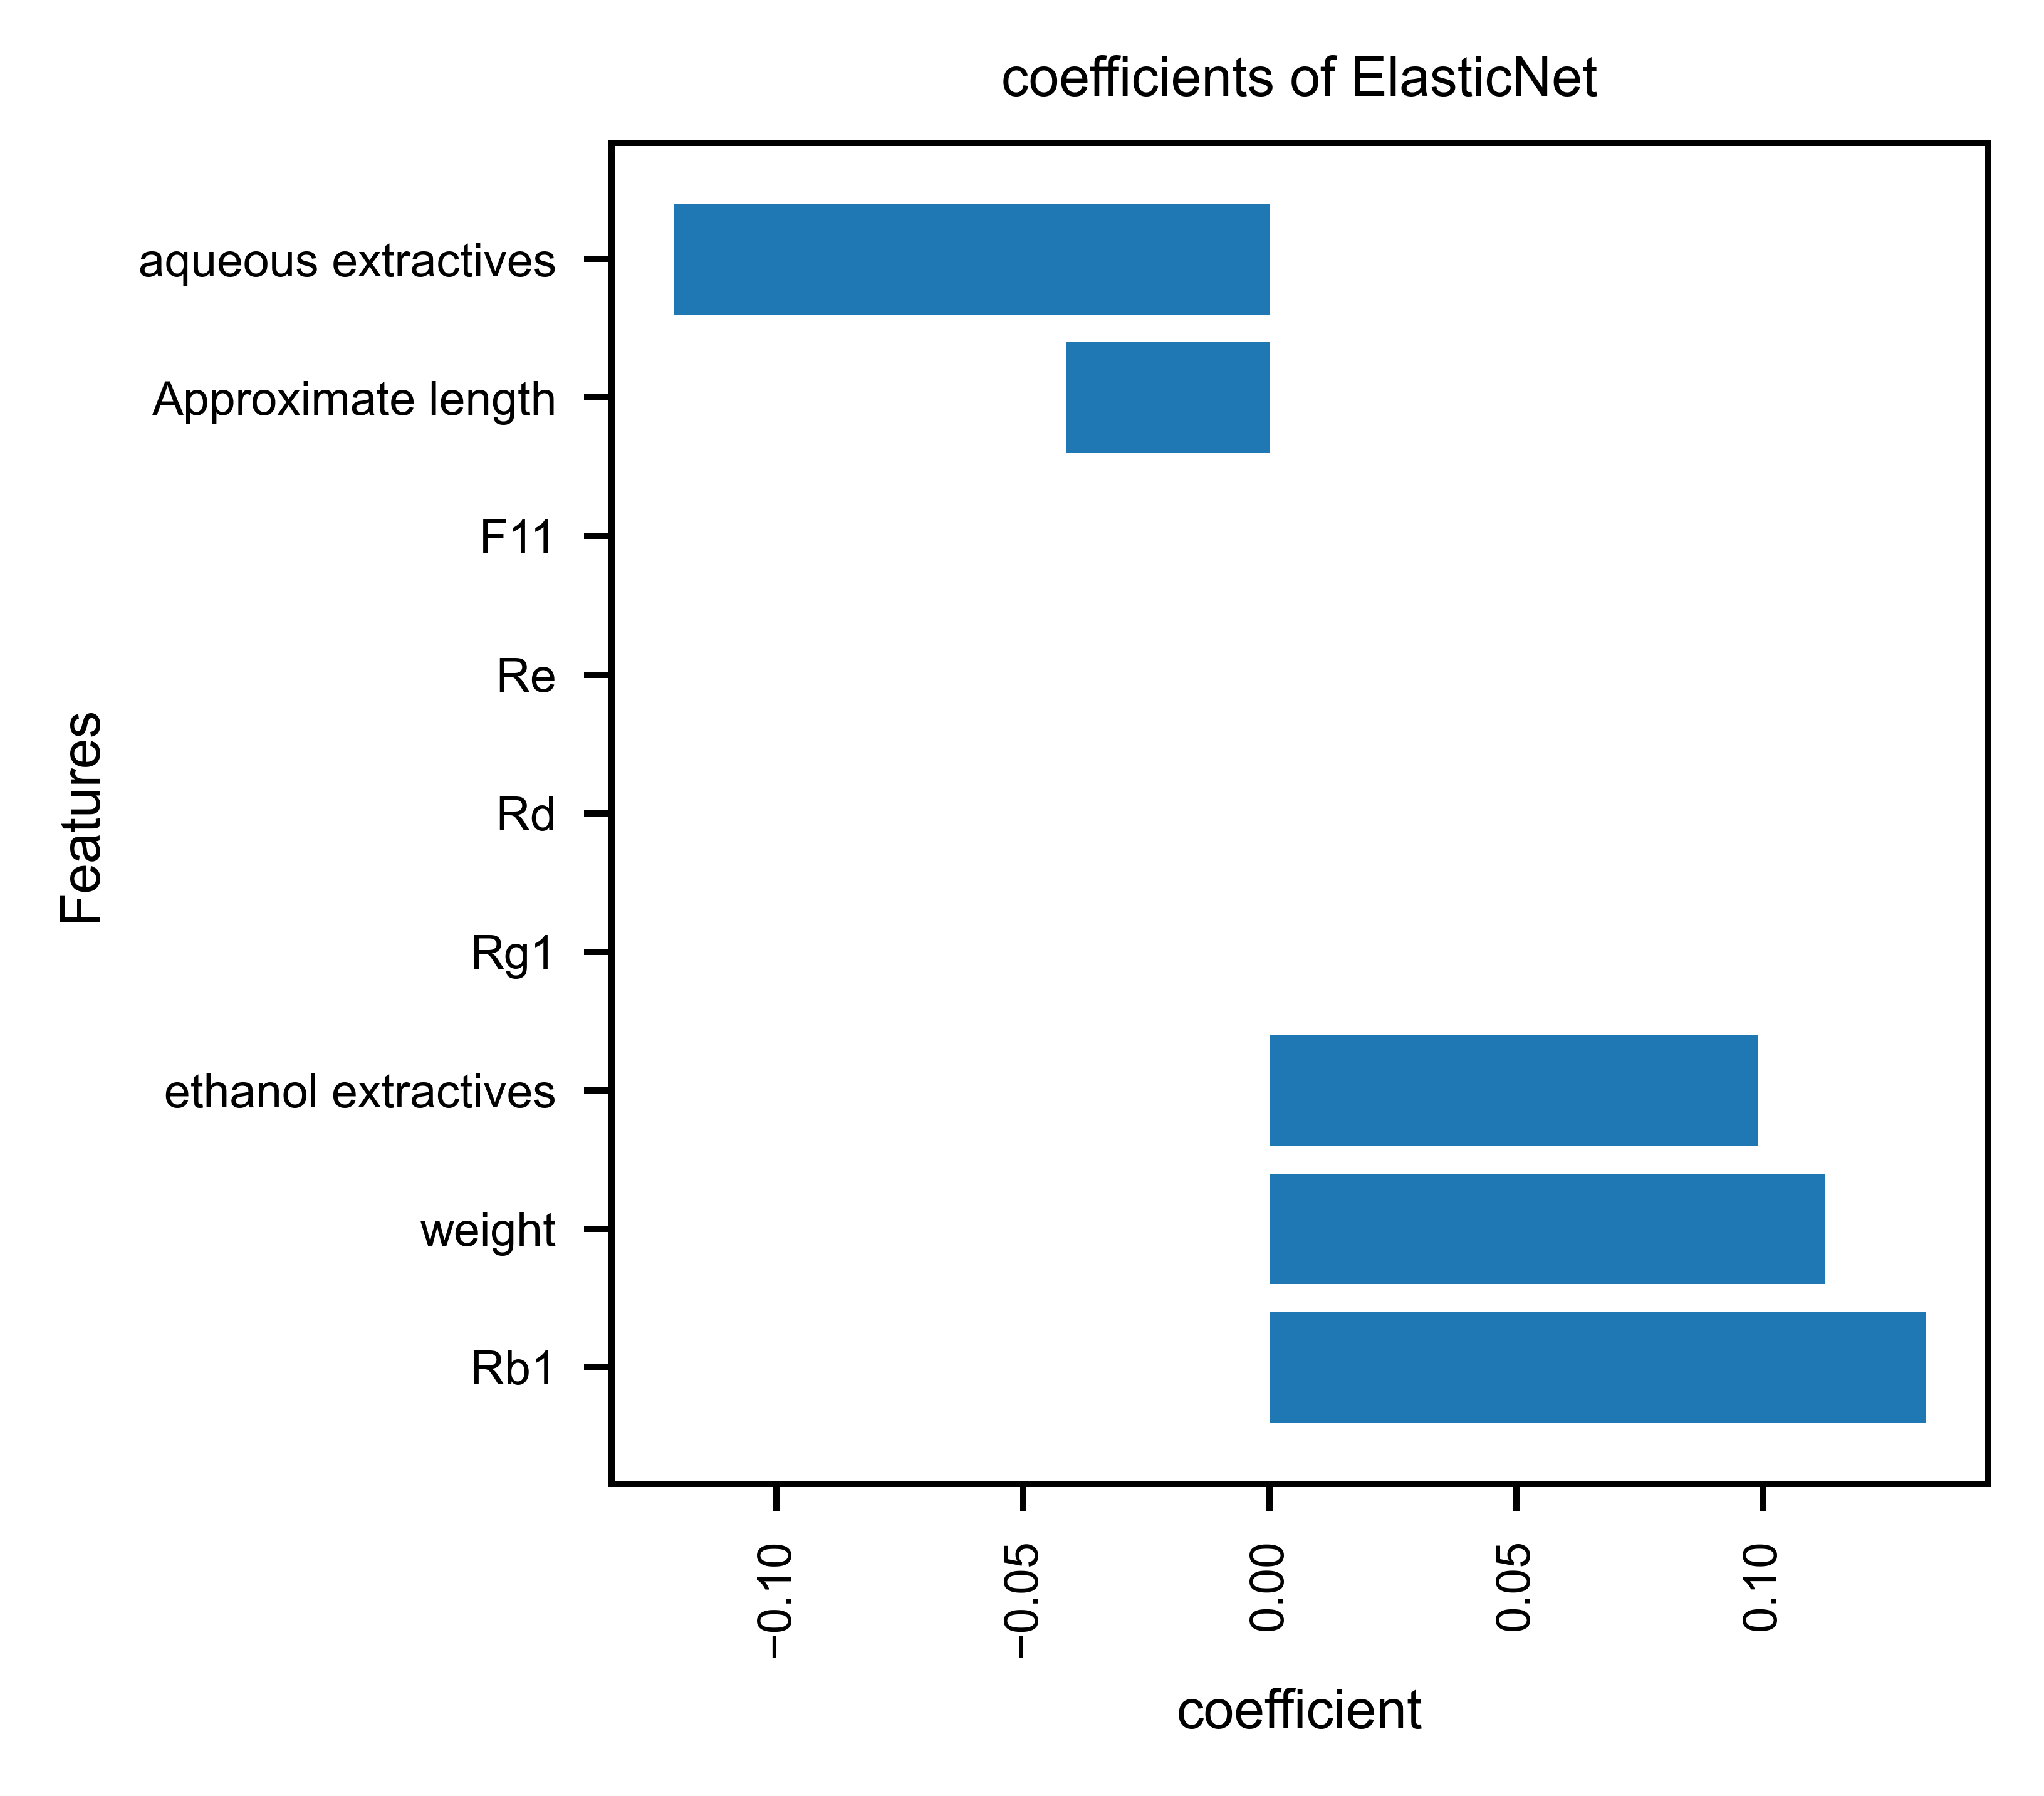

In [33]:
import pickle
est = pickle.loads(model.best_df.loc[4330, 'estimator'])
estimator = est
x_columns = ['Approximate length', 'weight', 'ethanol extractives', 'aqueous extractives', 'Rg1', ' Rd', ' Re', ' Rb1', 'F11']
model_name = 'ElasticNet'
plot.plot_feature_importance(estimator, x_columns, orient='h', save=True, model_name=model_name)

# permutation importance analysis

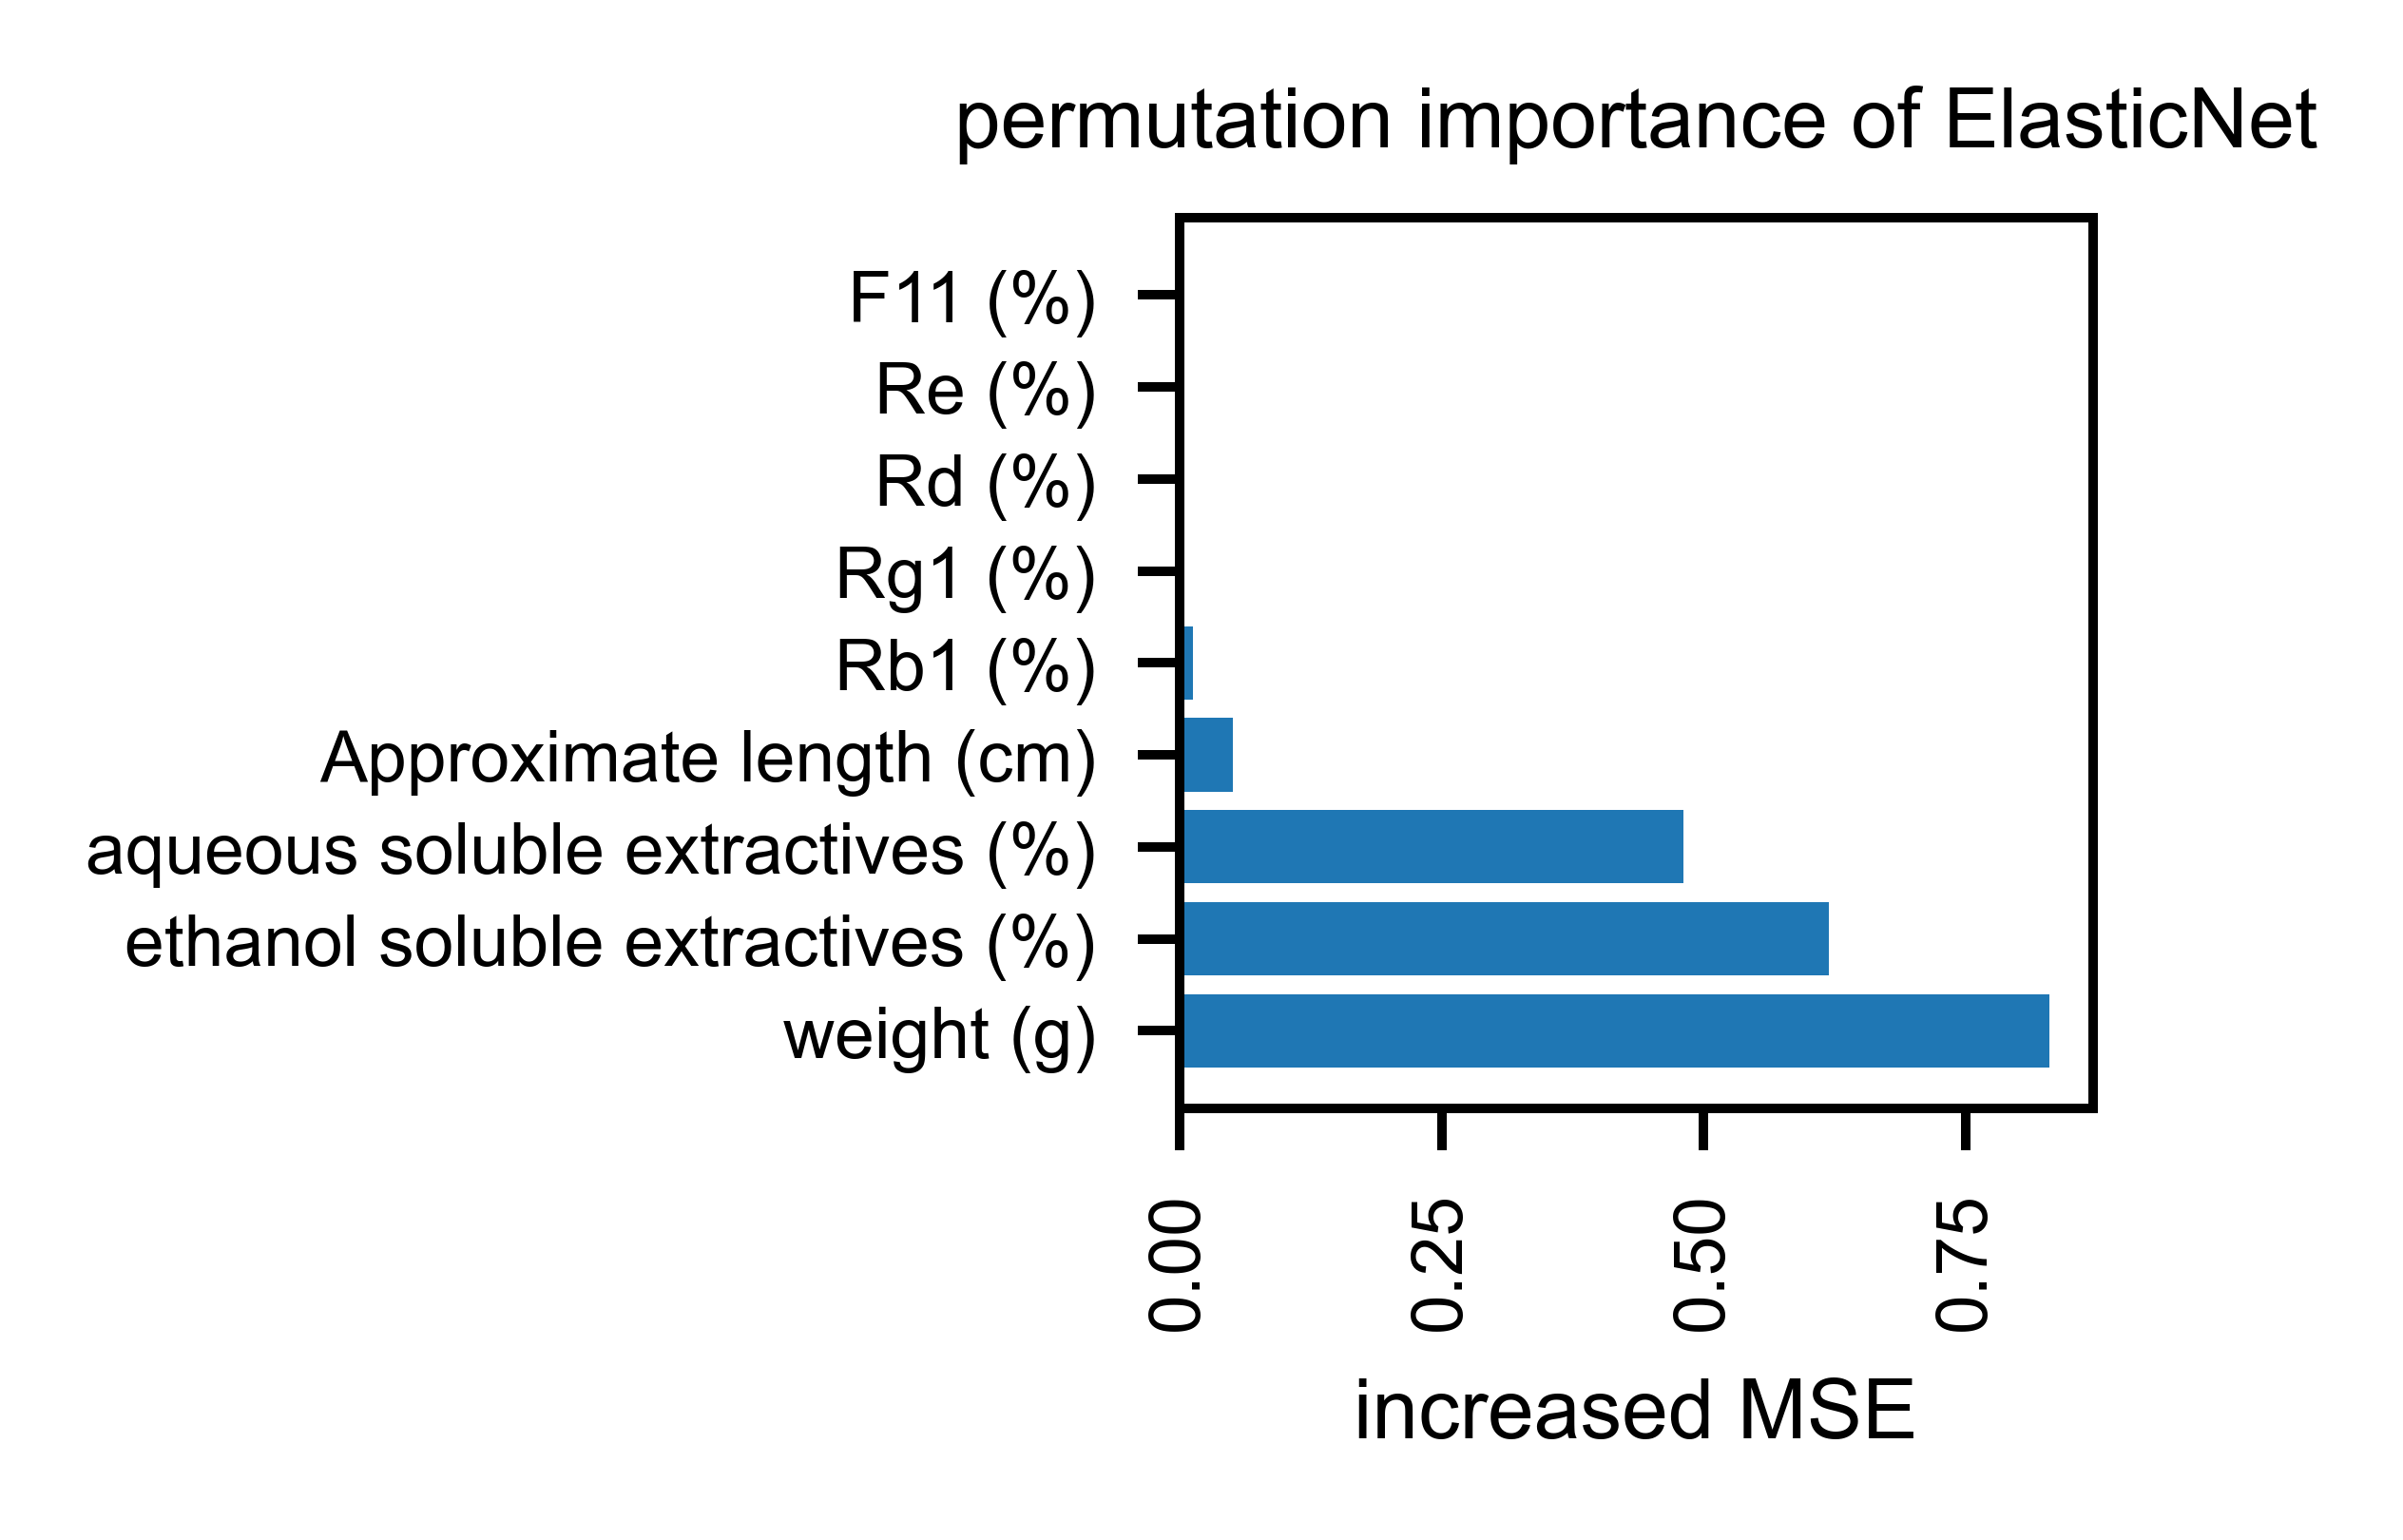

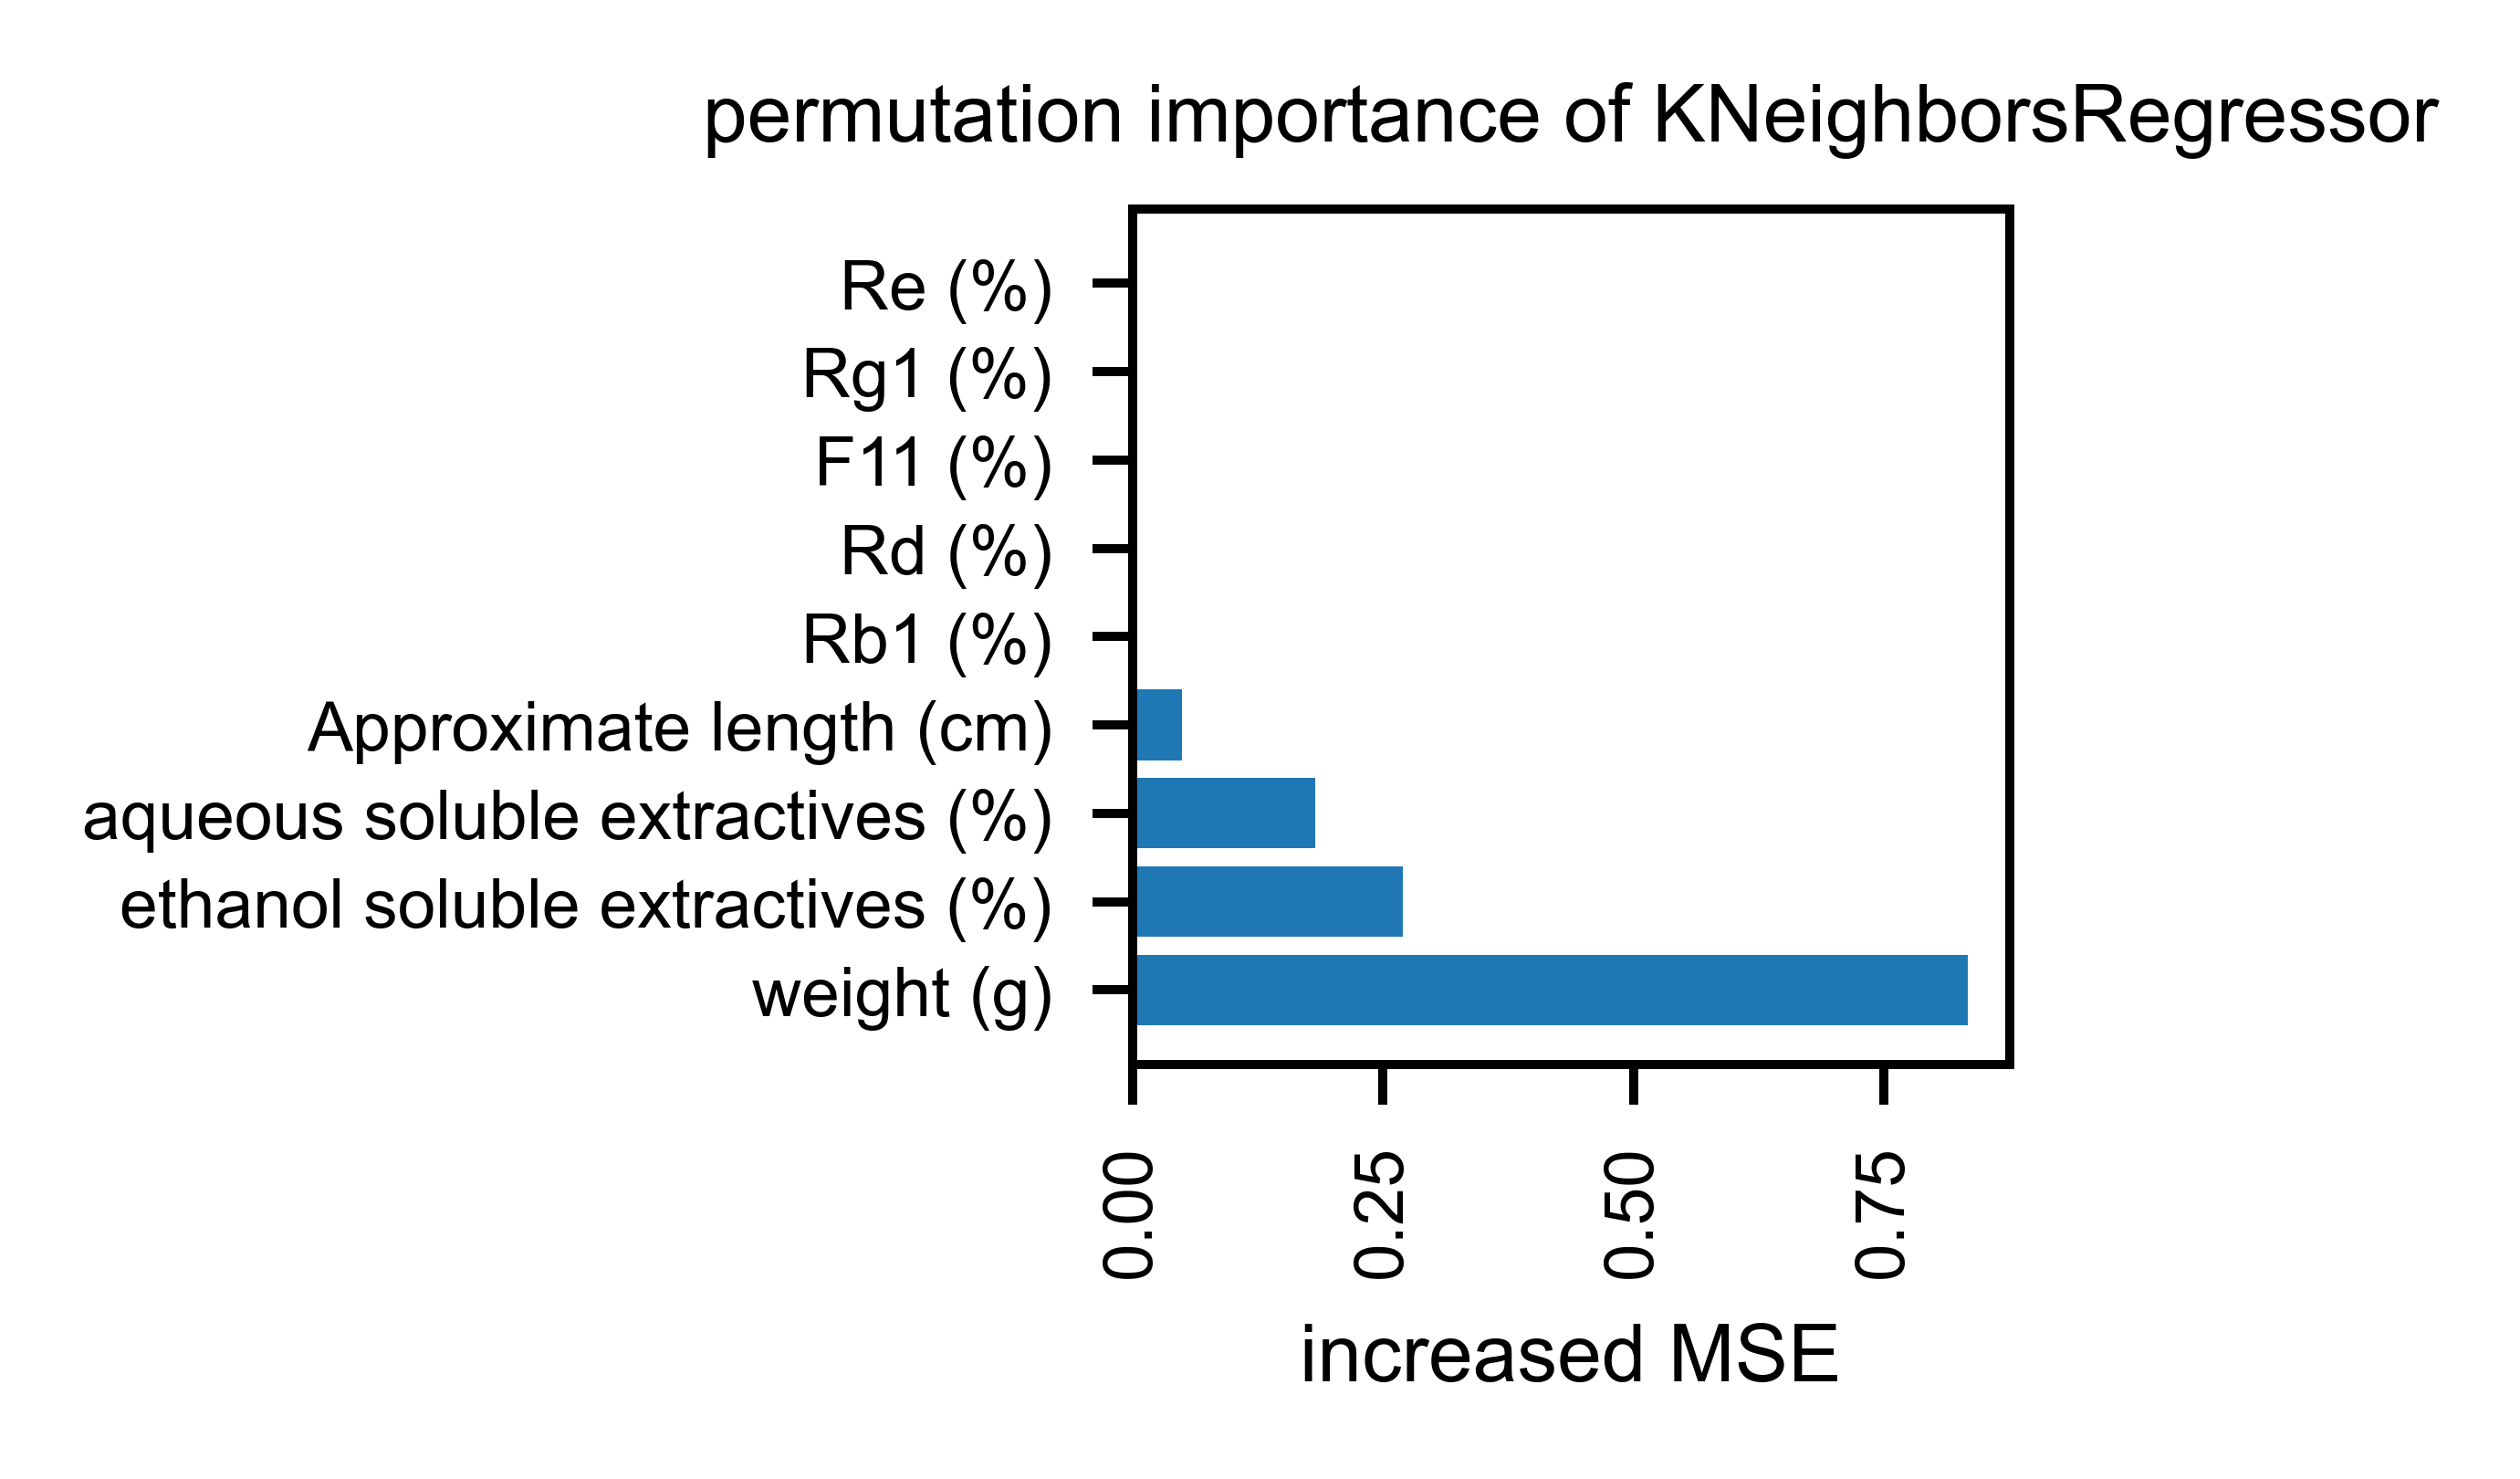

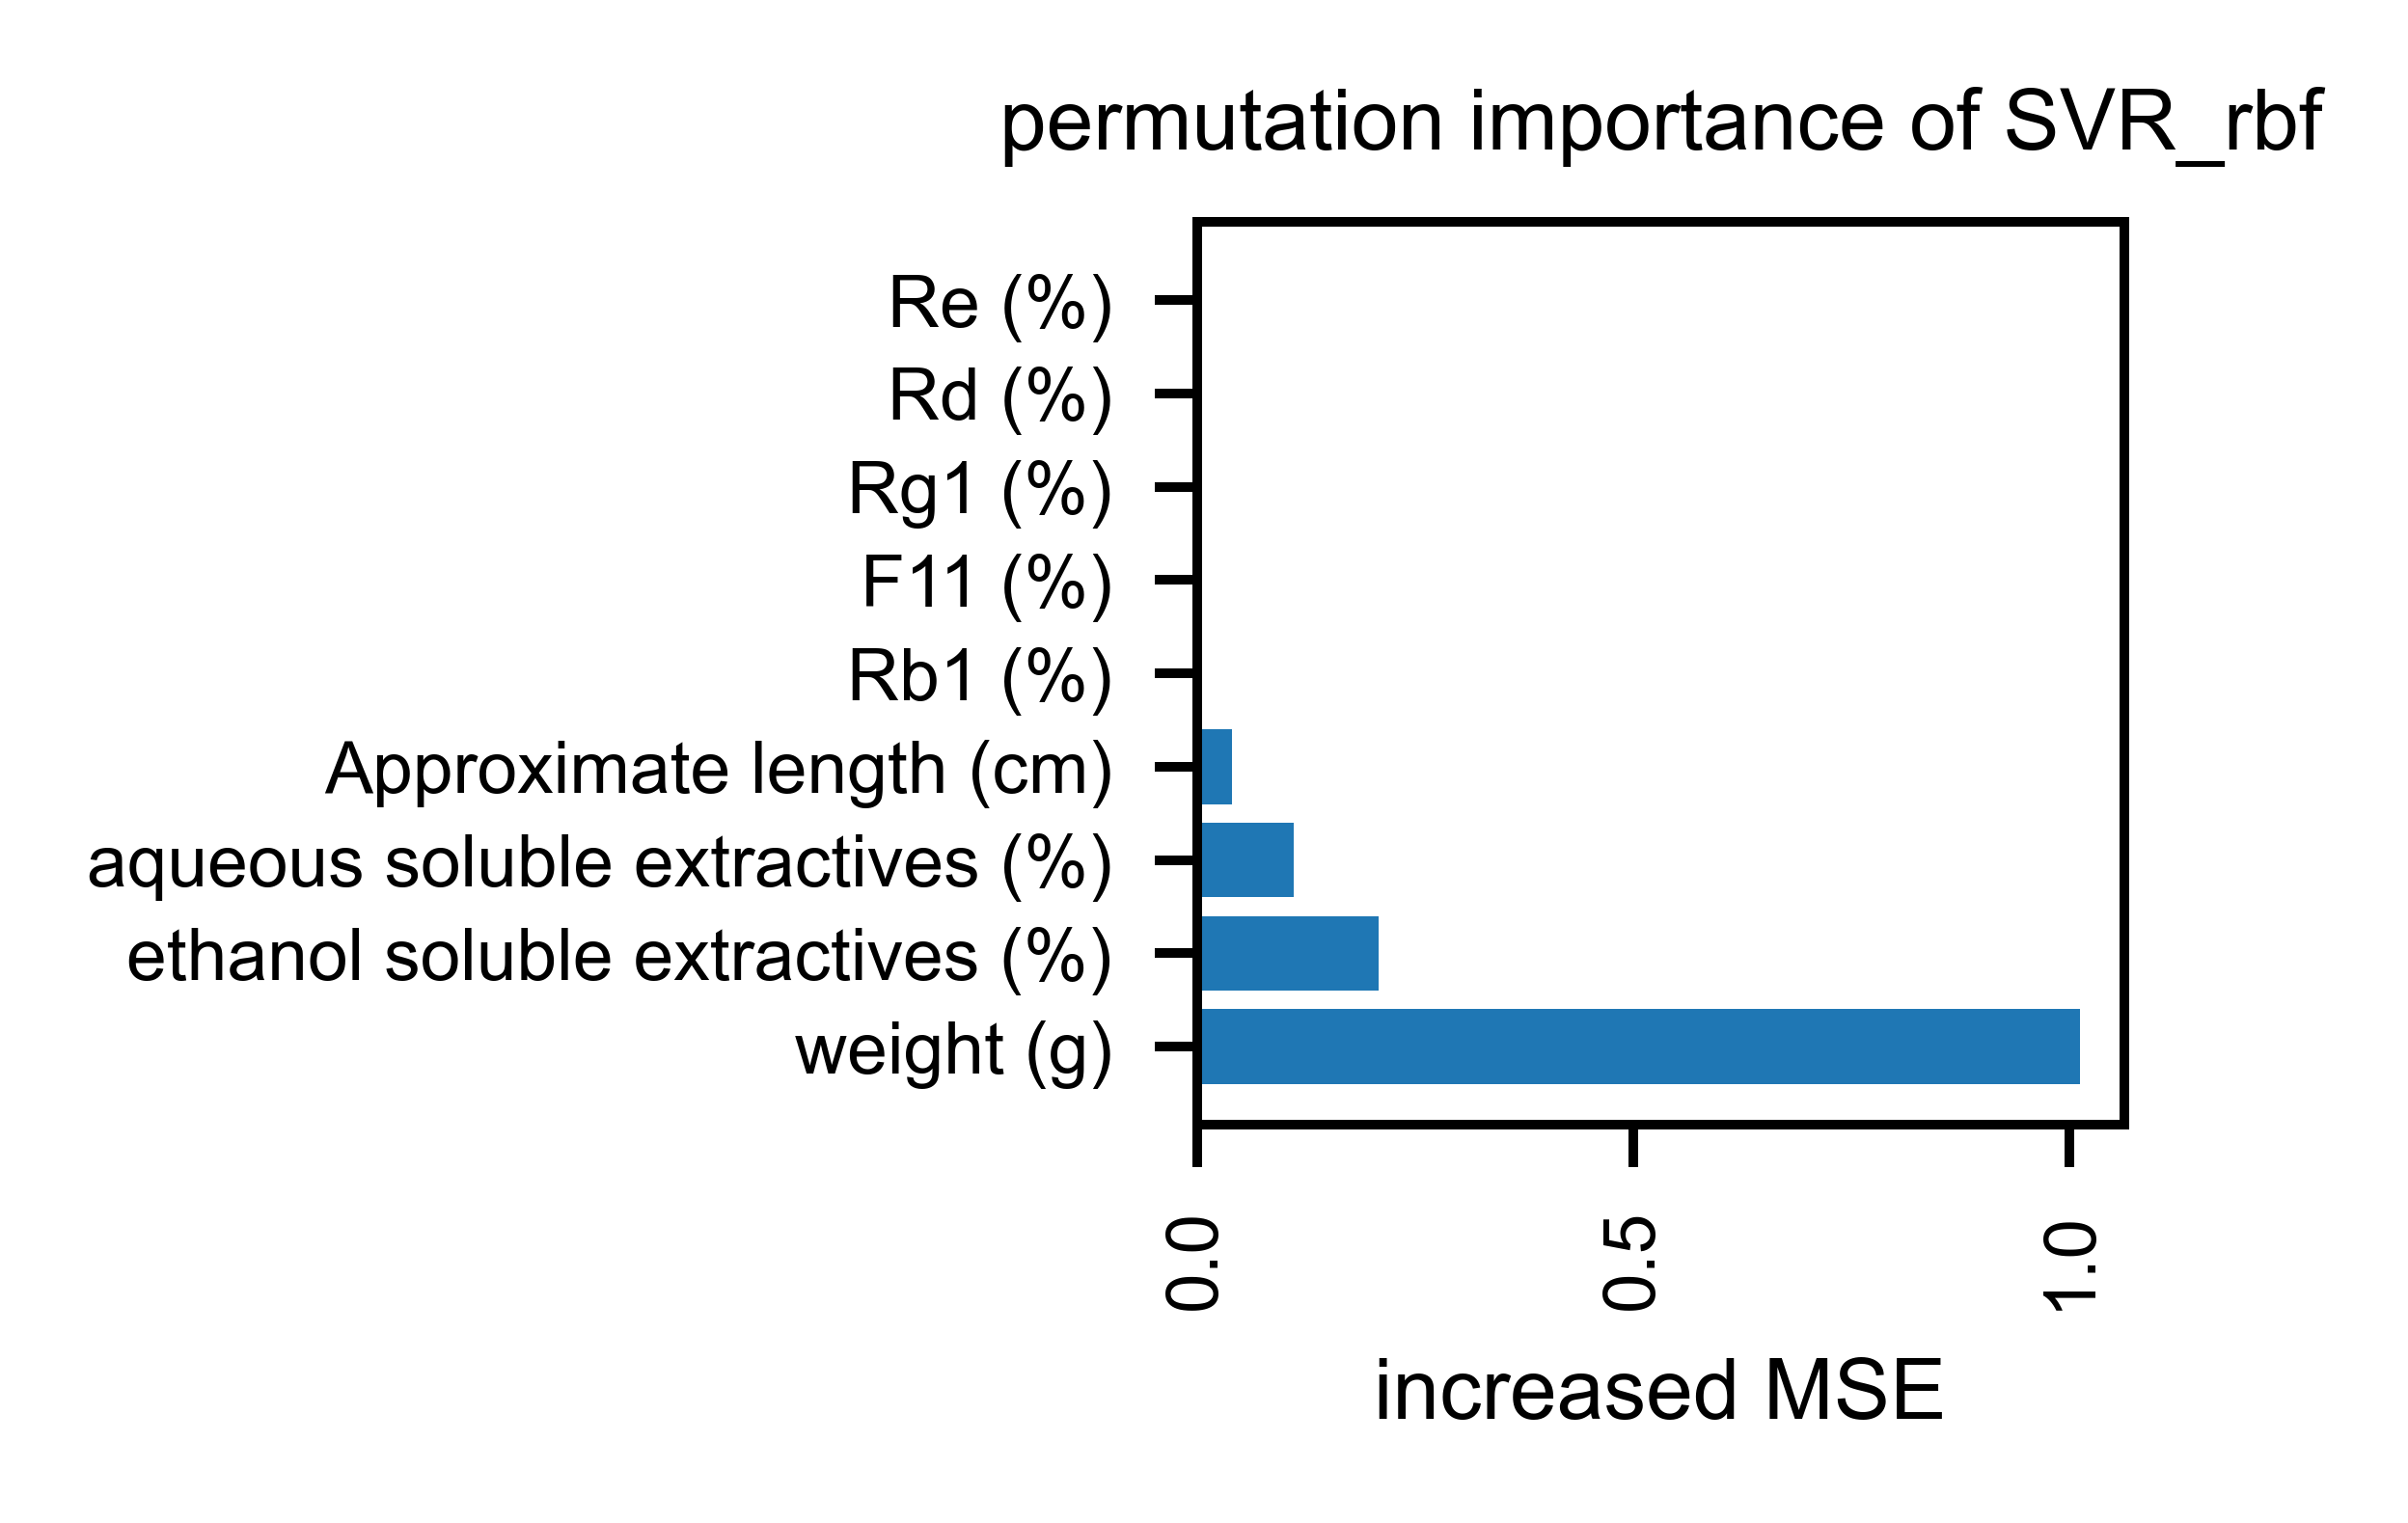

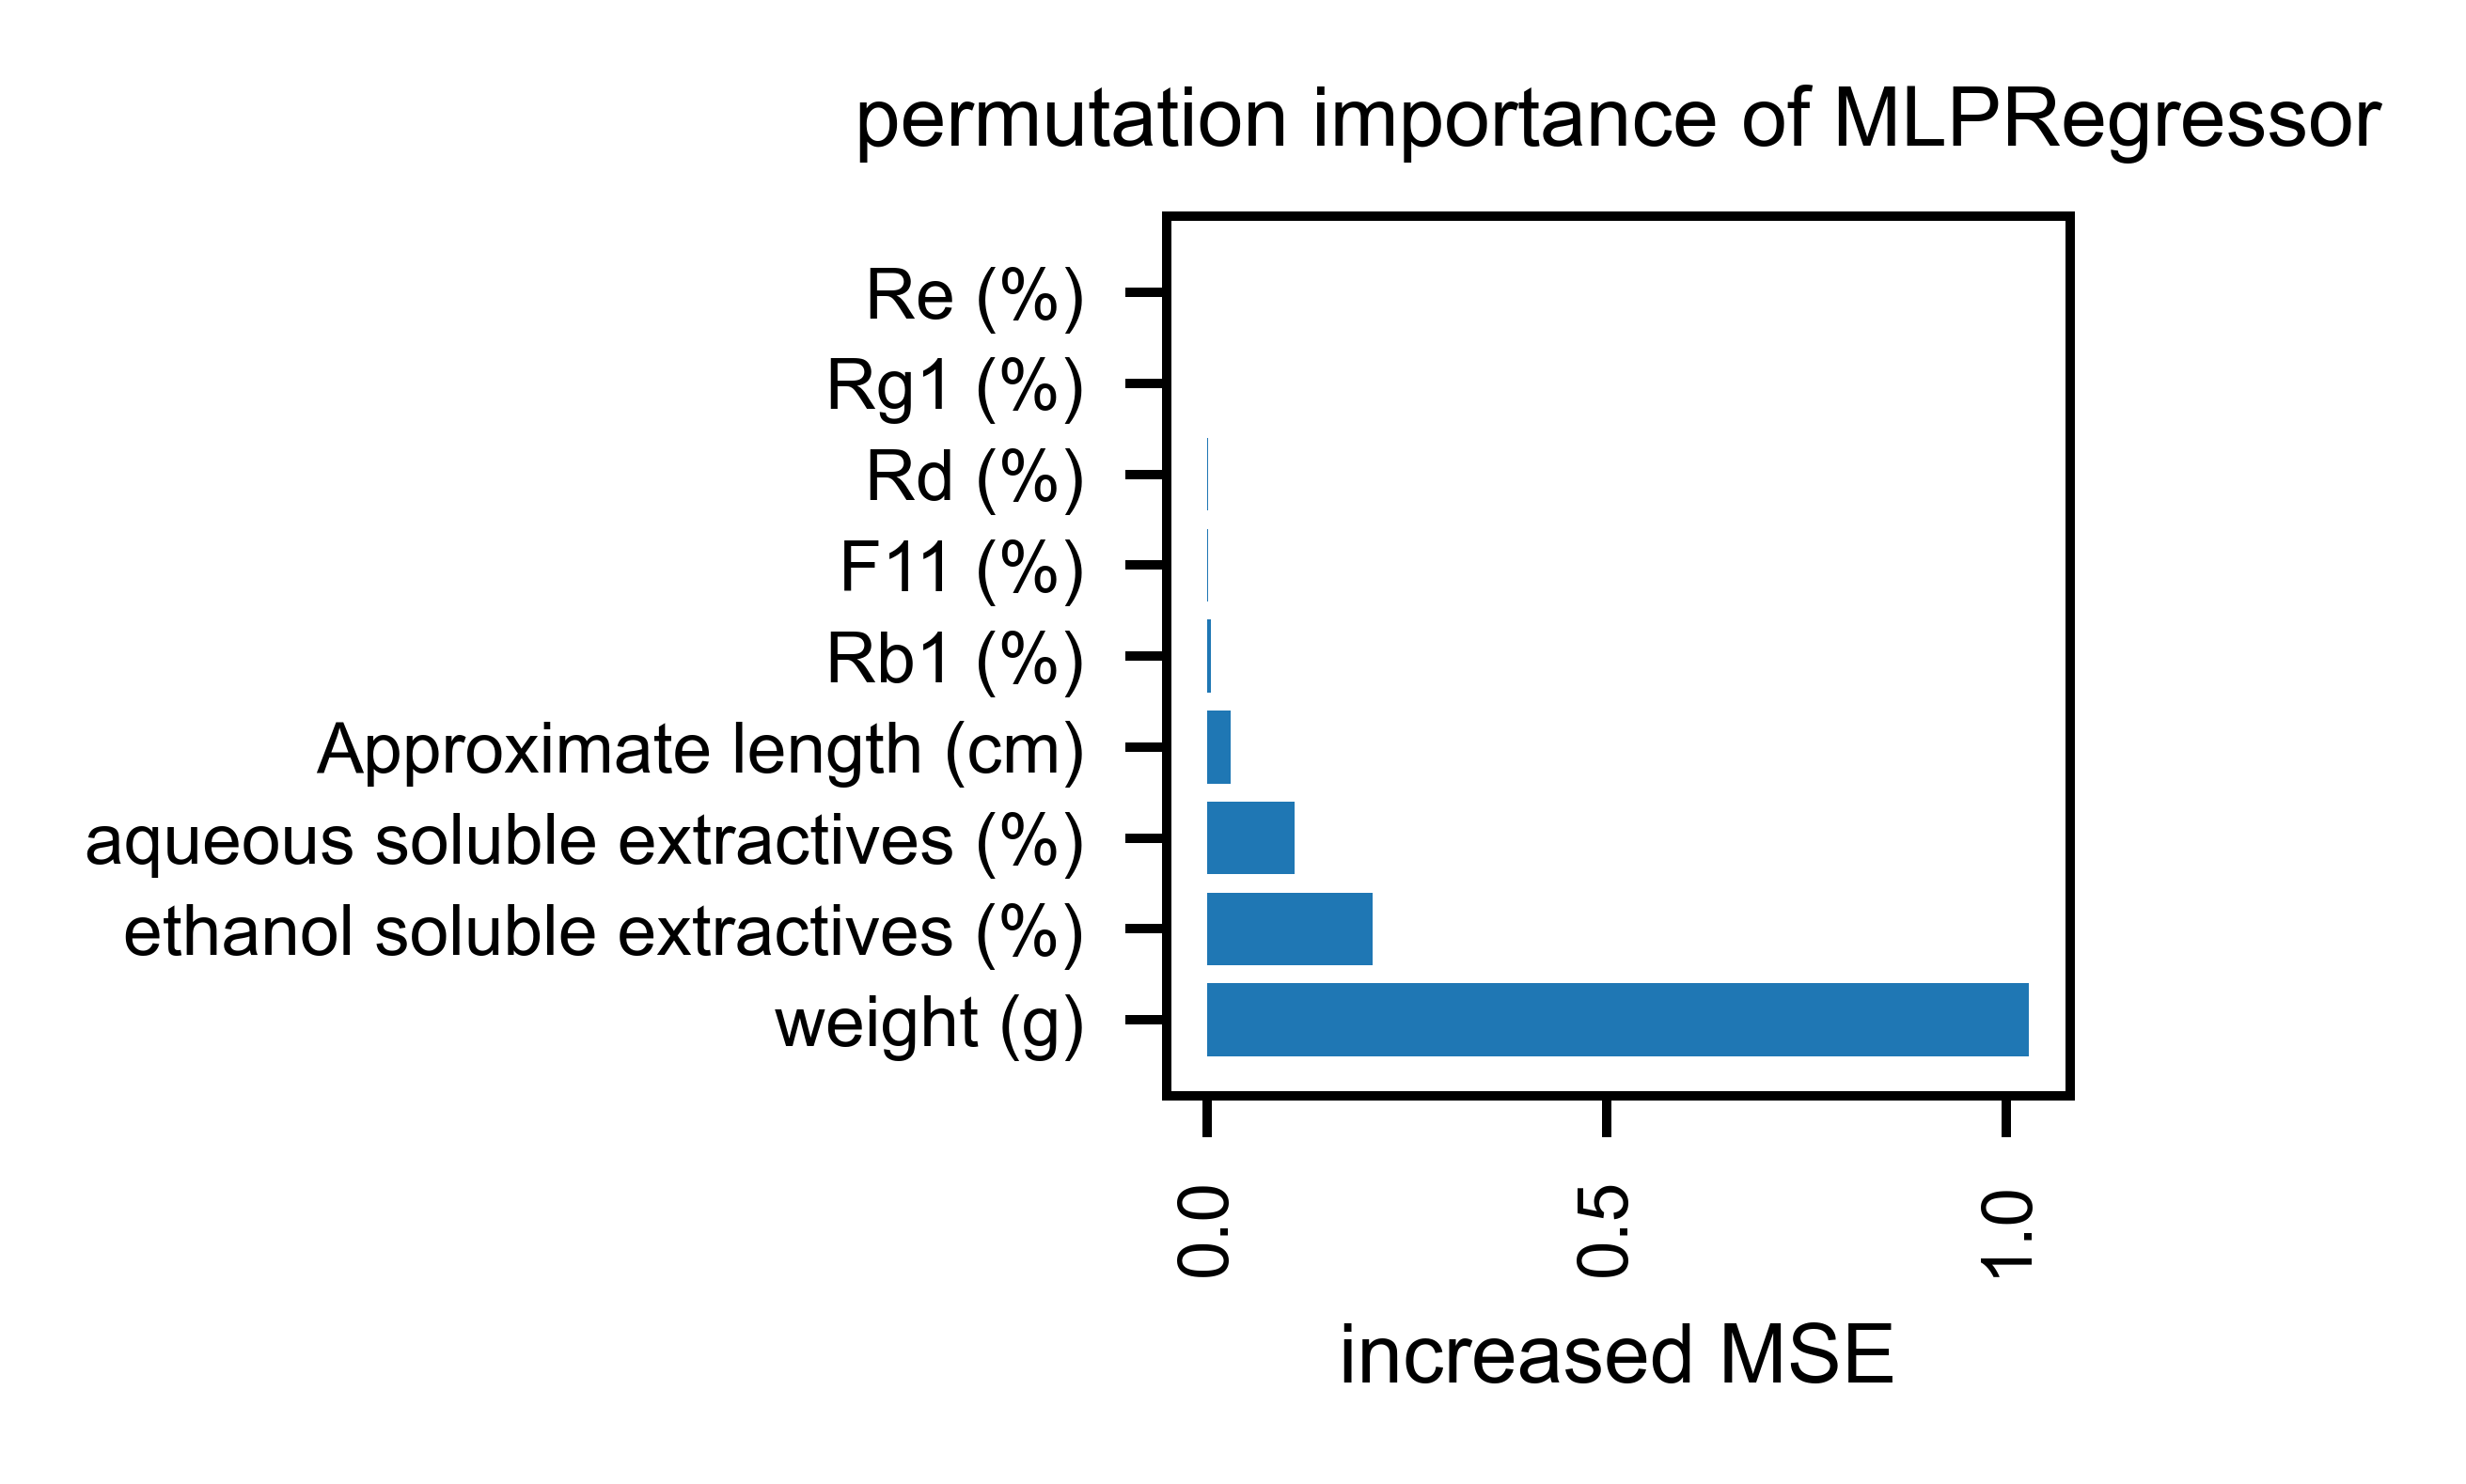

In [34]:
plot.plot_setting(figsize=(3.5/2.54, 3.5/2.54))
plot.plot_permutation_importance_from_model(model, save=True, algorithm='all', x_label='increased MSE')

In [35]:
model.df_x_columns = ['Approximate length', 'weight', 'ethanol extractives', 'aqueous extractives', 'Rg1', ' Rd', ' Re', ' Rb1', 'F11']

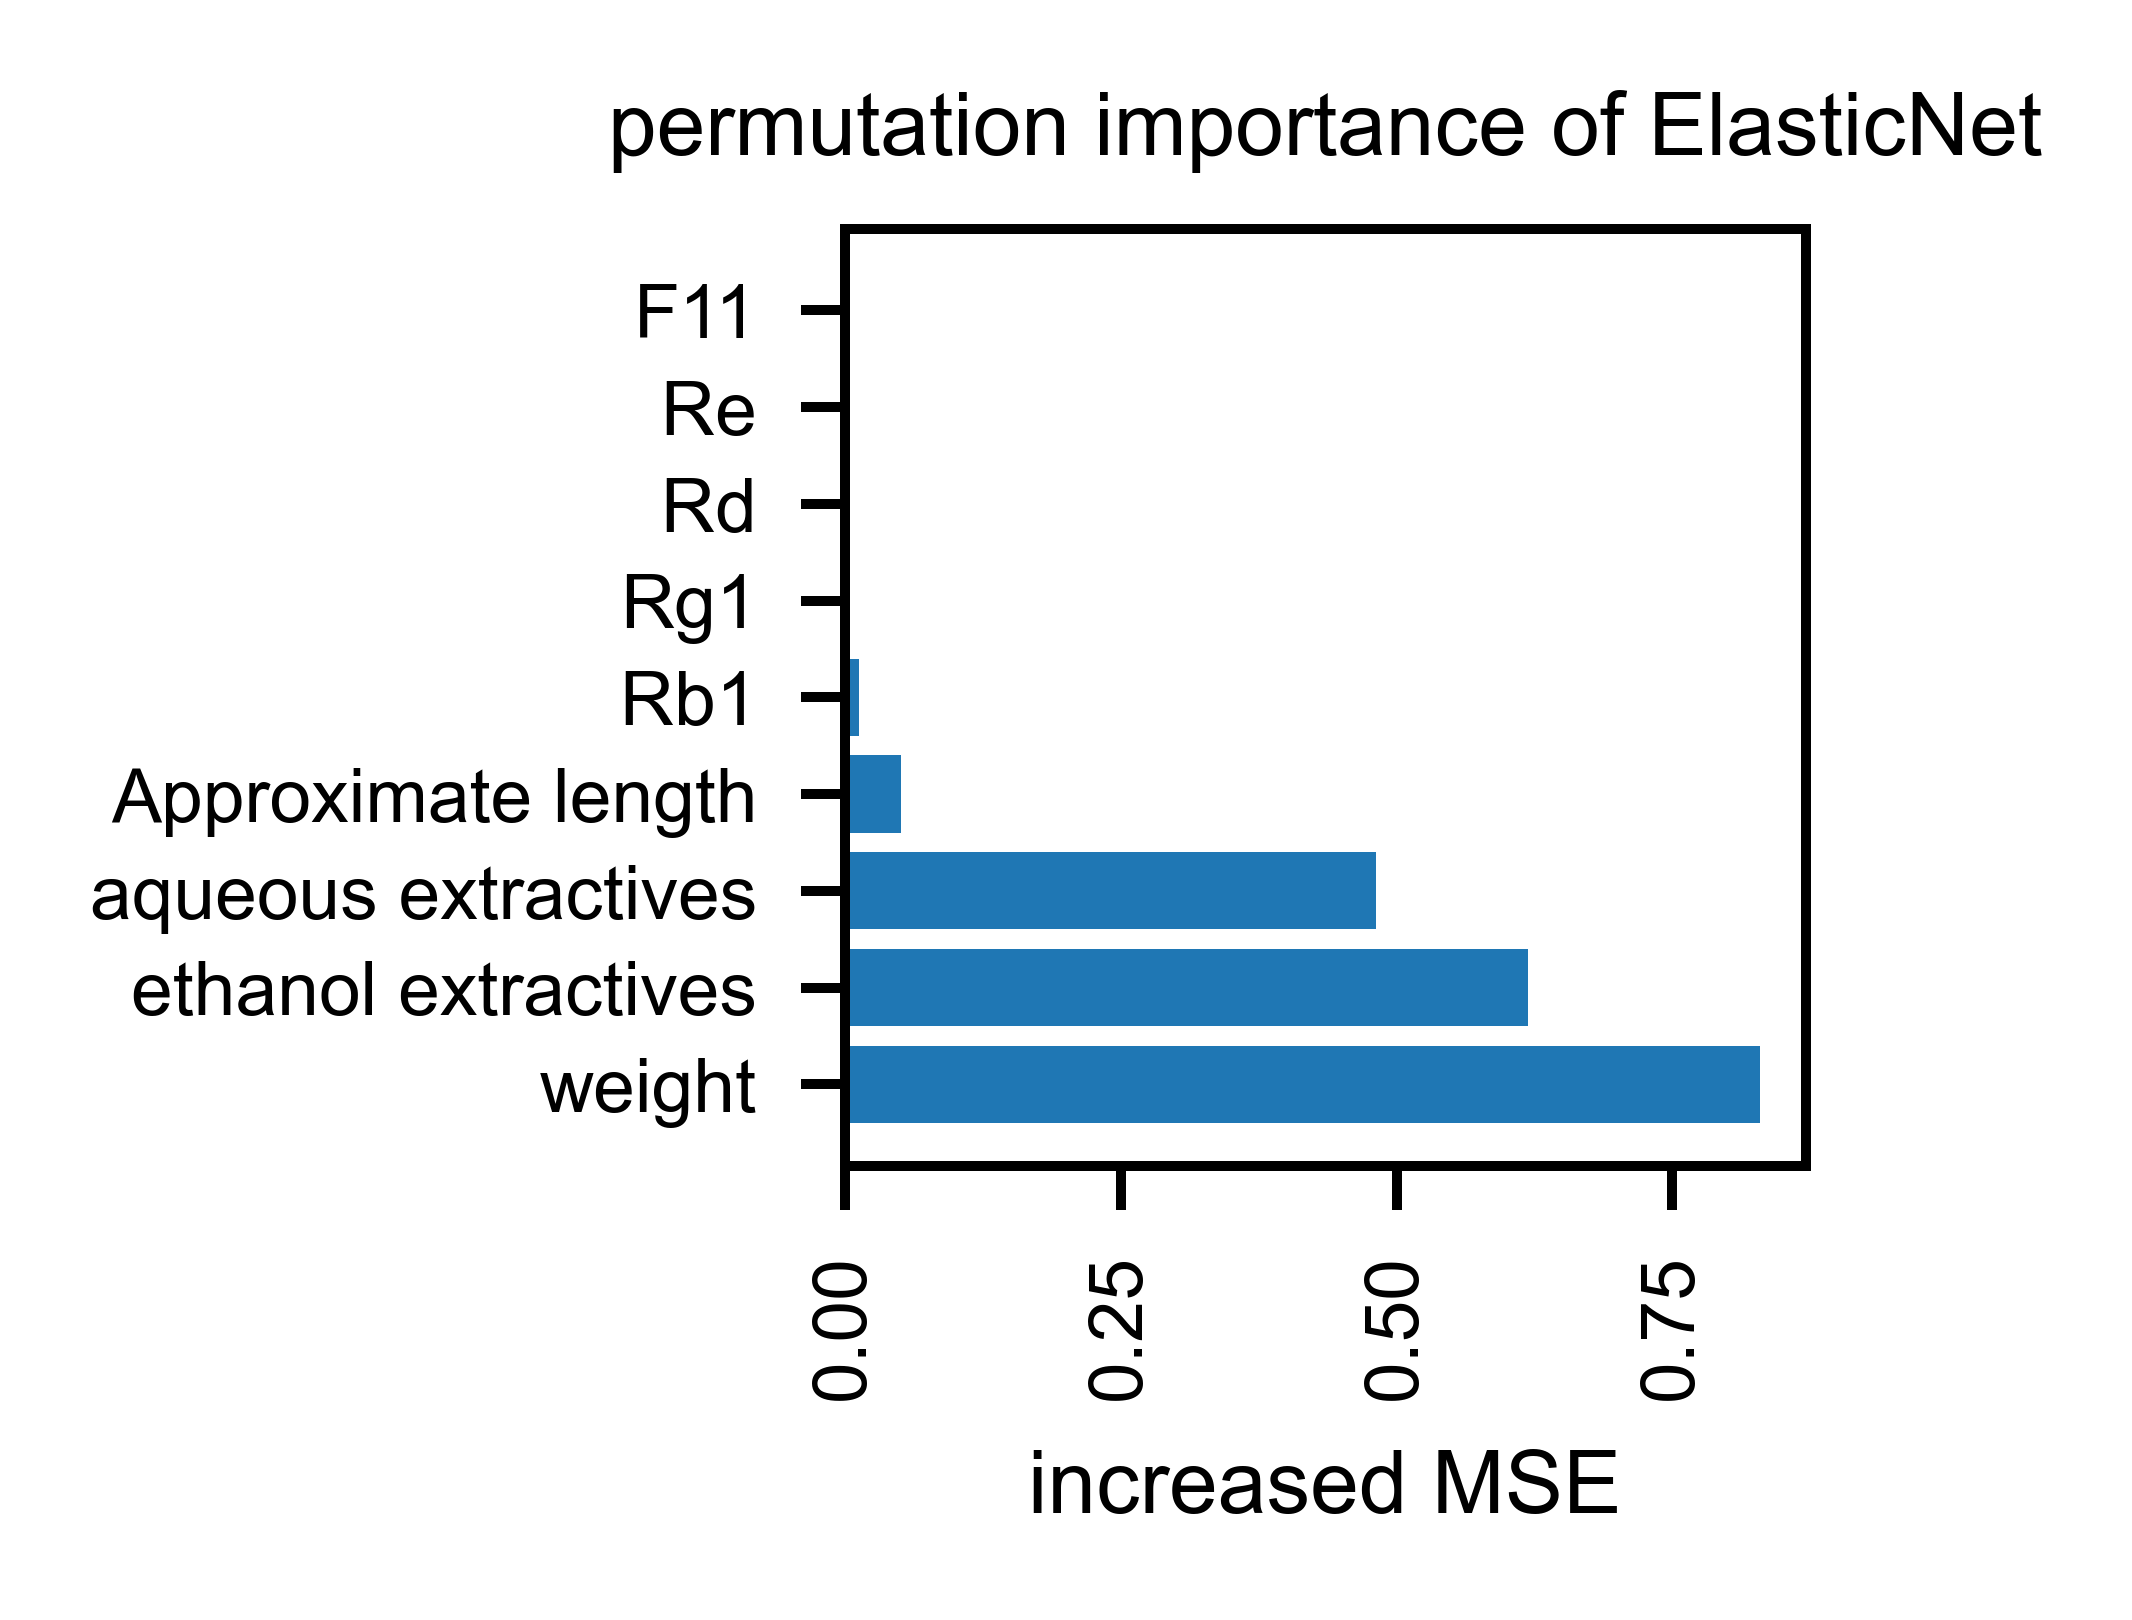

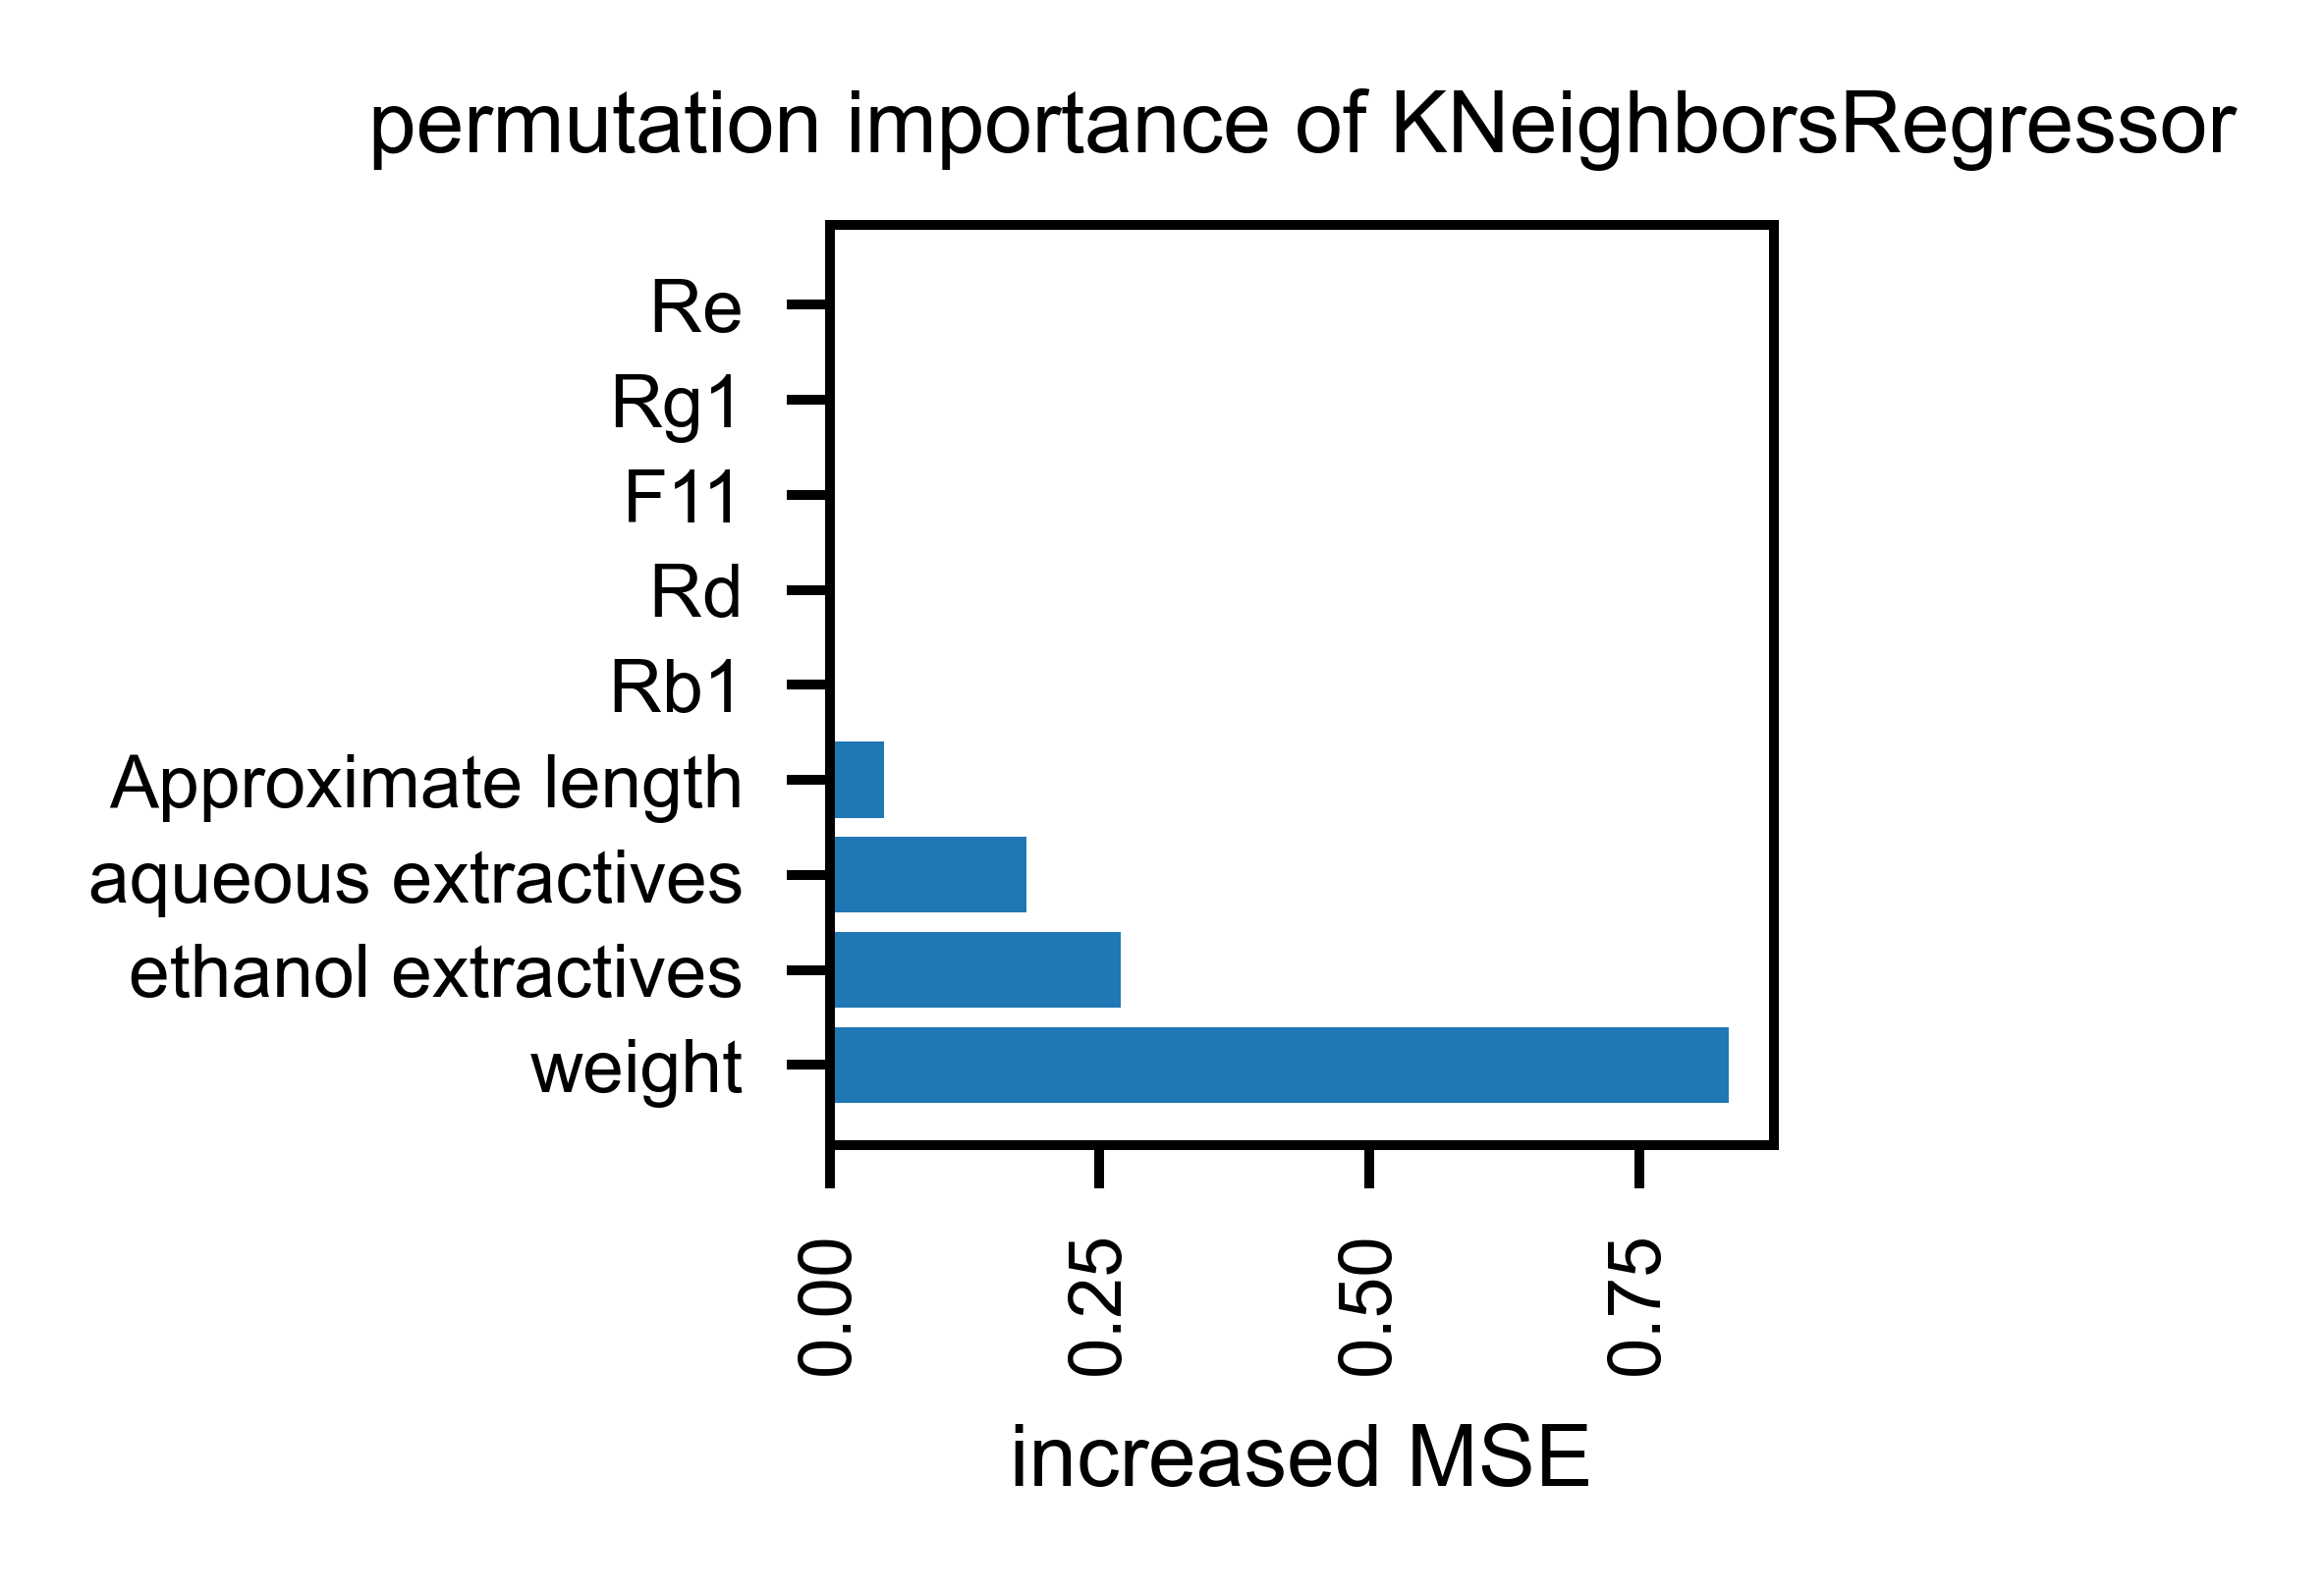

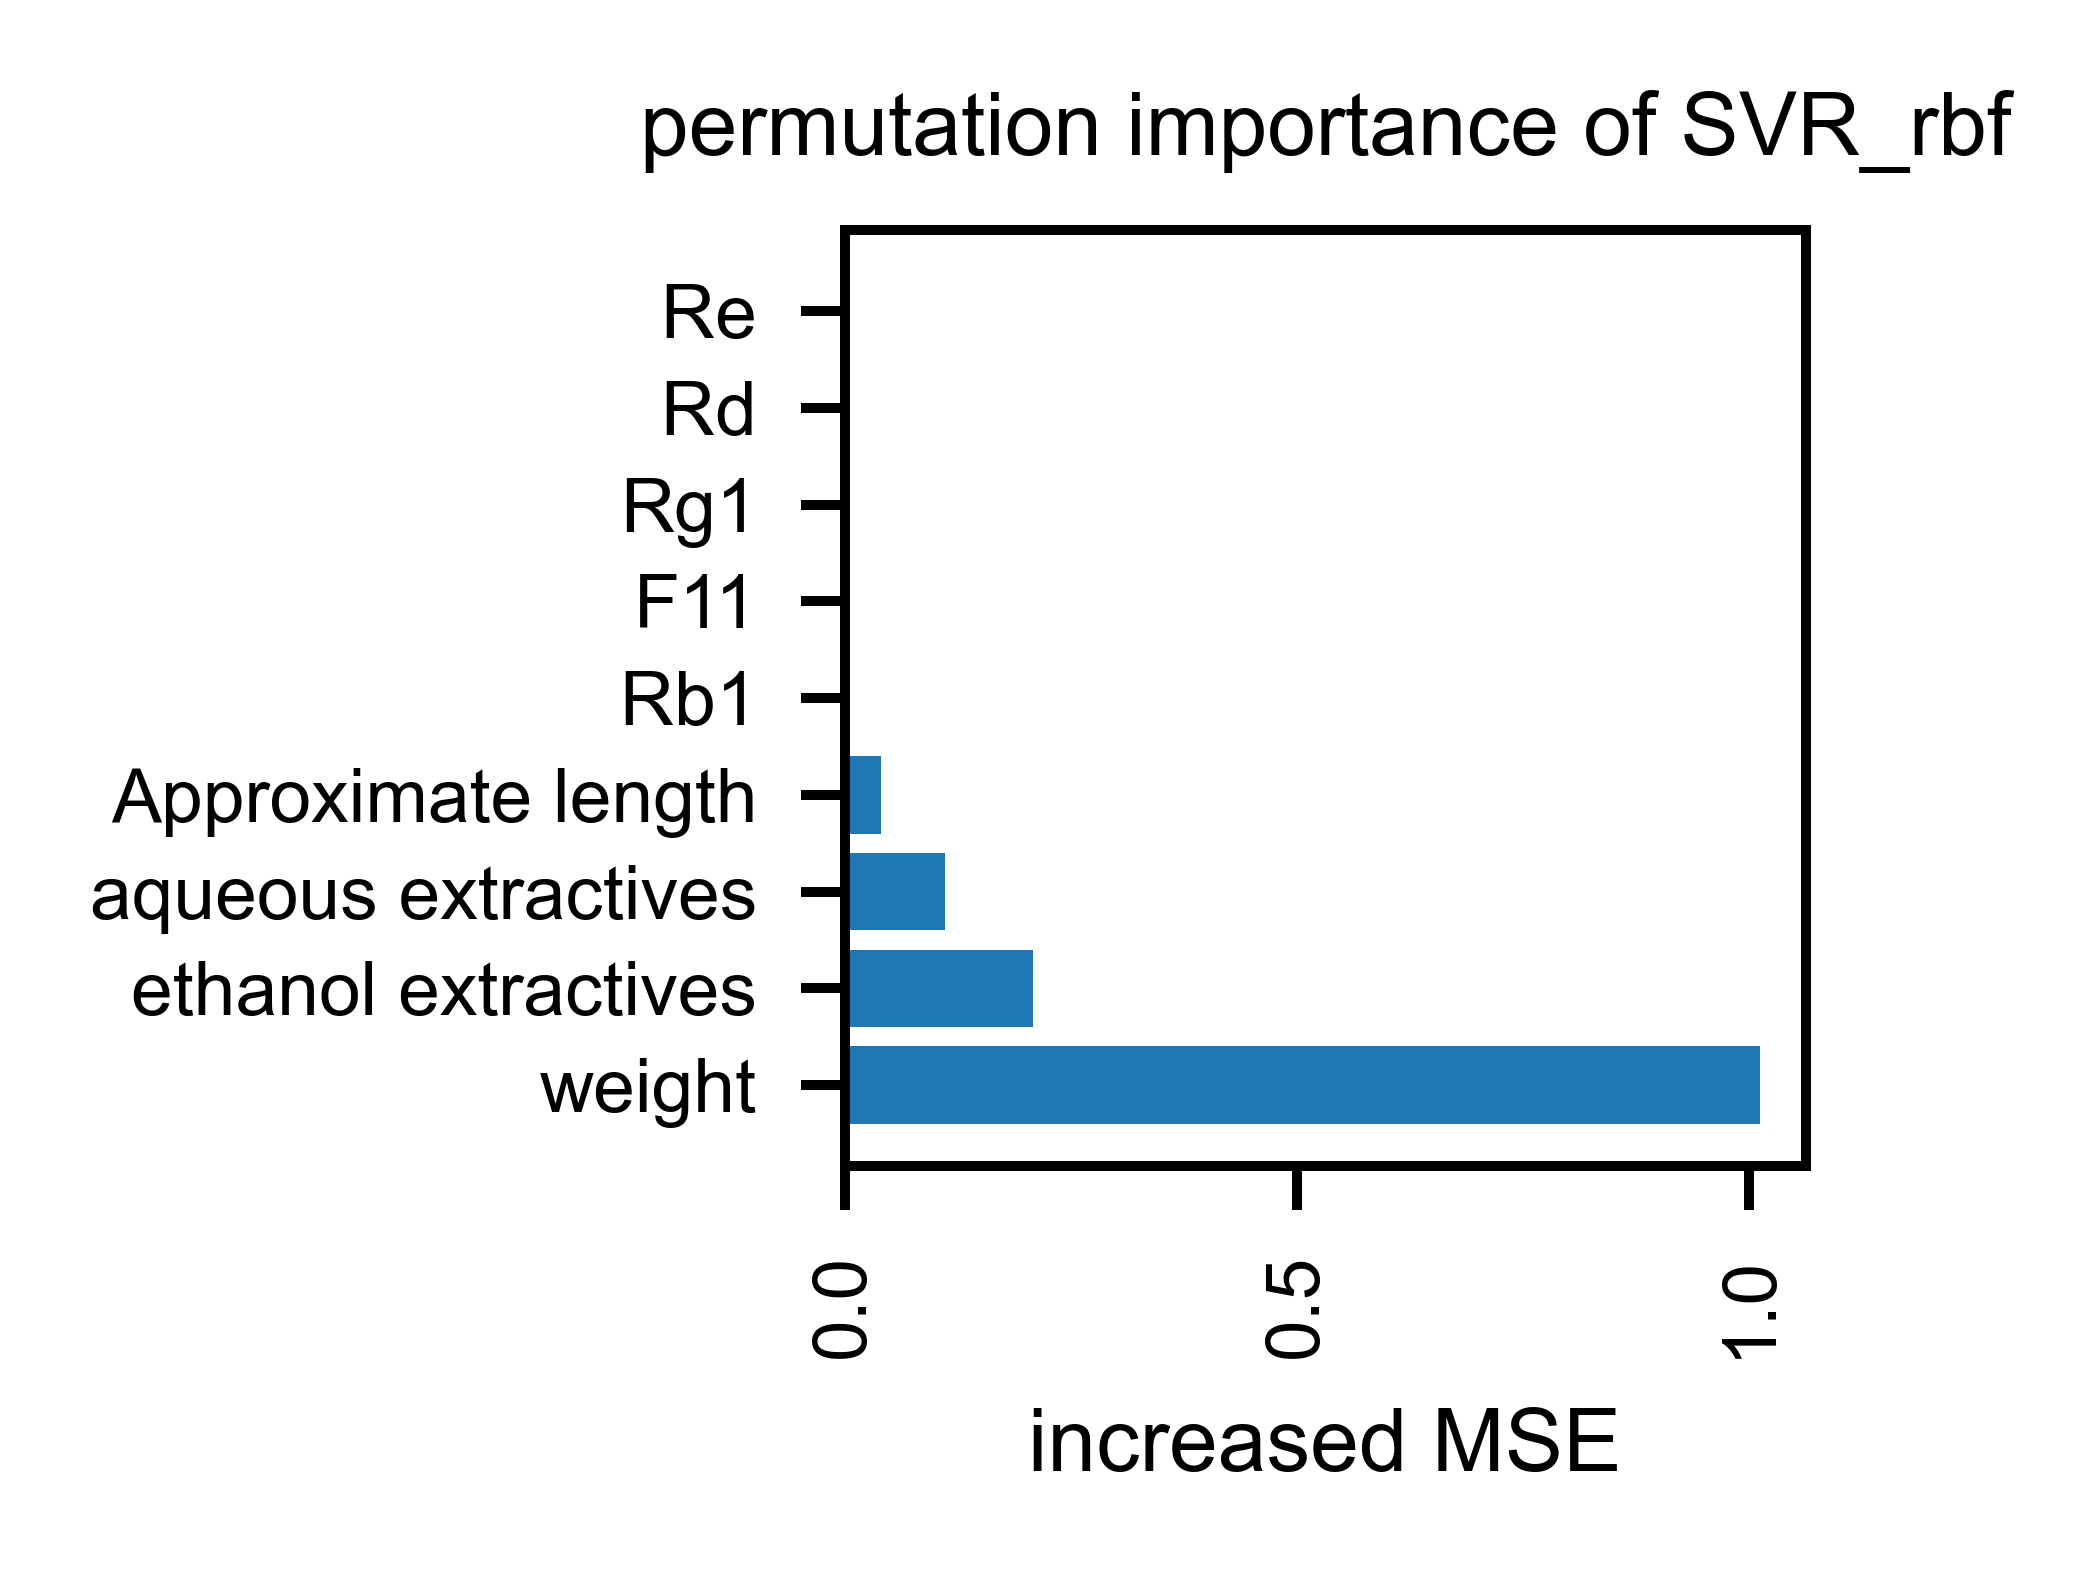

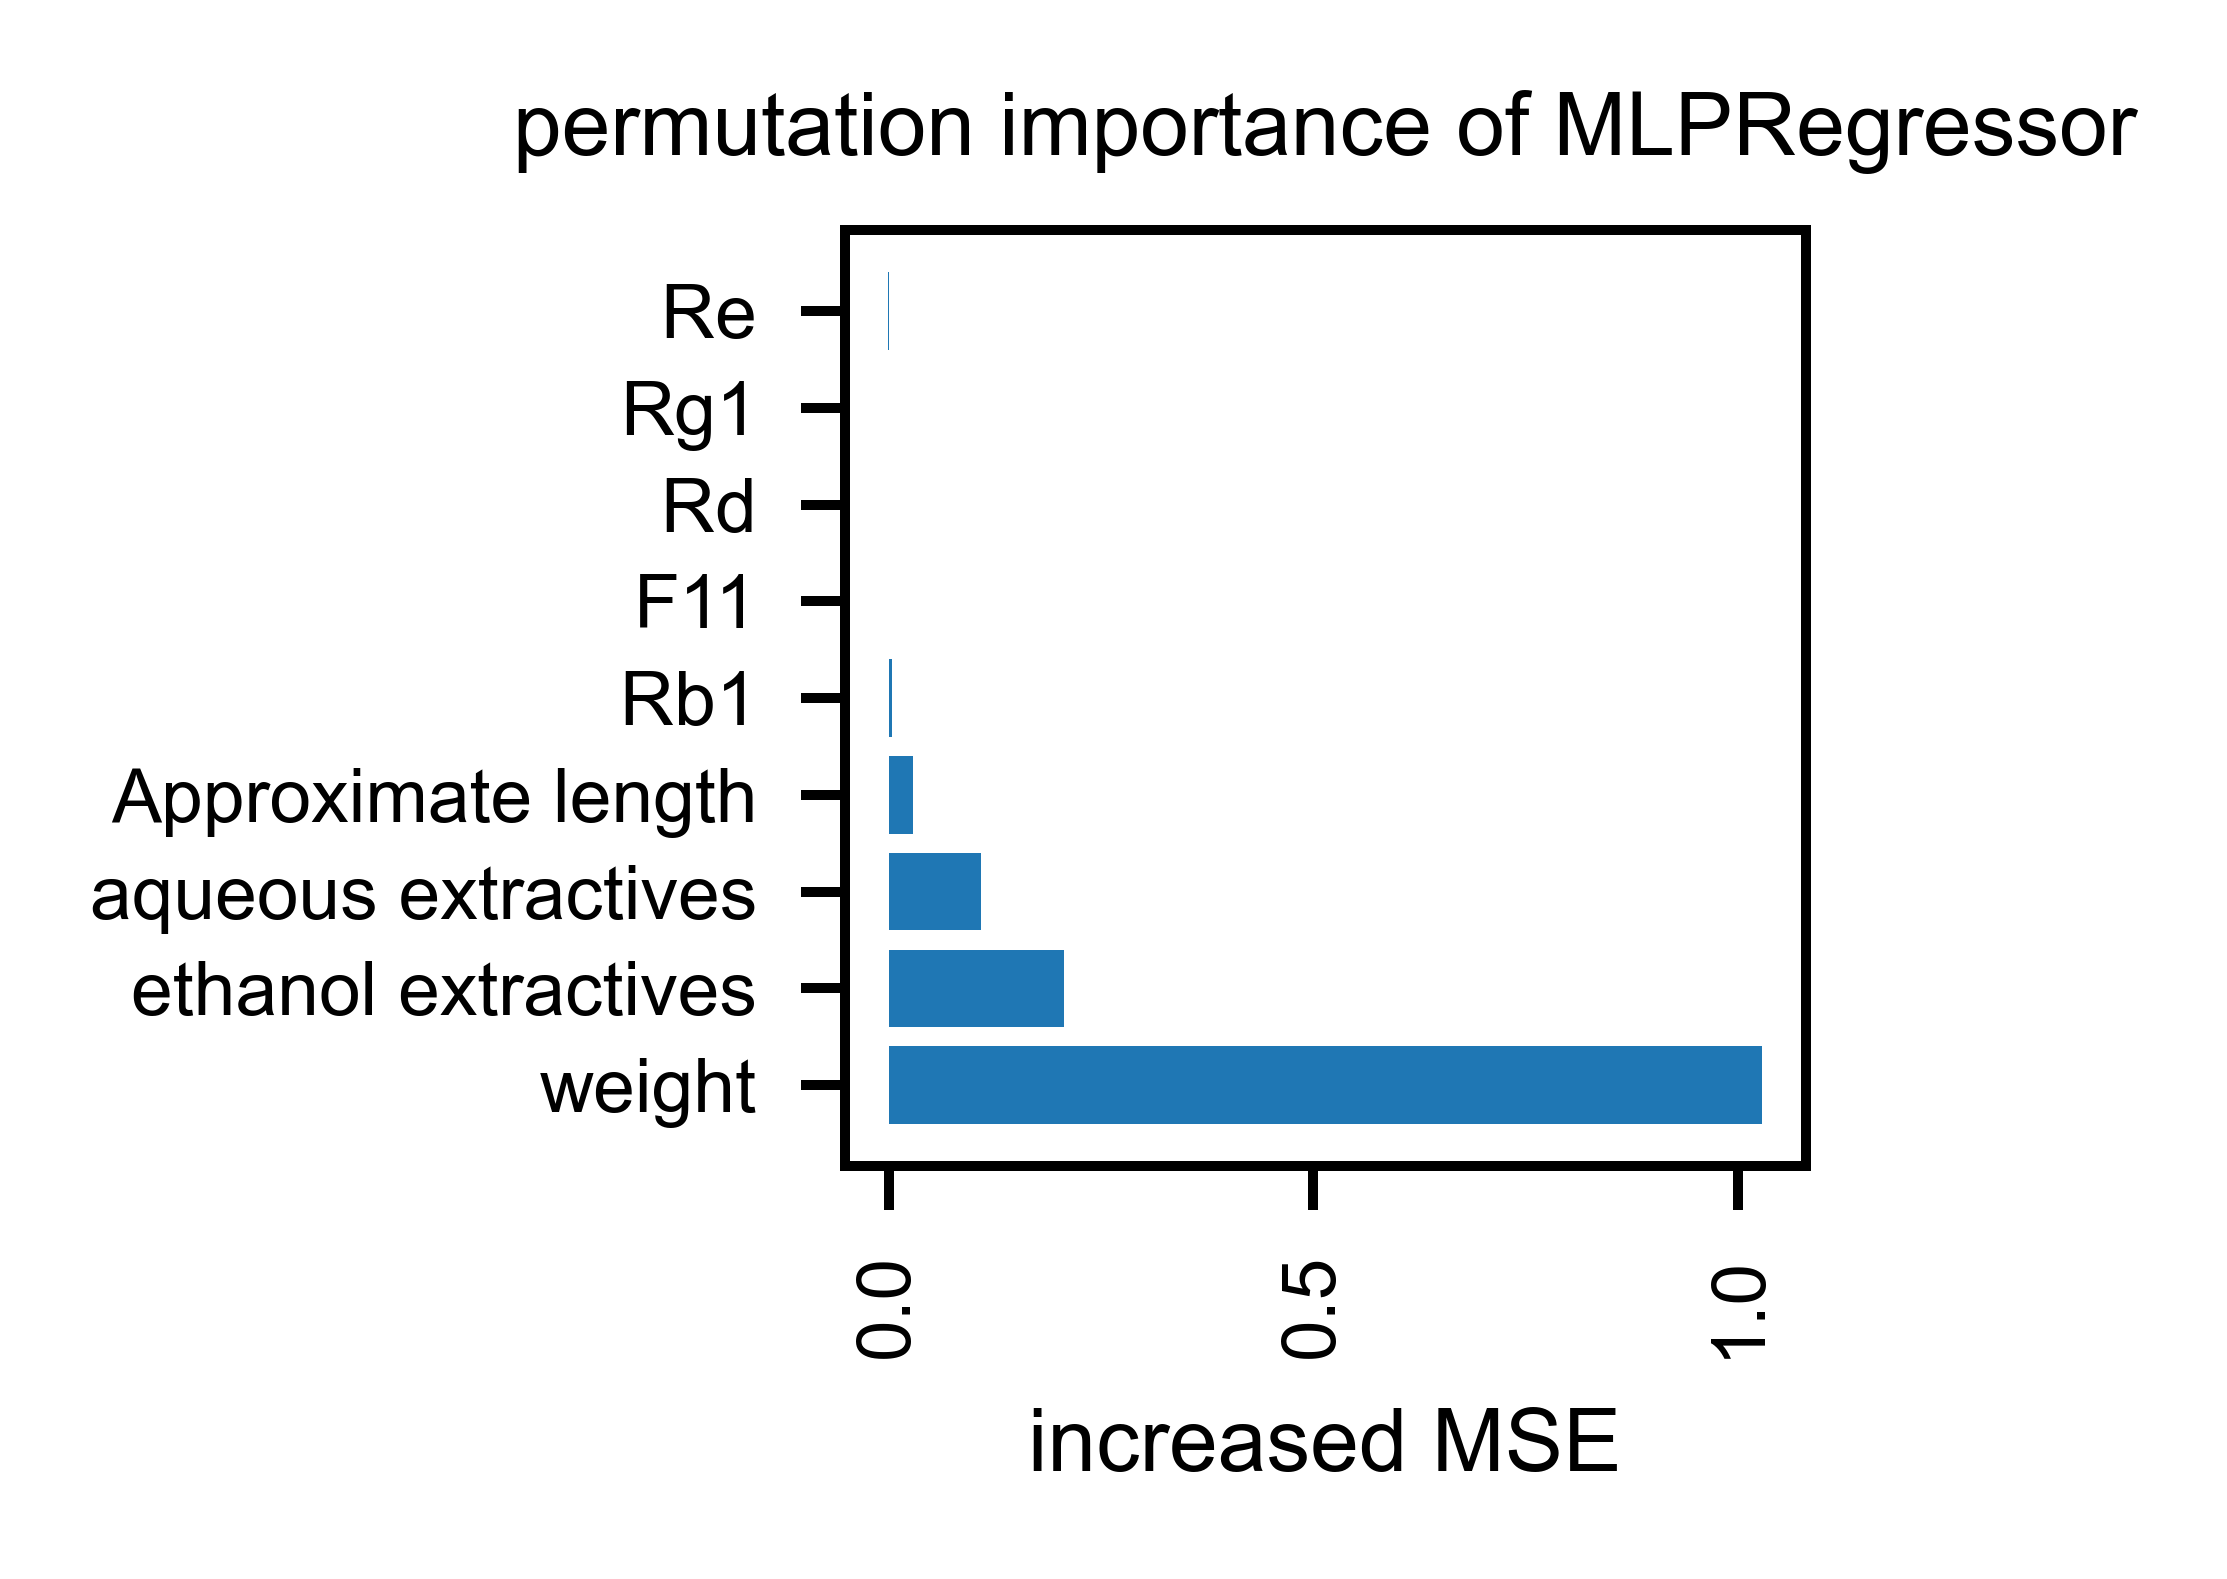

In [36]:
plot.plot_permutation_importance_from_model(model, save=True, algorithm='all', x_label='increased MSE')